## Things to know about pandas and proper verbiage
- The DataFrame is a **tabular data structure** with labeled rows and columns
- Indexes in pandas are tabeled lists of labels that make looks efficient
- Pandas is aware of the data types in the columns; also, null and `NaN` values.
- DataFrame essential analysis tools:

```python
type(df)
df.shape
df.columns
type(df.columns)
df.index
type(df.index)

# Pass the number of rows from the top of a Dataframe.
df.head()

# Pass the number of rows from the top of a Dataframe.
df.tail()

df.info()
# The kind of index,
# The column labels,
# The number of rows and columns,
# The number of null values per column,
# And the data type of each column.
```

- Slicing for rows

```python
# Row references for example only.
# To call the first five rows of a DataFrame.
df.iloc[:5,:]

# To call the last five rows of a DataFrame.
# Remembering that the last colon is the stride.
df.iloc[-5:,:]

# Assigning scalar value to column slices
# broadcasts the value to each row.
# The slice in this example reads, 
# 'every third row in the last column.'
import numpy as np
df.iloc[::3, -1] = np.nan

# Extracting a single column as a pandas series:
col_series = df['col_label']
type(col_series)
# output: pandas.core.series.Series
# The new series will gain its own name attritude.

# Extracting the values from a pandas series:
series_val = col_series.values
```

## DataFrames from Files
- `pd.read_csv(filepath, header=None)` Setting the header `header` keyword entry to `None` tells pandas to ignore the first row as labels. *If you pass an integer (**zero indexed**), pandas assumes that the line number that corresponds with the entry is where the labels exist and the data continues after.*
- The keyword argument `names` allows us to pass a list of column headers, `names=col_names`.
- The keyword argument `na_values` allows us to specify a null value entry, `na_values='none'` is an example. (*these values will be converted to `NaN` or 'Not a Number'*)
    - We can specify multiple null value expressions by passing a dictionary to na_values, `na_values={'col_header':['none']}`
- The keyword argument `parse_dates` allows us to read datetime data from our csv, `parse_dates=[[0, 1, 2]]` is an example if the year, month, and day are separated by columns.


### Writing files
```python
out_csv = 'filename.csv'
new_df.to_csv(out_csv)
out_tsv = 'filename.tsv'
new_df.to_csv(out_tsv, sep='\t')
out_xlsx = 'filename.xlsx'
new_df.to_excel(out_xlsx)
```


In [5]:
import numpy as np
import pandas as pd

pop = pd.read_csv('population.csv', index_col=0)

pop.head()

,Total Population
Year,
1960,3.030000e+09
1970,3.680000e+09
1980,4.440000e+09
1990,5.280000e+09
2000,6.120000e+09


In [6]:
# Create array of DataFrame values: np_vals
np_vals = pop.values

# Create new array of base 10 logarithm values: np_vals_log10
np_vals_log10 = np.log10(np_vals)

# Create array of new DataFrame by passing df to np.log10(): df_log10
df_log10 = np.log10(pop)

# Print original and new data containers
[print(x, 'has type', type(eval(x))) for x in ['np_vals', 'np_vals_log10', 'pop', 'df_log10']]

np_vals has type <class 'numpy.ndarray'>
np_vals_log10 has type <class 'numpy.ndarray'>
pop has type <class 'pandas.core.frame.DataFrame'>
df_log10 has type <class 'pandas.core.frame.DataFrame'>


[None, None, None, None]

## Building DataFrames
- `pd.read_csv()` will take a csv and generate a DataFrame.
- Pandas will take a dictionary with list values and generate a DataFrame.
- We can also construct DataFrames from lists in this way:

```python
import pandas as pd
list_1 = [data, data1]
list_2 = [name, name1]
list_3 = [place, place1]
list_4 = [count, count1]

list_labels = ['list one', 'list two', 'list three', 'list four']
list_cols = [list_1, list_2, list_3, list_4]      # list of lists

zipped = list(zip(list_labels, list_cols))

data = dict(zipped)

df = pd.DataFrame(data)
```

##### Broadcasting
```python
df['list five'] = 0
# This will broadcast the value 0 into a new column, list five.
```

- We can pass lists to update `df.columns` and `df.index` as long as they are of suitable length for the DataFrame.

In [7]:
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

In [9]:
# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys, list_values))

# Inspect the list using print()
print(zipped)

# Build a dictionary with the zipped list: data
data = dict(zipped)

# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
print(df)

[('Country', ['United States', 'Soviet Union', 'United Kingdom']), ('Total', [1118, 473, 273])]
          Country  Total
0   United States   1118
1    Soviet Union    473
2  United Kingdom    273


In [11]:
billboard = pd.read_csv('billboard.csv', index_col=0)
print(billboard)

      a                  b                    c   d
0  1980            Blondie               Call Me  6
1  1981  Chistorpher Cross         Arthurs Theme  3
2  1982          Joan Jett  I Love Rock and Roll  7


In [12]:
# Build a list of labels: list_labels
list_labels = ['year', 'artist', 'song', 'chart weeks']

# Assign the list of labels to the columns attribute: df.columns
billboard.columns = list_labels

In [13]:
print(billboard)

   year             artist                  song  chart weeks
0  1980            Blondie               Call Me            6
1  1981  Chistorpher Cross         Arthurs Theme            3
2  1982          Joan Jett  I Love Rock and Roll            7


In [14]:
cities = ['Manheim', 'Preston park', 'Biglerville', 'Indiana', 'Curwensville', 'Crown', 'Harveys lake', 'Mineral springs', 'Cassville', 'Hannastown', 'Saltsburg', 'Tunkhannock', 'Pittsburgh', 'Lemasters', 'Great bend']

In [16]:
# Make a string with the value 'PA': state
state = 'PA'

# Construct a dictionary: data
data = {'state':state, 'city':cities}

# Construct a DataFrame from dictionary data: df
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

   state             city
0     PA          Manheim
1     PA     Preston park
2     PA      Biglerville
3     PA          Indiana
4     PA     Curwensville
5     PA            Crown
6     PA     Harveys lake
7     PA  Mineral springs
8     PA        Cassville
9     PA       Hannastown
10    PA        Saltsburg
11    PA      Tunkhannock
12    PA       Pittsburgh
13    PA        Lemasters
14    PA       Great bend


In [20]:
# Read in the file: df1
df1 = pd.read_csv('world_population.csv')

# Create a list of the new column labels: new_labels
new_labels = ['year', 'population']

# Read in the file, specifying the header and names parameters: df2
df2 = pd.read_csv('world_population.csv', header=0, names=new_labels)

# Print both the DataFrames
print(df1)
print(df2)
print(df1.shape, df2.shape)

   Year  Total Population
0  1960      3.034971e+09
1  1970      3.684823e+09
2  1980      4.436590e+09
3  1990      5.282716e+09
4  2000      6.115974e+09
5  2010      6.924283e+09
   year    population
0  1960  3.034971e+09
1  1970  3.684823e+09
2  1980  4.436590e+09
3  1990  5.282716e+09
4  2000  6.115974e+09
5  2010  6.924283e+09
(6, 2) (6, 2)


In [25]:
# Read the raw file as-is: df1
df1 = pd.read_csv('messy_stock_data.tsv')

# Print the output of df1.head()
print(df1.head())

# Read in the file with the correct parameters: df2
df2 = pd.read_csv('messy_stock_data.tsv', delimiter=' ', header=3, comment='#')

# Print the output of df2.head()
print(df2.head())

# Save the cleaned up DataFrame to a CSV file without the index
df2.to_csv('tmp_clean_stock_data.csv', index=False)

# Save the cleaned up DataFrame to an excel file without the index
df2.to_excel('file_clean.xlsx', index=False)

                                                   The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful                                                  are they?                        
probably should just throw this line away too          but not the next since those are column labels                        
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct No...                                                NaN                        
# So that line you just read has all the column...                                                NaN                        
IBM 156.08 160.01 159.81 165.22 172.25 167.15 1...                                                NaN                        
     name     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0     IBM  156.08  160.01  159.81  165.22  172.25  167.15  164.75  152.77   
1    MSFT   45.51   43.08   42.13   43.47   47.53   45.96   45.61   45.51   
2  GOOGLE  51

## Plotting with pandas
```python
my_var = df['col_ref'].values        

# Column reference results in pandas series 
# and the .values method results in a numpy array.
```

**`plt.plot` can plot lists, numpy arrays, pandas series, etc.**

The most efficient and formatted option is to use the **`pd_series.plot()`** function.

There is also a `plot()` function for a pandas DataFrame. 

To remedy significantly different scales in the column data, use the `yscale()` function and pass the argument `'log'`.

- An example plot from two DataFrame columns:

```python
aapl['open'].plot(color='b', style='.-', legend=True)
aapl['close'].plot(color='r', style='.', legend=True)
plt.axis(('2001', '2002', 0, 100))
plt.show()
```

In [35]:
df = pd.read_csv('weather_data_austin_2010.csv', index_col=3, parse_dates=[3], names=['temperature (°F)', 'dewpoint (°F)', 'pressure (atm)', 'date'], header=0)
print(df.head())
df.info()

                     temperature (°F)  dewpoint (°F)  pressure (atm)
date                                                                
2010-01-01 00:00:00              46.2           37.5             1.0
2010-01-01 01:00:00              44.6           37.1             1.0
2010-01-01 02:00:00              44.1           36.9             1.0
2010-01-01 03:00:00              43.8           36.9             1.0
2010-01-01 04:00:00              43.5           36.8             1.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 3 columns):
temperature (°F)    8759 non-null float64
dewpoint (°F)       8759 non-null float64
pressure (atm)      8759 non-null float64
dtypes: float64(3)
memory usage: 273.7 KB


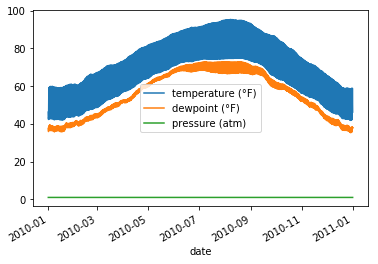

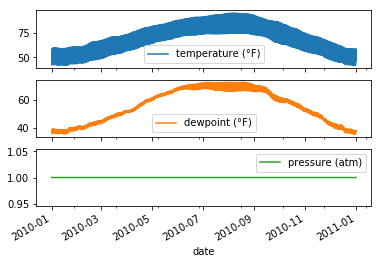

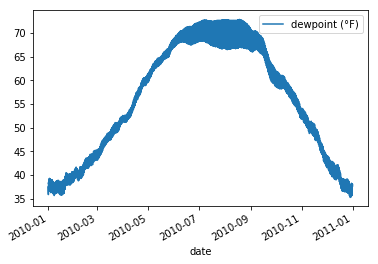

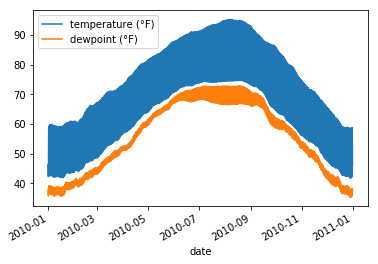

In [37]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Plot all columns (default)
df.plot()
plt.show()

# Plot all columns as subplots
df.plot(subplots=True)
plt.show()

# Plot just the Dew Point data
column_list1 = ['dewpoint (°F)']
df[column_list1].plot()
plt.show()

# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['temperature (°F)','dewpoint (°F)']
df[column_list2].plot()
plt.show()

## Eploratory Data Analysis **(EDA)**
### Visual EDA

- Histogram options:
    - `bins(int)`: number of intervals or bins
    - `range(tuple)`: extrema of bins (minimum and maximum)
    - `normed(boolean)`: **superseded by `density(boolean)`** whether to normalize to one
    - `cumulative (boolean)`: compute Cumulative Distribution Function (CDF)
        - Achieved by adding up the areas of the rectangles under a normalized histogram.
        - Used to compute the probability of observing a value in a given range.
    - Be aware of varied syntax around histograms:
        - `df.plot(kind='hist')`
        - `df.plt.hist()`
        - `df.hist()`        

In [77]:
df = pd.read_csv('stocks_data.csv', index_col=0)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 4 columns):
Month    12 non-null object
AAPL     12 non-null float64
GOOG     12 non-null float64
IBM      12 non-null float64
dtypes: float64(3), object(1)
memory usage: 480.0+ bytes
None


,Month,AAPL,GOOG,IBM
0,Jan,117.160004,534.522445,153.309998
1,Feb,128.460007,558.402511,161.940002
2,Mar,124.430000,548.002468,160.500000
3,Apr,125.150002,537.340027,171.289993
4,May,130.279999,532.109985,169.649994


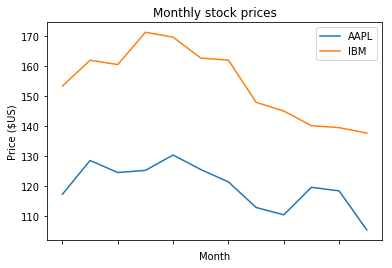

In [76]:
# Create a list of y-axis column names: y_columns
y_columns = ['AAPL', 'IBM']

# Generate a line plot
df.plot(x='Month', y=y_columns)

# Add the title
plt.title('Monthly stock prices')

# Add the y-axis label
plt.ylabel('Price ($US)')

# Display the plot
plt.show()

In [79]:
sizes = [51.12044694, 56.78387977, 49.15557238, 49.06977358, 49.52823321, 78.4595872, 78.93021696, 77.41479205, 81.52541106, 61.71459825, 52.85646225, 54.23007578, 58.89427963, 39.65137852, 23.42587473, 33.41639502, 32.03903011, 27.8650165, 18.88972581, 14.0196956, 29.72619722, 24.58549713, 23.48516821, 20.77938954, 29.19459189, 88.67676838, 79.72987328, 79.94866084, 93.23005042, 18.88972581, 21.34122243, 20.6679223, 28.88670381, 49.24144612, 46.14174741, 45.39631334, 45.01218186, 73.76057586, 82.96880195, 71.84547684, 69.85320595, 102.22421043, 93.78252358, 110.0, 36.52889673, 24.14234281, 44.84805372, 41.02504618, 20.51976563, 18.765772, 17.9095202, 17.75442285, 13.08832041, 10.83266174, 14.00441945, 15.91328975, 21.60597587, 18.8188451, 21.15311208, 24.14234281, 20.63083317, 76.05635059, 80.05816704, 71.18975117, 70.98330444, 56.13992036, 89.36985382, 84.38736544, 82.6716892, 81.4149056, 22.60363518, 63.06844313, 69.92143863, 76.76982089, 69.2066568, 35.81711267, 26.25184749, 36.94940537, 19.95069229, 23.88237331, 21.79608472, 26.1474042, 19.49759118, 18.36136808, 69.98970461, 56.13992036, 66.21810474, 68.02351436, 59.39644014, 102.10046481, 82.96880195, 79.25686195, 74.74521151, 93.34830013, 102.05923292, 60.7883734, 40.55589449, 44.7388015, 36.11079464, 37.9986264, 35.11233175, 15.83199594, 103.96451839, 100.21241654, 90.18186347, 84.27493641, 32.38645967, 21.62494928, 24.00218436, 23.56434276, 18.78345471, 22.21725537, 25.44271071, 21.36007926, 69.37650986, 76.19877818, 14.51292942, 19.38962134, 27.75740889, 34.24717407, 48.10262495, 29.459795, 32.80584831, 55.89556844, 40.06360581, 35.03982309, 46.33599903, 15.83199594, 25.01226779, 14.03498009, 26.90404245, 59.52231336, 54.92349014, 54.35035315, 71.39649768, 91.93424995, 82.70879915, 89.56285636, 75.45251972, 20.50128352, 16.04379287, 22.02531454, 11.32159874, 16.70430249, 18.80114574, 18.50153068, 21.00322336, 25.79385418, 23.80266582, 16.65430211, 44.35746794, 49.815853, 49.04119063, 41.52318884, 90.72524338, 82.07906251, 84.23747672, 90.29816462, 63.55551901, 63.23059357, 57.92740995, 59.64831981, 38.45278922, 43.19643409, 41.81296121, 19.62393488, 28.99647648, 35.35456858, 27.97283229, 30.39744886, 20.57526193, 26.96758278, 37.07354237, 15.62160631, 42.92863291, 30.21771564, 36.40567571, 36.11079464, 29.70395123, 13.41514444, 25.27829944, 20.51976563, 27.54281821, 21.17188565, 20.18836167, 73.97101962, 73.09614831, 65.35749368, 73.97101962, 43.51889468, 46.80945169, 37.77255674, 39.6256851, 17.24230306, 19.49759118, 15.62160631, 13.41514444, 55.49963323, 53.18333207, 55.31736854, 42.44868923, 13.86730874, 16.48817545, 19.33574884, 27.3931002, 41.31307817, 64.63368105, 44.52069676, 35.74387954, 60.75655952, 79.87569835, 68.46177648, 62.35745431, 58.70651902, 17.41217694, 19.33574884, 13.86730874, 22.02531454, 15.75091031, 62.68013142, 68.63071356, 71.36201911, 76.80558184, 51.58836621, 48.84134317, 54.86301837, 51.73502816, 74.14661842, 72.22648148, 77.88228247, 78.24284811, 15.67003285, 31.25845963, 21.36007926, 31.60164234, 17.51450098, 17.92679488, 16.40542438, 19.96892459, 32.99310928, 28.14577056, 30.80379718, 16.40542438, 13.48998471, 16.40542438, 17.84050478, 13.48998471, 47.1451025, 58.08281541, 53.06435374, 52.02897659, 41.44433489, 36.60292926, 30.80379718, 48.98404972, 42.90189859, 47.56635225, 39.24128299, 54.56115914, 48.41447259, 48.84134317, 49.41341845, 42.76835191, 69.30854366, 19.33574884, 27.28640858, 22.02531454, 20.70504474, 26.33555201, 31.37264569, 33.93740821, 24.08222494, 33.34566004, 41.05118927, 32.52595611, 48.41447259, 16.48817545, 18.97851406, 43.84255439, 37.22278157, 34.77459916, 44.38465193, 47.00510227, 61.39441929, 57.77221268, 65.12675249, 61.07507305, 79.14790534, 68.42801405, 54.10993164, 64.63368105, 15.42864956, 16.24054679, 15.26876826, 29.68171358, 51.88189829, 63.32798377, 42.36896092, 48.6988448, 20.15170555, 19.24612787, 16.98905358, 18.88972581, 29.68171358, 28.03762169, 30.35246559, 27.20120517, 19.13885751, 16.12562794, 18.71277385, 16.9722369, 29.85984799, 34.29495526, 37.54716158, 47.59450219, 19.93246832, 30.60028577, 26.90404245, 24.66650366, 21.36007926, 18.5366546, 32.64243213, 18.5366546, 18.09999962, 22.70075058, 36.23351603, 43.97776651, 14.24983724, 19.15671509, 14.17291518, 35.25757392, 24.38356372, 26.02234705, 21.83420642, 25.81458463, 28.90864169, 28.58044785, 30.91715052, 23.6833544, 12.82391671, 14.63757021, 12.89709155, 17.75442285, 16.24054679, 17.49742615, 16.40542438, 20.42743834, 17.41217694, 23.58415722, 19.96892459, 20.33531923, 22.99334585, 28.47146626, 28.90864169, 43.43816712, 41.57579979, 35.01567018, 35.74387954, 48.5565546, 57.77221268, 38.98605581, 49.98882458, 28.25412762, 29.01845599, 23.88237331, 27.60710798, 26.54539622, 31.14448175, 34.17556473, 16.3228815, 17.0732619, 16.15842026, 18.80114574, 18.80114574, 19.42557798, 20.2434083, 20.98452475, 16.07650192, 16.07650192, 16.57113469, 36.11079464, 37.84783835, 27.82194848, 33.46359332, 29.5706502, 23.38638738, 36.23351603, 32.40968826, 18.88972581, 21.92965639, 28.68963762, 30.80379718]
sizes = np.array(sizes)
# This array contains the normalized 'weight' of each automobile in the dataset.

type(sizes)

numpy.ndarray

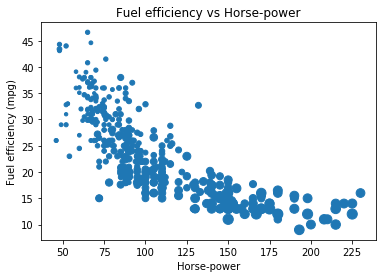

In [81]:
df = pd.read_csv('auto-mpg.csv')

# Generate a scatter plot
df.plot(kind='scatter', x='hp', y='mpg', s=sizes)
# s keyword argument to provide the radius of each circle to plot in pixels.
#
# Add the title
plt.title('Fuel efficiency vs Horse-power')

# Add the x-axis label
plt.xlabel('Horse-power')

# Add the y-axis label
plt.ylabel('Fuel efficiency (mpg)')

# Display the plot
plt.show()

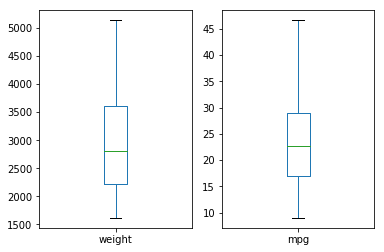

In [82]:
# Make a list of the column names to be plotted: cols
cols = ['weight', 'mpg']

# Generate the box plots
df[cols].plot(kind='box', subplots=True)

# Display the plot
plt.show()

In [83]:
df = pd.read_csv('tips.csv')

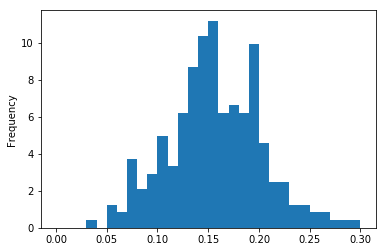

In [99]:
# This formats the plots such that they appear on separate rows
# fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot the PDF
df.fraction.plot(kind='hist', density=True, bins=30, range=(0,.3))
plt.show()

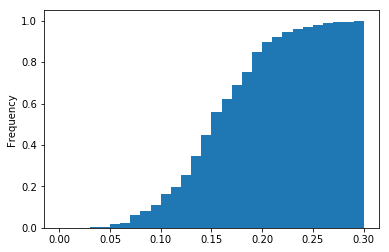

In [101]:
# Plot the CDF
df.fraction.plot(kind='hist', density=True, cumulative=True, bins=30, range=(0,.3))
plt.show()

In [103]:
df = pd.read_csv('percent-bachelors-degrees-women-usa.csv', index_col=0)

0.8
19.0


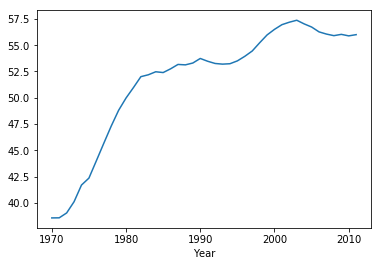

In [104]:
# Print the minimum value of the Engineering column
print(df['Engineering'].min())

# Print the maximum value of the Engineering column
print(df['Engineering'].max())

# Construct the mean percentage per year: mean
mean = df.mean(axis='columns')

# Plot the average percentage per year
mean.plot()

# Display the plot
plt.show()

In [105]:
df = pd.read_csv('titanic.csv')

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64


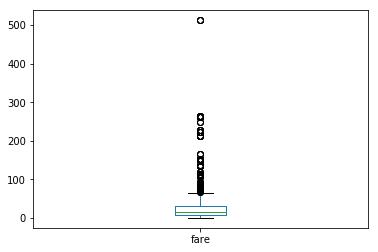

In [106]:
# Print summary statistics of the fare column with .describe()
print(df['fare'].describe())

# Generate a box plot of the fare column
df['fare'].plot(kind='box')

# Show the plot
plt.show()

In [107]:
df = pd.read_csv('life_expectancy_at_birth.csv')

208
      Unnamed: 0   1800   1801   1802  1803  1804   1805   1806   1807  1808  \
0.05       12.95  25.40  25.30  25.20  25.2  25.2  25.40  25.40  25.40  25.3   
0.95      246.05  37.92  37.35  38.37  38.0  38.3  38.37  38.37  38.37  38.0   

       ...      2007   2008    2009    2010   2011    2012    2013   2014  \
0.05   ...     53.07  53.60  54.235  54.935  55.97  56.335  56.705  56.87   
0.95   ...     80.73  80.93  81.200  81.365  81.60  81.665  81.830  82.00   

        2015     2016  
0.05  57.855  59.2555  
0.95  82.100  82.1650  

[2 rows x 218 columns]


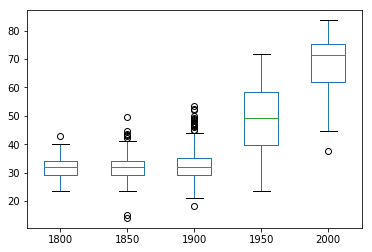

In [111]:
# Print the number of countries reported in 2015
print(df['2015'].count())

# Print the 5th and 95th percentiles
print(df.quantile([0.05, 0.95]))

# Generate a box plot
years = ['1800','1850','1900','1950','2000']
df[years].plot(kind='box')
plt.show()

In [113]:
january = pd.read_csv('january.csv')
march = pd.read_csv('march.csv')

In [114]:
# Print the mean of the January and March data
print(january.mean(), march.mean())

# Print the standard deviation of the January and March data
print(january.std(), march.std())

Temperature    32.354839
dtype: float64 Temperature    35.0
dtype: float64
Temperature    13.583196
dtype: float64 Temperature    7.478859
dtype: float64


## Filtering by Factors (categorical variables)

```python
indices = df['factor_col'] == 'cat_value'
cat_value = df.loc[indices,:] # extract new DataFrame
# Repeat for each categorical unique value requiring EDA.
```



In [115]:
df = pd.read_csv('auto-mpg.csv')

In [117]:
# Compute the global mean and global standard deviation: global_mean, global_std
global_mean = df.mean()
global_std = df.std()

# Filter the US population from the origin column: us
us = df[df['origin'] == 'US']

# Compute the US mean and US standard deviation: us_mean, us_std
us_mean = us.mean()
us_std = us.std()

# Print the differences
print(us_mean - global_mean)
print(us_std - global_std)

mpg        -3.412449
cyl         0.805612
displ      53.100255
hp         14.579592
weight    394.905612
accel      -0.551122
yr         -0.387755
dtype: float64
mpg       -1.364623
cyl       -0.049788
displ     -6.267657
hp         1.406630
weight   -54.055870
accel     -0.022844
yr        -0.023369
dtype: float64


In [118]:
titanic = pd.read_csv('titanic.csv')

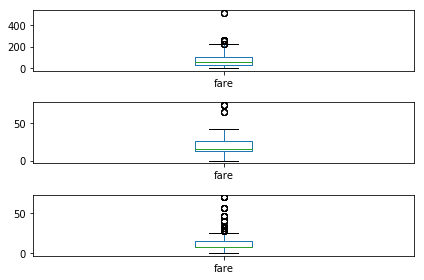

In [121]:
# Display the box plots on 3 separate rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1)

# Generate a box plot of the fare prices for the First passenger class
titanic.loc[titanic['pclass'] == 1].plot(ax=axes[0], y='fare', kind='box')

# Generate a box plot of the fare prices for the Second passenger class
titanic.loc[titanic['pclass'] == 2].plot(ax=axes[1], y='fare', kind='box')

# Generate a box plot of the fare prices for the Third passenger class
titanic.loc[titanic['pclass'] == 3].plot(ax=axes[2], y='fare', kind='box')

# Display the plot
plt.tight_layout()
plt.show()

## Indexing Time Series

- The `parse_dates=True` reads datetime string data as ISO 8601 format.
    - yyyy-mm-dd hh:mm:ss
- Pandas `pd.to_datetime(['list', 'of', 'datetime', 'strings'])` can convert datetime strings in ISO 8601 format to pandas datetime objects.
- When reindexing with pandas `df.reindex()`, we can pass the `method=''` argument with `'ffill'` for forward fill or `'bfill'` for backward fill for null enteries.

In [134]:
date_list = ['20100101 00:00', '20100101 01:00', '20100101 02:00', '20100101 03:00', '20100101 04:00', '20100101 05:00', '20100101 06:00', '20100101 07:00', '20100101 08:00', '20100101 09:00', '20100101 10:00', '20100101 11:00', '20100101 12:00', '20100101 13:00', '20100101 14:00', '20100101 15:00', '20100101 16:00', '20100101 17:00', '20100101 18:00', '20100101 19:00', '20100101 20:00', '20100101 21:00', '20100101 22:00', '20100101 23:00', '20100102 00:00', '20100102 01:00', '20100102 02:00', '20100102 03:00', '20100102 04:00', '20100102 05:00', '20100102 06:00', '20100102 07:00', '20100102 08:00', '20100102 09:00', '20100102 10:00', '20100102 11:00', '20100102 12:00', '20100102 13:00', '20100102 14:00', '20100102 15:00', '20100102 16:00', '20100102 17:00', '20100102 18:00', '20100102 19:00', '20100102 20:00', '20100102 21:00', '20100102 22:00', '20100102 23:00', '20100103 00:00', '20100103 01:00', '20100103 02:00', '20100103 03:00', '20100103 04:00', '20100103 05:00', '20100103 06:00', '20100103 07:00', '20100103 08:00', '20100103 09:00', '20100103 10:00', '20100103 11:00', '20100103 12:00', '20100103 13:00', '20100103 14:00', '20100103 15:00', '20100103 16:00', '20100103 17:00', '20100103 18:00', '20100103 19:00', '20100103 20:00', '20100103 21:00', '20100103 22:00', '20100103 23:00', '20100104 00:00', '20100104 01:00', '20100104 02:00', '20100104 03:00', '20100104 04:00', '20100104 05:00', '20100104 06:00', '20100104 07:00', '20100104 08:00', '20100104 09:00', '20100104 10:00', '20100104 11:00', '20100104 12:00', '20100104 13:00', '20100104 14:00', '20100104 15:00', '20100104 16:00', '20100104 17:00', '20100104 18:00', '20100104 19:00', '20100104 20:00', '20100104 21:00', '20100104 22:00', '20100104 23:00', '20100105 00:00', '20100105 01:00', '20100105 02:00', '20100105 03:00', '20100105 04:00', '20100105 05:00', '20100105 06:00', '20100105 07:00', '20100105 08:00', '20100105 09:00', '20100105 10:00', '20100105 11:00', '20100105 12:00', '20100105 13:00', '20100105 14:00', '20100105 15:00', '20100105 16:00', '20100105 17:00', '20100105 18:00', '20100105 19:00', '20100105 20:00', '20100105 21:00', '20100105 22:00', '20100105 23:00', '20100106 00:00', '20100106 01:00', '20100106 02:00', '20100106 03:00', '20100106 04:00', '20100106 05:00', '20100106 06:00', '20100106 07:00', '20100106 08:00', '20100106 09:00', '20100106 10:00', '20100106 11:00', '20100106 12:00', '20100106 13:00', '20100106 14:00', '20100106 15:00', '20100106 16:00', '20100106 17:00', '20100106 18:00', '20100106 19:00', '20100106 20:00', '20100106 21:00', '20100106 22:00', '20100106 23:00', '20100107 00:00', '20100107 01:00', '20100107 02:00', '20100107 03:00', '20100107 04:00', '20100107 05:00', '20100107 06:00', '20100107 07:00', '20100107 08:00', '20100107 09:00', '20100107 10:00', '20100107 11:00', '20100107 12:00', '20100107 13:00', '20100107 14:00', '20100107 15:00', '20100107 16:00', '20100107 17:00', '20100107 18:00', '20100107 19:00', '20100107 20:00', '20100107 21:00', '20100107 22:00', '20100107 23:00', '20100108 00:00', '20100108 01:00', '20100108 02:00', '20100108 03:00', '20100108 04:00', '20100108 05:00', '20100108 06:00', '20100108 07:00', '20100108 08:00', '20100108 09:00', '20100108 10:00', '20100108 11:00', '20100108 12:00', '20100108 13:00', '20100108 14:00', '20100108 15:00', '20100108 16:00', '20100108 17:00', '20100108 18:00', '20100108 19:00', '20100108 20:00', '20100108 21:00', '20100108 22:00', '20100108 23:00', '20100109 00:00', '20100109 01:00', '20100109 02:00', '20100109 03:00', '20100109 04:00', '20100109 05:00', '20100109 06:00', '20100109 07:00', '20100109 08:00', '20100109 09:00', '20100109 10:00', '20100109 11:00', '20100109 12:00', '20100109 13:00', '20100109 14:00', '20100109 15:00', '20100109 16:00', '20100109 17:00', '20100109 18:00', '20100109 19:00', '20100109 20:00', '20100109 21:00', '20100109 22:00', '20100109 23:00', '20100110 00:00', '20100110 01:00', '20100110 02:00', '20100110 03:00', '20100110 04:00', '20100110 05:00', '20100110 06:00', '20100110 07:00', '20100110 08:00', '20100110 09:00', '20100110 10:00', '20100110 11:00', '20100110 12:00', '20100110 13:00', '20100110 14:00', '20100110 15:00', '20100110 16:00', '20100110 17:00', '20100110 18:00', '20100110 19:00', '20100110 20:00', '20100110 21:00', '20100110 22:00', '20100110 23:00', '20100111 00:00', '20100111 01:00', '20100111 02:00', '20100111 03:00', '20100111 04:00', '20100111 05:00', '20100111 06:00', '20100111 07:00', '20100111 08:00', '20100111 09:00', '20100111 10:00', '20100111 11:00', '20100111 12:00', '20100111 13:00', '20100111 14:00', '20100111 15:00', '20100111 16:00', '20100111 17:00', '20100111 18:00', '20100111 19:00', '20100111 20:00', '20100111 21:00', '20100111 22:00', '20100111 23:00', '20100112 00:00', '20100112 01:00', '20100112 02:00', '20100112 03:00', '20100112 04:00', '20100112 05:00', '20100112 06:00', '20100112 07:00', '20100112 08:00', '20100112 09:00', '20100112 10:00', '20100112 11:00', '20100112 12:00', '20100112 13:00', '20100112 14:00', '20100112 15:00', '20100112 16:00', '20100112 17:00', '20100112 18:00', '20100112 19:00', '20100112 20:00', '20100112 21:00', '20100112 22:00', '20100112 23:00', '20100113 00:00', '20100113 01:00', '20100113 02:00', '20100113 03:00', '20100113 04:00', '20100113 05:00', '20100113 06:00', '20100113 07:00', '20100113 08:00', '20100113 09:00', '20100113 10:00', '20100113 11:00', '20100113 12:00', '20100113 13:00', '20100113 14:00', '20100113 15:00', '20100113 16:00', '20100113 17:00', '20100113 18:00', '20100113 19:00', '20100113 20:00', '20100113 21:00', '20100113 22:00', '20100113 23:00', '20100114 00:00', '20100114 01:00', '20100114 02:00', '20100114 03:00', '20100114 04:00', '20100114 05:00', '20100114 06:00', '20100114 07:00', '20100114 08:00', '20100114 09:00', '20100114 10:00', '20100114 11:00', '20100114 12:00', '20100114 13:00', '20100114 14:00', '20100114 15:00', '20100114 16:00', '20100114 17:00', '20100114 18:00', '20100114 19:00', '20100114 20:00', '20100114 21:00', '20100114 22:00', '20100114 23:00', '20100115 00:00', '20100115 01:00', '20100115 02:00', '20100115 03:00', '20100115 04:00', '20100115 05:00', '20100115 06:00', '20100115 07:00', '20100115 08:00', '20100115 09:00', '20100115 10:00', '20100115 11:00', '20100115 12:00', '20100115 13:00', '20100115 14:00', '20100115 15:00', '20100115 16:00', '20100115 17:00', '20100115 18:00', '20100115 19:00', '20100115 20:00', '20100115 21:00', '20100115 22:00', '20100115 23:00', '20100116 00:00', '20100116 01:00', '20100116 02:00', '20100116 03:00', '20100116 04:00', '20100116 05:00', '20100116 06:00', '20100116 07:00', '20100116 08:00', '20100116 09:00', '20100116 10:00', '20100116 11:00', '20100116 12:00', '20100116 13:00', '20100116 14:00', '20100116 15:00', '20100116 16:00', '20100116 17:00', '20100116 18:00', '20100116 19:00', '20100116 20:00', '20100116 21:00', '20100116 22:00', '20100116 23:00', '20100117 00:00', '20100117 01:00', '20100117 02:00', '20100117 03:00', '20100117 04:00', '20100117 05:00', '20100117 06:00', '20100117 07:00', '20100117 08:00', '20100117 09:00', '20100117 10:00', '20100117 11:00', '20100117 12:00', '20100117 13:00', '20100117 14:00', '20100117 15:00', '20100117 16:00', '20100117 17:00', '20100117 18:00', '20100117 19:00', '20100117 20:00', '20100117 21:00', '20100117 22:00', '20100117 23:00', '20100118 00:00', '20100118 01:00', '20100118 02:00', '20100118 03:00', '20100118 04:00', '20100118 05:00', '20100118 06:00', '20100118 07:00', '20100118 08:00', '20100118 09:00', '20100118 10:00', '20100118 11:00', '20100118 12:00', '20100118 13:00', '20100118 14:00', '20100118 15:00', '20100118 16:00', '20100118 17:00', '20100118 18:00', '20100118 19:00', '20100118 20:00', '20100118 21:00', '20100118 22:00', '20100118 23:00', '20100119 00:00', '20100119 01:00', '20100119 02:00', '20100119 03:00', '20100119 04:00', '20100119 05:00', '20100119 06:00', '20100119 07:00', '20100119 08:00', '20100119 09:00', '20100119 10:00', '20100119 11:00', '20100119 12:00', '20100119 13:00', '20100119 14:00', '20100119 15:00', '20100119 16:00', '20100119 17:00', '20100119 18:00', '20100119 19:00', '20100119 20:00', '20100119 21:00', '20100119 22:00', '20100119 23:00', '20100120 00:00', '20100120 01:00', '20100120 02:00', '20100120 03:00', '20100120 04:00', '20100120 05:00', '20100120 06:00', '20100120 07:00', '20100120 08:00', '20100120 09:00', '20100120 10:00', '20100120 11:00', '20100120 12:00', '20100120 13:00', '20100120 14:00', '20100120 15:00', '20100120 16:00', '20100120 17:00', '20100120 18:00', '20100120 19:00', '20100120 20:00', '20100120 21:00', '20100120 22:00', '20100120 23:00', '20100121 00:00', '20100121 01:00', '20100121 02:00', '20100121 03:00', '20100121 04:00', '20100121 05:00', '20100121 06:00', '20100121 07:00', '20100121 08:00', '20100121 09:00', '20100121 10:00', '20100121 11:00', '20100121 12:00', '20100121 13:00', '20100121 14:00', '20100121 15:00', '20100121 16:00', '20100121 17:00', '20100121 18:00', '20100121 19:00', '20100121 20:00', '20100121 21:00', '20100121 22:00', '20100121 23:00', '20100122 00:00', '20100122 01:00', '20100122 02:00', '20100122 03:00', '20100122 04:00', '20100122 05:00', '20100122 06:00', '20100122 07:00', '20100122 08:00', '20100122 09:00', '20100122 10:00', '20100122 11:00', '20100122 12:00', '20100122 13:00', '20100122 14:00', '20100122 15:00', '20100122 16:00', '20100122 17:00', '20100122 18:00', '20100122 19:00', '20100122 20:00', '20100122 21:00', '20100122 22:00', '20100122 23:00', '20100123 00:00', '20100123 01:00', '20100123 02:00', '20100123 03:00', '20100123 04:00', '20100123 05:00', '20100123 06:00', '20100123 07:00', '20100123 08:00', '20100123 09:00', '20100123 10:00', '20100123 11:00', '20100123 12:00', '20100123 13:00', '20100123 14:00', '20100123 15:00', '20100123 16:00', '20100123 17:00', '20100123 18:00', '20100123 19:00', '20100123 20:00', '20100123 21:00', '20100123 22:00', '20100123 23:00', '20100124 00:00', '20100124 01:00', '20100124 02:00', '20100124 03:00', '20100124 04:00', '20100124 05:00', '20100124 06:00', '20100124 07:00', '20100124 08:00', '20100124 09:00', '20100124 10:00', '20100124 11:00', '20100124 12:00', '20100124 13:00', '20100124 14:00', '20100124 15:00', '20100124 16:00', '20100124 17:00', '20100124 18:00', '20100124 19:00', '20100124 20:00', '20100124 21:00', '20100124 22:00', '20100124 23:00', '20100125 00:00', '20100125 01:00', '20100125 02:00', '20100125 03:00', '20100125 04:00', '20100125 05:00', '20100125 06:00', '20100125 07:00', '20100125 08:00', '20100125 09:00', '20100125 10:00', '20100125 11:00', '20100125 12:00', '20100125 13:00', '20100125 14:00', '20100125 15:00', '20100125 16:00', '20100125 17:00', '20100125 18:00', '20100125 19:00', '20100125 20:00', '20100125 21:00', '20100125 22:00', '20100125 23:00', '20100126 00:00', '20100126 01:00', '20100126 02:00', '20100126 03:00', '20100126 04:00', '20100126 05:00', '20100126 06:00', '20100126 07:00', '20100126 08:00', '20100126 09:00', '20100126 10:00', '20100126 11:00', '20100126 12:00', '20100126 13:00', '20100126 14:00', '20100126 15:00', '20100126 16:00', '20100126 17:00', '20100126 18:00', '20100126 19:00', '20100126 20:00', '20100126 21:00', '20100126 22:00', '20100126 23:00', '20100127 00:00', '20100127 01:00', '20100127 02:00', '20100127 03:00', '20100127 04:00', '20100127 05:00', '20100127 06:00', '20100127 07:00', '20100127 08:00', '20100127 09:00', '20100127 10:00', '20100127 11:00', '20100127 12:00', '20100127 13:00', '20100127 14:00', '20100127 15:00', '20100127 16:00', '20100127 17:00', '20100127 18:00', '20100127 19:00', '20100127 20:00', '20100127 21:00', '20100127 22:00', '20100127 23:00', '20100128 00:00', '20100128 01:00', '20100128 02:00', '20100128 03:00', '20100128 04:00', '20100128 05:00', '20100128 06:00', '20100128 07:00', '20100128 08:00', '20100128 09:00', '20100128 10:00', '20100128 11:00', '20100128 12:00', '20100128 13:00', '20100128 14:00', '20100128 15:00', '20100128 16:00', '20100128 17:00', '20100128 18:00', '20100128 19:00', '20100128 20:00', '20100128 21:00', '20100128 22:00', '20100128 23:00', '20100129 00:00', '20100129 01:00', '20100129 02:00', '20100129 03:00', '20100129 04:00', '20100129 05:00', '20100129 06:00', '20100129 07:00', '20100129 08:00', '20100129 09:00', '20100129 10:00', '20100129 11:00', '20100129 12:00', '20100129 13:00', '20100129 14:00', '20100129 15:00', '20100129 16:00', '20100129 17:00', '20100129 18:00', '20100129 19:00', '20100129 20:00', '20100129 21:00', '20100129 22:00', '20100129 23:00', '20100130 00:00', '20100130 01:00', '20100130 02:00', '20100130 03:00', '20100130 04:00', '20100130 05:00', '20100130 06:00', '20100130 07:00', '20100130 08:00', '20100130 09:00', '20100130 10:00', '20100130 11:00', '20100130 12:00', '20100130 13:00', '20100130 14:00', '20100130 15:00', '20100130 16:00', '20100130 17:00', '20100130 18:00', '20100130 19:00', '20100130 20:00', '20100130 21:00', '20100130 22:00', '20100130 23:00', '20100131 00:00', '20100131 01:00', '20100131 02:00', '20100131 03:00', '20100131 04:00', '20100131 05:00', '20100131 06:00', '20100131 07:00', '20100131 08:00', '20100131 09:00', '20100131 10:00', '20100131 11:00', '20100131 12:00', '20100131 13:00', '20100131 14:00', '20100131 15:00', '20100131 16:00', '20100131 17:00', '20100131 18:00', '20100131 19:00', '20100131 20:00', '20100131 21:00', '20100131 22:00', '20100131 23:00', '20100201 00:00', '20100201 01:00', '20100201 02:00', '20100201 03:00', '20100201 04:00', '20100201 05:00', '20100201 06:00', '20100201 07:00', '20100201 08:00', '20100201 09:00', '20100201 10:00', '20100201 11:00', '20100201 12:00', '20100201 13:00', '20100201 14:00', '20100201 15:00', '20100201 16:00', '20100201 17:00', '20100201 18:00', '20100201 19:00', '20100201 20:00', '20100201 21:00', '20100201 22:00', '20100201 23:00', '20100202 00:00', '20100202 01:00', '20100202 02:00', '20100202 03:00', '20100202 04:00', '20100202 05:00', '20100202 06:00', '20100202 07:00', '20100202 08:00', '20100202 09:00', '20100202 10:00', '20100202 11:00', '20100202 12:00', '20100202 13:00', '20100202 14:00', '20100202 15:00', '20100202 16:00', '20100202 17:00', '20100202 18:00', '20100202 19:00', '20100202 20:00', '20100202 21:00', '20100202 22:00', '20100202 23:00', '20100203 00:00', '20100203 01:00', '20100203 02:00', '20100203 03:00', '20100203 04:00', '20100203 05:00', '20100203 06:00', '20100203 07:00', '20100203 08:00', '20100203 09:00', '20100203 10:00', '20100203 11:00', '20100203 12:00', '20100203 13:00', '20100203 14:00', '20100203 15:00', '20100203 16:00', '20100203 17:00', '20100203 18:00', '20100203 19:00', '20100203 20:00', '20100203 21:00', '20100203 22:00', '20100203 23:00', '20100204 00:00', '20100204 01:00', '20100204 02:00', '20100204 03:00', '20100204 04:00', '20100204 05:00', '20100204 06:00', '20100204 07:00', '20100204 08:00', '20100204 09:00', '20100204 10:00', '20100204 11:00', '20100204 12:00', '20100204 13:00', '20100204 14:00', '20100204 15:00', '20100204 16:00', '20100204 17:00', '20100204 18:00', '20100204 19:00', '20100204 20:00', '20100204 21:00', '20100204 22:00', '20100204 23:00', '20100205 00:00', '20100205 01:00', '20100205 02:00', '20100205 03:00', '20100205 04:00', '20100205 05:00', '20100205 06:00', '20100205 07:00', '20100205 08:00', '20100205 09:00', '20100205 10:00', '20100205 11:00', '20100205 12:00', '20100205 13:00', '20100205 14:00', '20100205 15:00', '20100205 16:00', '20100205 17:00', '20100205 18:00', '20100205 19:00', '20100205 20:00', '20100205 21:00', '20100205 22:00', '20100205 23:00', '20100206 00:00', '20100206 01:00', '20100206 02:00', '20100206 03:00', '20100206 04:00', '20100206 05:00', '20100206 06:00', '20100206 07:00', '20100206 08:00', '20100206 09:00', '20100206 10:00', '20100206 11:00', '20100206 12:00', '20100206 13:00', '20100206 14:00', '20100206 15:00', '20100206 16:00', '20100206 17:00', '20100206 18:00', '20100206 19:00', '20100206 20:00', '20100206 21:00', '20100206 22:00', '20100206 23:00', '20100207 00:00', '20100207 01:00', '20100207 02:00', '20100207 03:00', '20100207 04:00', '20100207 05:00', '20100207 06:00', '20100207 07:00', '20100207 08:00', '20100207 09:00', '20100207 10:00', '20100207 11:00', '20100207 12:00', '20100207 13:00', '20100207 14:00', '20100207 15:00', '20100207 16:00', '20100207 17:00', '20100207 18:00', '20100207 19:00', '20100207 20:00', '20100207 21:00', '20100207 22:00', '20100207 23:00', '20100208 00:00', '20100208 01:00', '20100208 02:00', '20100208 03:00', '20100208 04:00', '20100208 05:00', '20100208 06:00', '20100208 07:00', '20100208 08:00', '20100208 09:00', '20100208 10:00', '20100208 11:00', '20100208 12:00', '20100208 13:00', '20100208 14:00', '20100208 15:00', '20100208 16:00', '20100208 17:00', '20100208 18:00', '20100208 19:00', '20100208 20:00', '20100208 21:00', '20100208 22:00', '20100208 23:00', '20100209 00:00', '20100209 01:00', '20100209 02:00', '20100209 03:00', '20100209 04:00', '20100209 05:00', '20100209 06:00', '20100209 07:00', '20100209 08:00', '20100209 09:00', '20100209 10:00', '20100209 11:00', '20100209 12:00', '20100209 13:00', '20100209 14:00', '20100209 15:00', '20100209 16:00', '20100209 17:00', '20100209 18:00', '20100209 19:00', '20100209 20:00', '20100209 21:00', '20100209 22:00', '20100209 23:00', '20100210 00:00', '20100210 01:00', '20100210 02:00', '20100210 03:00', '20100210 04:00', '20100210 05:00', '20100210 06:00', '20100210 07:00', '20100210 08:00', '20100210 09:00', '20100210 10:00', '20100210 11:00', '20100210 12:00', '20100210 13:00', '20100210 14:00', '20100210 15:00', '20100210 16:00', '20100210 17:00', '20100210 18:00', '20100210 19:00', '20100210 20:00', '20100210 21:00', '20100210 22:00', '20100210 23:00', '20100211 00:00', '20100211 01:00', '20100211 02:00', '20100211 03:00', '20100211 04:00', '20100211 05:00', '20100211 06:00', '20100211 07:00', '20100211 08:00', '20100211 09:00', '20100211 10:00', '20100211 11:00', '20100211 12:00', '20100211 13:00', '20100211 14:00', '20100211 15:00', '20100211 16:00', '20100211 17:00', '20100211 18:00', '20100211 19:00', '20100211 20:00', '20100211 21:00', '20100211 22:00', '20100211 23:00', '20100212 00:00', '20100212 01:00', '20100212 02:00', '20100212 03:00', '20100212 04:00', '20100212 05:00', '20100212 06:00', '20100212 07:00', '20100212 08:00', '20100212 09:00', '20100212 10:00', '20100212 11:00', '20100212 12:00', '20100212 13:00', '20100212 14:00', '20100212 15:00', '20100212 16:00', '20100212 17:00', '20100212 18:00', '20100212 19:00', '20100212 20:00', '20100212 21:00', '20100212 22:00', '20100212 23:00', '20100213 00:00', '20100213 01:00', '20100213 02:00', '20100213 03:00', '20100213 04:00', '20100213 05:00', '20100213 06:00', '20100213 07:00', '20100213 08:00', '20100213 09:00', '20100213 10:00', '20100213 11:00', '20100213 12:00', '20100213 13:00', '20100213 14:00', '20100213 15:00', '20100213 16:00', '20100213 17:00', '20100213 18:00', '20100213 19:00', '20100213 20:00', '20100213 21:00', '20100213 22:00', '20100213 23:00', '20100214 00:00', '20100214 01:00', '20100214 02:00', '20100214 03:00', '20100214 04:00', '20100214 05:00', '20100214 06:00', '20100214 07:00', '20100214 08:00', '20100214 09:00', '20100214 10:00', '20100214 11:00', '20100214 12:00', '20100214 13:00', '20100214 14:00', '20100214 15:00', '20100214 16:00', '20100214 17:00', '20100214 18:00', '20100214 19:00', '20100214 20:00', '20100214 21:00', '20100214 22:00', '20100214 23:00', '20100215 00:00', '20100215 01:00', '20100215 02:00', '20100215 03:00', '20100215 04:00', '20100215 05:00', '20100215 06:00', '20100215 07:00', '20100215 08:00', '20100215 09:00', '20100215 10:00', '20100215 11:00', '20100215 12:00', '20100215 13:00', '20100215 14:00', '20100215 15:00', '20100215 16:00', '20100215 17:00', '20100215 18:00', '20100215 19:00', '20100215 20:00', '20100215 21:00', '20100215 22:00', '20100215 23:00', '20100216 00:00', '20100216 01:00', '20100216 02:00', '20100216 03:00', '20100216 04:00', '20100216 05:00', '20100216 06:00', '20100216 07:00', '20100216 08:00', '20100216 09:00', '20100216 10:00', '20100216 11:00', '20100216 12:00', '20100216 13:00', '20100216 14:00', '20100216 15:00', '20100216 16:00', '20100216 17:00', '20100216 18:00', '20100216 19:00', '20100216 20:00', '20100216 21:00', '20100216 22:00', '20100216 23:00', '20100217 00:00', '20100217 01:00', '20100217 02:00', '20100217 03:00', '20100217 04:00', '20100217 05:00', '20100217 06:00', '20100217 07:00', '20100217 08:00', '20100217 09:00', '20100217 10:00', '20100217 11:00', '20100217 12:00', '20100217 13:00', '20100217 14:00', '20100217 15:00', '20100217 16:00', '20100217 17:00', '20100217 18:00', '20100217 19:00', '20100217 20:00', '20100217 21:00', '20100217 22:00', '20100217 23:00', '20100218 00:00', '20100218 01:00', '20100218 02:00', '20100218 03:00', '20100218 04:00', '20100218 05:00', '20100218 06:00', '20100218 07:00', '20100218 08:00', '20100218 09:00', '20100218 10:00', '20100218 11:00', '20100218 12:00', '20100218 13:00', '20100218 14:00', '20100218 15:00', '20100218 16:00', '20100218 17:00', '20100218 18:00', '20100218 19:00', '20100218 20:00', '20100218 21:00', '20100218 22:00', '20100218 23:00', '20100219 00:00', '20100219 01:00', '20100219 02:00', '20100219 03:00', '20100219 04:00', '20100219 05:00', '20100219 06:00', '20100219 07:00', '20100219 08:00', '20100219 09:00', '20100219 10:00', '20100219 11:00', '20100219 12:00', '20100219 13:00', '20100219 14:00', '20100219 15:00', '20100219 16:00', '20100219 17:00', '20100219 18:00', '20100219 19:00', '20100219 20:00', '20100219 21:00', '20100219 22:00', '20100219 23:00', '20100220 00:00', '20100220 01:00', '20100220 02:00', '20100220 03:00', '20100220 04:00', '20100220 05:00', '20100220 06:00', '20100220 07:00', '20100220 08:00', '20100220 09:00', '20100220 10:00', '20100220 11:00', '20100220 12:00', '20100220 13:00', '20100220 14:00', '20100220 15:00', '20100220 16:00', '20100220 17:00', '20100220 18:00', '20100220 19:00', '20100220 20:00', '20100220 21:00', '20100220 22:00', '20100220 23:00', '20100221 00:00', '20100221 01:00', '20100221 02:00', '20100221 03:00', '20100221 04:00', '20100221 05:00', '20100221 06:00', '20100221 07:00', '20100221 08:00', '20100221 09:00', '20100221 10:00', '20100221 11:00', '20100221 12:00', '20100221 13:00', '20100221 14:00', '20100221 15:00', '20100221 16:00', '20100221 17:00', '20100221 18:00', '20100221 19:00', '20100221 20:00', '20100221 21:00', '20100221 22:00', '20100221 23:00', '20100222 00:00', '20100222 01:00', '20100222 02:00', '20100222 03:00', '20100222 04:00', '20100222 05:00', '20100222 06:00', '20100222 07:00', '20100222 08:00', '20100222 09:00', '20100222 10:00', '20100222 11:00', '20100222 12:00', '20100222 13:00', '20100222 14:00', '20100222 15:00', '20100222 16:00', '20100222 17:00', '20100222 18:00', '20100222 19:00', '20100222 20:00', '20100222 21:00', '20100222 22:00', '20100222 23:00', '20100223 00:00', '20100223 01:00', '20100223 02:00', '20100223 03:00', '20100223 04:00', '20100223 05:00', '20100223 06:00', '20100223 07:00', '20100223 08:00', '20100223 09:00', '20100223 10:00', '20100223 11:00', '20100223 12:00', '20100223 13:00', '20100223 14:00', '20100223 15:00', '20100223 16:00', '20100223 17:00', '20100223 18:00', '20100223 19:00', '20100223 20:00', '20100223 21:00', '20100223 22:00', '20100223 23:00', '20100224 00:00', '20100224 01:00', '20100224 02:00', '20100224 03:00', '20100224 04:00', '20100224 05:00', '20100224 06:00', '20100224 07:00', '20100224 08:00', '20100224 09:00', '20100224 10:00', '20100224 11:00', '20100224 12:00', '20100224 13:00', '20100224 14:00', '20100224 15:00', '20100224 16:00', '20100224 17:00', '20100224 18:00', '20100224 19:00', '20100224 20:00', '20100224 21:00', '20100224 22:00', '20100224 23:00', '20100225 00:00', '20100225 01:00', '20100225 02:00', '20100225 03:00', '20100225 04:00', '20100225 05:00', '20100225 06:00', '20100225 07:00', '20100225 08:00', '20100225 09:00', '20100225 10:00', '20100225 11:00', '20100225 12:00', '20100225 13:00', '20100225 14:00', '20100225 15:00', '20100225 16:00', '20100225 17:00', '20100225 18:00', '20100225 19:00', '20100225 20:00', '20100225 21:00', '20100225 22:00', '20100225 23:00', '20100226 00:00', '20100226 01:00', '20100226 02:00', '20100226 03:00', '20100226 04:00', '20100226 05:00', '20100226 06:00', '20100226 07:00', '20100226 08:00', '20100226 09:00', '20100226 10:00', '20100226 11:00', '20100226 12:00', '20100226 13:00', '20100226 14:00', '20100226 15:00', '20100226 16:00', '20100226 17:00', '20100226 18:00', '20100226 19:00', '20100226 20:00', '20100226 21:00', '20100226 22:00', '20100226 23:00', '20100227 00:00', '20100227 01:00', '20100227 02:00', '20100227 03:00', '20100227 04:00', '20100227 05:00', '20100227 06:00', '20100227 07:00', '20100227 08:00', '20100227 09:00', '20100227 10:00', '20100227 11:00', '20100227 12:00', '20100227 13:00', '20100227 14:00', '20100227 15:00', '20100227 16:00', '20100227 17:00', '20100227 18:00', '20100227 19:00', '20100227 20:00', '20100227 21:00', '20100227 22:00', '20100227 23:00', '20100228 00:00', '20100228 01:00', '20100228 02:00', '20100228 03:00', '20100228 04:00', '20100228 05:00', '20100228 06:00', '20100228 07:00', '20100228 08:00', '20100228 09:00', '20100228 10:00', '20100228 11:00', '20100228 12:00', '20100228 13:00', '20100228 14:00', '20100228 15:00', '20100228 16:00', '20100228 17:00', '20100228 18:00', '20100228 19:00', '20100228 20:00', '20100228 21:00', '20100228 22:00', '20100228 23:00', '20100301 00:00', '20100301 01:00', '20100301 02:00', '20100301 03:00', '20100301 04:00', '20100301 05:00', '20100301 06:00', '20100301 07:00', '20100301 08:00', '20100301 09:00', '20100301 10:00', '20100301 11:00', '20100301 12:00', '20100301 13:00', '20100301 14:00', '20100301 15:00', '20100301 16:00', '20100301 17:00', '20100301 18:00', '20100301 19:00', '20100301 20:00', '20100301 21:00', '20100301 22:00', '20100301 23:00', '20100302 00:00', '20100302 01:00', '20100302 02:00', '20100302 03:00', '20100302 04:00', '20100302 05:00', '20100302 06:00', '20100302 07:00', '20100302 08:00', '20100302 09:00', '20100302 10:00', '20100302 11:00', '20100302 12:00', '20100302 13:00', '20100302 14:00', '20100302 15:00', '20100302 16:00', '20100302 17:00', '20100302 18:00', '20100302 19:00', '20100302 20:00', '20100302 21:00', '20100302 22:00', '20100302 23:00', '20100303 00:00', '20100303 01:00', '20100303 02:00', '20100303 03:00', '20100303 04:00', '20100303 05:00', '20100303 06:00', '20100303 07:00', '20100303 08:00', '20100303 09:00', '20100303 10:00', '20100303 11:00', '20100303 12:00', '20100303 13:00', '20100303 14:00', '20100303 15:00', '20100303 16:00', '20100303 17:00', '20100303 18:00', '20100303 19:00', '20100303 20:00', '20100303 21:00', '20100303 22:00', '20100303 23:00', '20100304 00:00', '20100304 01:00', '20100304 02:00', '20100304 03:00', '20100304 04:00', '20100304 05:00', '20100304 06:00', '20100304 07:00', '20100304 08:00', '20100304 09:00', '20100304 10:00', '20100304 11:00', '20100304 12:00', '20100304 13:00', '20100304 14:00', '20100304 15:00', '20100304 16:00', '20100304 17:00', '20100304 18:00', '20100304 19:00', '20100304 20:00', '20100304 21:00', '20100304 22:00', '20100304 23:00', '20100305 00:00', '20100305 01:00', '20100305 02:00', '20100305 03:00', '20100305 04:00', '20100305 05:00', '20100305 06:00', '20100305 07:00', '20100305 08:00', '20100305 09:00', '20100305 10:00', '20100305 11:00', '20100305 12:00', '20100305 13:00', '20100305 14:00', '20100305 15:00', '20100305 16:00', '20100305 17:00', '20100305 18:00', '20100305 19:00', '20100305 20:00', '20100305 21:00', '20100305 22:00', '20100305 23:00', '20100306 00:00', '20100306 01:00', '20100306 02:00', '20100306 03:00', '20100306 04:00', '20100306 05:00', '20100306 06:00', '20100306 07:00', '20100306 08:00', '20100306 09:00', '20100306 10:00', '20100306 11:00', '20100306 12:00', '20100306 13:00', '20100306 14:00', '20100306 15:00', '20100306 16:00', '20100306 17:00', '20100306 18:00', '20100306 19:00', '20100306 20:00', '20100306 21:00', '20100306 22:00', '20100306 23:00', '20100307 00:00', '20100307 01:00', '20100307 02:00', '20100307 03:00', '20100307 04:00', '20100307 05:00', '20100307 06:00', '20100307 07:00', '20100307 08:00', '20100307 09:00', '20100307 10:00', '20100307 11:00', '20100307 12:00', '20100307 13:00', '20100307 14:00', '20100307 15:00', '20100307 16:00', '20100307 17:00', '20100307 18:00', '20100307 19:00', '20100307 20:00', '20100307 21:00', '20100307 22:00', '20100307 23:00', '20100308 00:00', '20100308 01:00', '20100308 02:00', '20100308 03:00', '20100308 04:00', '20100308 05:00', '20100308 06:00', '20100308 07:00', '20100308 08:00', '20100308 09:00', '20100308 10:00', '20100308 11:00', '20100308 12:00', '20100308 13:00', '20100308 14:00', '20100308 15:00', '20100308 16:00', '20100308 17:00', '20100308 18:00', '20100308 19:00', '20100308 20:00', '20100308 21:00', '20100308 22:00', '20100308 23:00', '20100309 00:00', '20100309 01:00', '20100309 02:00', '20100309 03:00', '20100309 04:00', '20100309 05:00', '20100309 06:00', '20100309 07:00', '20100309 08:00', '20100309 09:00', '20100309 10:00', '20100309 11:00', '20100309 12:00', '20100309 13:00', '20100309 14:00', '20100309 15:00', '20100309 16:00', '20100309 17:00', '20100309 18:00', '20100309 19:00', '20100309 20:00', '20100309 21:00', '20100309 22:00', '20100309 23:00', '20100310 00:00', '20100310 01:00', '20100310 02:00', '20100310 03:00', '20100310 04:00', '20100310 05:00', '20100310 06:00', '20100310 07:00', '20100310 08:00', '20100310 09:00', '20100310 10:00', '20100310 11:00', '20100310 12:00', '20100310 13:00', '20100310 14:00', '20100310 15:00', '20100310 16:00', '20100310 17:00', '20100310 18:00', '20100310 19:00', '20100310 20:00', '20100310 21:00', '20100310 22:00', '20100310 23:00', '20100311 00:00', '20100311 01:00', '20100311 02:00', '20100311 03:00', '20100311 04:00', '20100311 05:00', '20100311 06:00', '20100311 07:00', '20100311 08:00', '20100311 09:00', '20100311 10:00', '20100311 11:00', '20100311 12:00', '20100311 13:00', '20100311 14:00', '20100311 15:00', '20100311 16:00', '20100311 17:00', '20100311 18:00', '20100311 19:00', '20100311 20:00', '20100311 21:00', '20100311 22:00', '20100311 23:00', '20100312 00:00', '20100312 01:00', '20100312 02:00', '20100312 03:00', '20100312 04:00', '20100312 05:00', '20100312 06:00', '20100312 07:00', '20100312 08:00', '20100312 09:00', '20100312 10:00', '20100312 11:00', '20100312 12:00', '20100312 13:00', '20100312 14:00', '20100312 15:00', '20100312 16:00', '20100312 17:00', '20100312 18:00', '20100312 19:00', '20100312 20:00', '20100312 21:00', '20100312 22:00', '20100312 23:00', '20100313 00:00', '20100313 01:00', '20100313 02:00', '20100313 03:00', '20100313 04:00', '20100313 05:00', '20100313 06:00', '20100313 07:00', '20100313 08:00', '20100313 09:00', '20100313 10:00', '20100313 11:00', '20100313 12:00', '20100313 13:00', '20100313 14:00', '20100313 15:00', '20100313 16:00', '20100313 17:00', '20100313 18:00', '20100313 19:00', '20100313 20:00', '20100313 21:00', '20100313 22:00', '20100313 23:00', '20100314 00:00', '20100314 01:00', '20100314 02:00', '20100314 04:00', '20100314 05:00', '20100314 06:00', '20100314 07:00', '20100314 08:00', '20100314 09:00', '20100314 10:00', '20100314 11:00', '20100314 12:00', '20100314 13:00', '20100314 14:00', '20100314 15:00', '20100314 16:00', '20100314 17:00', '20100314 18:00', '20100314 19:00', '20100314 20:00', '20100314 21:00', '20100314 22:00', '20100314 23:00', '20100315 00:00', '20100315 01:00', '20100315 02:00', '20100315 03:00', '20100315 04:00', '20100315 05:00', '20100315 06:00', '20100315 07:00', '20100315 08:00', '20100315 09:00', '20100315 10:00', '20100315 11:00', '20100315 12:00', '20100315 13:00', '20100315 14:00', '20100315 15:00', '20100315 16:00', '20100315 17:00', '20100315 18:00', '20100315 19:00', '20100315 20:00', '20100315 21:00', '20100315 22:00', '20100315 23:00', '20100316 00:00', '20100316 01:00', '20100316 02:00', '20100316 03:00', '20100316 04:00', '20100316 05:00', '20100316 06:00', '20100316 07:00', '20100316 08:00', '20100316 09:00', '20100316 10:00', '20100316 11:00', '20100316 12:00', '20100316 13:00', '20100316 14:00', '20100316 15:00', '20100316 16:00', '20100316 17:00', '20100316 18:00', '20100316 19:00', '20100316 20:00', '20100316 21:00', '20100316 22:00', '20100316 23:00', '20100317 00:00', '20100317 01:00', '20100317 02:00', '20100317 03:00', '20100317 04:00', '20100317 05:00', '20100317 06:00', '20100317 07:00', '20100317 08:00', '20100317 09:00', '20100317 10:00', '20100317 11:00', '20100317 12:00', '20100317 13:00', '20100317 14:00', '20100317 15:00', '20100317 16:00', '20100317 17:00', '20100317 18:00', '20100317 19:00', '20100317 20:00', '20100317 21:00', '20100317 22:00', '20100317 23:00', '20100318 00:00', '20100318 01:00', '20100318 02:00', '20100318 03:00', '20100318 04:00', '20100318 05:00', '20100318 06:00', '20100318 07:00', '20100318 08:00', '20100318 09:00', '20100318 10:00', '20100318 11:00', '20100318 12:00', '20100318 13:00', '20100318 14:00', '20100318 15:00', '20100318 16:00', '20100318 17:00', '20100318 18:00', '20100318 19:00', '20100318 20:00', '20100318 21:00', '20100318 22:00', '20100318 23:00', '20100319 00:00', '20100319 01:00', '20100319 02:00', '20100319 03:00', '20100319 04:00', '20100319 05:00', '20100319 06:00', '20100319 07:00', '20100319 08:00', '20100319 09:00', '20100319 10:00', '20100319 11:00', '20100319 12:00', '20100319 13:00', '20100319 14:00', '20100319 15:00', '20100319 16:00', '20100319 17:00', '20100319 18:00', '20100319 19:00', '20100319 20:00', '20100319 21:00', '20100319 22:00', '20100319 23:00', '20100320 00:00', '20100320 01:00', '20100320 02:00', '20100320 03:00', '20100320 04:00', '20100320 05:00', '20100320 06:00', '20100320 07:00', '20100320 08:00', '20100320 09:00', '20100320 10:00', '20100320 11:00', '20100320 12:00', '20100320 13:00', '20100320 14:00', '20100320 15:00', '20100320 16:00', '20100320 17:00', '20100320 18:00', '20100320 19:00', '20100320 20:00', '20100320 21:00', '20100320 22:00', '20100320 23:00', '20100321 00:00', '20100321 01:00', '20100321 02:00', '20100321 03:00', '20100321 04:00', '20100321 05:00', '20100321 06:00', '20100321 07:00', '20100321 08:00', '20100321 09:00', '20100321 10:00', '20100321 11:00', '20100321 12:00', '20100321 13:00', '20100321 14:00', '20100321 15:00', '20100321 16:00', '20100321 17:00', '20100321 18:00', '20100321 19:00', '20100321 20:00', '20100321 21:00', '20100321 22:00', '20100321 23:00', '20100322 00:00', '20100322 01:00', '20100322 02:00', '20100322 03:00', '20100322 04:00', '20100322 05:00', '20100322 06:00', '20100322 07:00', '20100322 08:00', '20100322 09:00', '20100322 10:00', '20100322 11:00', '20100322 12:00', '20100322 13:00', '20100322 14:00', '20100322 15:00', '20100322 16:00', '20100322 17:00', '20100322 18:00', '20100322 19:00', '20100322 20:00', '20100322 21:00', '20100322 22:00', '20100322 23:00', '20100323 00:00', '20100323 01:00', '20100323 02:00', '20100323 03:00', '20100323 04:00', '20100323 05:00', '20100323 06:00', '20100323 07:00', '20100323 08:00', '20100323 09:00', '20100323 10:00', '20100323 11:00', '20100323 12:00', '20100323 13:00', '20100323 14:00', '20100323 15:00', '20100323 16:00', '20100323 17:00', '20100323 18:00', '20100323 19:00', '20100323 20:00', '20100323 21:00', '20100323 22:00', '20100323 23:00', '20100324 00:00', '20100324 01:00', '20100324 02:00', '20100324 03:00', '20100324 04:00', '20100324 05:00', '20100324 06:00', '20100324 07:00', '20100324 08:00', '20100324 09:00', '20100324 10:00', '20100324 11:00', '20100324 12:00', '20100324 13:00', '20100324 14:00', '20100324 15:00', '20100324 16:00', '20100324 17:00', '20100324 18:00', '20100324 19:00', '20100324 20:00', '20100324 21:00', '20100324 22:00', '20100324 23:00', '20100325 00:00', '20100325 01:00', '20100325 02:00', '20100325 03:00', '20100325 04:00', '20100325 05:00', '20100325 06:00', '20100325 07:00', '20100325 08:00', '20100325 09:00', '20100325 10:00', '20100325 11:00', '20100325 12:00', '20100325 13:00', '20100325 14:00', '20100325 15:00', '20100325 16:00', '20100325 17:00', '20100325 18:00', '20100325 19:00', '20100325 20:00', '20100325 21:00', '20100325 22:00', '20100325 23:00', '20100326 00:00', '20100326 01:00', '20100326 02:00', '20100326 03:00', '20100326 04:00', '20100326 05:00', '20100326 06:00', '20100326 07:00', '20100326 08:00', '20100326 09:00', '20100326 10:00', '20100326 11:00', '20100326 12:00', '20100326 13:00', '20100326 14:00', '20100326 15:00', '20100326 16:00', '20100326 17:00', '20100326 18:00', '20100326 19:00', '20100326 20:00', '20100326 21:00', '20100326 22:00', '20100326 23:00', '20100327 00:00', '20100327 01:00', '20100327 02:00', '20100327 03:00', '20100327 04:00', '20100327 05:00', '20100327 06:00', '20100327 07:00', '20100327 08:00', '20100327 09:00', '20100327 10:00', '20100327 11:00', '20100327 12:00', '20100327 13:00', '20100327 14:00', '20100327 15:00', '20100327 16:00', '20100327 17:00', '20100327 18:00', '20100327 19:00', '20100327 20:00', '20100327 21:00', '20100327 22:00', '20100327 23:00', '20100328 00:00', '20100328 01:00', '20100328 02:00', '20100328 03:00', '20100328 04:00', '20100328 05:00', '20100328 06:00', '20100328 07:00', '20100328 08:00', '20100328 09:00', '20100328 10:00', '20100328 11:00', '20100328 12:00', '20100328 13:00', '20100328 14:00', '20100328 15:00', '20100328 16:00', '20100328 17:00', '20100328 18:00', '20100328 19:00', '20100328 20:00', '20100328 21:00', '20100328 22:00', '20100328 23:00', '20100329 00:00', '20100329 01:00', '20100329 02:00', '20100329 03:00', '20100329 04:00', '20100329 05:00', '20100329 06:00', '20100329 07:00', '20100329 08:00', '20100329 09:00', '20100329 10:00', '20100329 11:00', '20100329 12:00', '20100329 13:00', '20100329 14:00', '20100329 15:00', '20100329 16:00', '20100329 17:00', '20100329 18:00', '20100329 19:00', '20100329 20:00', '20100329 21:00', '20100329 22:00', '20100329 23:00', '20100330 00:00', '20100330 01:00', '20100330 02:00', '20100330 03:00', '20100330 04:00', '20100330 05:00', '20100330 06:00', '20100330 07:00', '20100330 08:00', '20100330 09:00', '20100330 10:00', '20100330 11:00', '20100330 12:00', '20100330 13:00', '20100330 14:00', '20100330 15:00', '20100330 16:00', '20100330 17:00', '20100330 18:00', '20100330 19:00', '20100330 20:00', '20100330 21:00', '20100330 22:00', '20100330 23:00', '20100331 00:00', '20100331 01:00', '20100331 02:00', '20100331 03:00', '20100331 04:00', '20100331 05:00', '20100331 06:00', '20100331 07:00', '20100331 08:00', '20100331 09:00', '20100331 10:00', '20100331 11:00', '20100331 12:00', '20100331 13:00', '20100331 14:00', '20100331 15:00', '20100331 16:00', '20100331 17:00', '20100331 18:00', '20100331 19:00', '20100331 20:00', '20100331 21:00', '20100331 22:00', '20100331 23:00', '20100401 00:00', '20100401 01:00', '20100401 02:00', '20100401 03:00', '20100401 04:00', '20100401 05:00', '20100401 06:00', '20100401 07:00', '20100401 08:00', '20100401 09:00', '20100401 10:00', '20100401 11:00', '20100401 12:00', '20100401 13:00', '20100401 14:00', '20100401 15:00', '20100401 16:00', '20100401 17:00', '20100401 18:00', '20100401 19:00', '20100401 20:00', '20100401 21:00', '20100401 22:00', '20100401 23:00', '20100402 00:00', '20100402 01:00', '20100402 02:00', '20100402 03:00', '20100402 04:00', '20100402 05:00', '20100402 06:00', '20100402 07:00', '20100402 08:00', '20100402 09:00', '20100402 10:00', '20100402 11:00', '20100402 12:00', '20100402 13:00', '20100402 14:00', '20100402 15:00', '20100402 16:00', '20100402 17:00', '20100402 18:00', '20100402 19:00', '20100402 20:00', '20100402 21:00', '20100402 22:00', '20100402 23:00', '20100403 00:00', '20100403 01:00', '20100403 02:00', '20100403 03:00', '20100403 04:00', '20100403 05:00', '20100403 06:00', '20100403 07:00', '20100403 08:00', '20100403 09:00', '20100403 10:00', '20100403 11:00', '20100403 12:00', '20100403 13:00', '20100403 14:00', '20100403 15:00', '20100403 16:00', '20100403 17:00', '20100403 18:00', '20100403 19:00', '20100403 20:00', '20100403 21:00', '20100403 22:00', '20100403 23:00', '20100404 00:00', '20100404 01:00', '20100404 02:00', '20100404 03:00', '20100404 04:00', '20100404 05:00', '20100404 06:00', '20100404 07:00', '20100404 08:00', '20100404 09:00', '20100404 10:00', '20100404 11:00', '20100404 12:00', '20100404 13:00', '20100404 14:00', '20100404 15:00', '20100404 16:00', '20100404 17:00', '20100404 18:00', '20100404 19:00', '20100404 20:00', '20100404 21:00', '20100404 22:00', '20100404 23:00', '20100405 00:00', '20100405 01:00', '20100405 02:00', '20100405 03:00', '20100405 04:00', '20100405 05:00', '20100405 06:00', '20100405 07:00', '20100405 08:00', '20100405 09:00', '20100405 10:00', '20100405 11:00', '20100405 12:00', '20100405 13:00', '20100405 14:00', '20100405 15:00', '20100405 16:00', '20100405 17:00', '20100405 18:00', '20100405 19:00', '20100405 20:00', '20100405 21:00', '20100405 22:00', '20100405 23:00', '20100406 00:00', '20100406 01:00', '20100406 02:00', '20100406 03:00', '20100406 04:00', '20100406 05:00', '20100406 06:00', '20100406 07:00', '20100406 08:00', '20100406 09:00', '20100406 10:00', '20100406 11:00', '20100406 12:00', '20100406 13:00', '20100406 14:00', '20100406 15:00', '20100406 16:00', '20100406 17:00', '20100406 18:00', '20100406 19:00', '20100406 20:00', '20100406 21:00', '20100406 22:00', '20100406 23:00', '20100407 00:00', '20100407 01:00', '20100407 02:00', '20100407 03:00', '20100407 04:00', '20100407 05:00', '20100407 06:00', '20100407 07:00', '20100407 08:00', '20100407 09:00', '20100407 10:00', '20100407 11:00', '20100407 12:00', '20100407 13:00', '20100407 14:00', '20100407 15:00', '20100407 16:00', '20100407 17:00', '20100407 18:00', '20100407 19:00', '20100407 20:00', '20100407 21:00', '20100407 22:00', '20100407 23:00', '20100408 00:00', '20100408 01:00', '20100408 02:00', '20100408 03:00', '20100408 04:00', '20100408 05:00', '20100408 06:00', '20100408 07:00', '20100408 08:00', '20100408 09:00', '20100408 10:00', '20100408 11:00', '20100408 12:00', '20100408 13:00', '20100408 14:00', '20100408 15:00', '20100408 16:00', '20100408 17:00', '20100408 18:00', '20100408 19:00', '20100408 20:00', '20100408 21:00', '20100408 22:00', '20100408 23:00', '20100409 00:00', '20100409 01:00', '20100409 02:00', '20100409 03:00', '20100409 04:00', '20100409 05:00', '20100409 06:00', '20100409 07:00', '20100409 08:00', '20100409 09:00', '20100409 10:00', '20100409 11:00', '20100409 12:00', '20100409 13:00', '20100409 14:00', '20100409 15:00', '20100409 16:00', '20100409 17:00', '20100409 18:00', '20100409 19:00', '20100409 20:00', '20100409 21:00', '20100409 22:00', '20100409 23:00', '20100410 00:00', '20100410 01:00', '20100410 02:00', '20100410 03:00', '20100410 04:00', '20100410 05:00', '20100410 06:00', '20100410 07:00', '20100410 08:00', '20100410 09:00', '20100410 10:00', '20100410 11:00', '20100410 12:00', '20100410 13:00', '20100410 14:00', '20100410 15:00', '20100410 16:00', '20100410 17:00', '20100410 18:00', '20100410 19:00', '20100410 20:00', '20100410 21:00', '20100410 22:00', '20100410 23:00', '20100411 00:00', '20100411 01:00', '20100411 02:00', '20100411 03:00', '20100411 04:00', '20100411 05:00', '20100411 06:00', '20100411 07:00', '20100411 08:00', '20100411 09:00', '20100411 10:00', '20100411 11:00', '20100411 12:00', '20100411 13:00', '20100411 14:00', '20100411 15:00', '20100411 16:00', '20100411 17:00', '20100411 18:00', '20100411 19:00', '20100411 20:00', '20100411 21:00', '20100411 22:00', '20100411 23:00', '20100412 00:00', '20100412 01:00', '20100412 02:00', '20100412 03:00', '20100412 04:00', '20100412 05:00', '20100412 06:00', '20100412 07:00', '20100412 08:00', '20100412 09:00', '20100412 10:00', '20100412 11:00', '20100412 12:00', '20100412 13:00', '20100412 14:00', '20100412 15:00', '20100412 16:00', '20100412 17:00', '20100412 18:00', '20100412 19:00', '20100412 20:00', '20100412 21:00', '20100412 22:00', '20100412 23:00', '20100413 00:00', '20100413 01:00', '20100413 02:00', '20100413 03:00', '20100413 04:00', '20100413 05:00', '20100413 06:00', '20100413 07:00', '20100413 08:00', '20100413 09:00', '20100413 10:00', '20100413 11:00', '20100413 12:00', '20100413 13:00', '20100413 14:00', '20100413 15:00', '20100413 16:00', '20100413 17:00', '20100413 18:00', '20100413 19:00', '20100413 20:00', '20100413 21:00', '20100413 22:00', '20100413 23:00', '20100414 00:00', '20100414 01:00', '20100414 02:00', '20100414 03:00', '20100414 04:00', '20100414 05:00', '20100414 06:00', '20100414 07:00', '20100414 08:00', '20100414 09:00', '20100414 10:00', '20100414 11:00', '20100414 12:00', '20100414 13:00', '20100414 14:00', '20100414 15:00', '20100414 16:00', '20100414 17:00', '20100414 18:00', '20100414 19:00', '20100414 20:00', '20100414 21:00', '20100414 22:00', '20100414 23:00', '20100415 00:00', '20100415 01:00', '20100415 02:00', '20100415 03:00', '20100415 04:00', '20100415 05:00', '20100415 06:00', '20100415 07:00', '20100415 08:00', '20100415 09:00', '20100415 10:00', '20100415 11:00', '20100415 12:00', '20100415 13:00', '20100415 14:00', '20100415 15:00', '20100415 16:00', '20100415 17:00', '20100415 18:00', '20100415 19:00', '20100415 20:00', '20100415 21:00', '20100415 22:00', '20100415 23:00', '20100416 00:00', '20100416 01:00', '20100416 02:00', '20100416 03:00', '20100416 04:00', '20100416 05:00', '20100416 06:00', '20100416 07:00', '20100416 08:00', '20100416 09:00', '20100416 10:00', '20100416 11:00', '20100416 12:00', '20100416 13:00', '20100416 14:00', '20100416 15:00', '20100416 16:00', '20100416 17:00', '20100416 18:00', '20100416 19:00', '20100416 20:00', '20100416 21:00', '20100416 22:00', '20100416 23:00', '20100417 00:00', '20100417 01:00', '20100417 02:00', '20100417 03:00', '20100417 04:00', '20100417 05:00', '20100417 06:00', '20100417 07:00', '20100417 08:00', '20100417 09:00', '20100417 10:00', '20100417 11:00', '20100417 12:00', '20100417 13:00', '20100417 14:00', '20100417 15:00', '20100417 16:00', '20100417 17:00', '20100417 18:00', '20100417 19:00', '20100417 20:00', '20100417 21:00', '20100417 22:00', '20100417 23:00', '20100418 00:00', '20100418 01:00', '20100418 02:00', '20100418 03:00', '20100418 04:00', '20100418 05:00', '20100418 06:00', '20100418 07:00', '20100418 08:00', '20100418 09:00', '20100418 10:00', '20100418 11:00', '20100418 12:00', '20100418 13:00', '20100418 14:00', '20100418 15:00', '20100418 16:00', '20100418 17:00', '20100418 18:00', '20100418 19:00', '20100418 20:00', '20100418 21:00', '20100418 22:00', '20100418 23:00', '20100419 00:00', '20100419 01:00', '20100419 02:00', '20100419 03:00', '20100419 04:00', '20100419 05:00', '20100419 06:00', '20100419 07:00', '20100419 08:00', '20100419 09:00', '20100419 10:00', '20100419 11:00', '20100419 12:00', '20100419 13:00', '20100419 14:00', '20100419 15:00', '20100419 16:00', '20100419 17:00', '20100419 18:00', '20100419 19:00', '20100419 20:00', '20100419 21:00', '20100419 22:00', '20100419 23:00', '20100420 00:00', '20100420 01:00', '20100420 02:00', '20100420 03:00', '20100420 04:00', '20100420 05:00', '20100420 06:00', '20100420 07:00', '20100420 08:00', '20100420 09:00', '20100420 10:00', '20100420 11:00', '20100420 12:00', '20100420 13:00', '20100420 14:00', '20100420 15:00', '20100420 16:00', '20100420 17:00', '20100420 18:00', '20100420 19:00', '20100420 20:00', '20100420 21:00', '20100420 22:00', '20100420 23:00', '20100421 00:00', '20100421 01:00', '20100421 02:00', '20100421 03:00', '20100421 04:00', '20100421 05:00', '20100421 06:00', '20100421 07:00', '20100421 08:00', '20100421 09:00', '20100421 10:00', '20100421 11:00', '20100421 12:00', '20100421 13:00', '20100421 14:00', '20100421 15:00', '20100421 16:00', '20100421 17:00', '20100421 18:00', '20100421 19:00', '20100421 20:00', '20100421 21:00', '20100421 22:00', '20100421 23:00', '20100422 00:00', '20100422 01:00', '20100422 02:00', '20100422 03:00', '20100422 04:00', '20100422 05:00', '20100422 06:00', '20100422 07:00', '20100422 08:00', '20100422 09:00', '20100422 10:00', '20100422 11:00', '20100422 12:00', '20100422 13:00', '20100422 14:00', '20100422 15:00', '20100422 16:00', '20100422 17:00', '20100422 18:00', '20100422 19:00', '20100422 20:00', '20100422 21:00', '20100422 22:00', '20100422 23:00', '20100423 00:00', '20100423 01:00', '20100423 02:00', '20100423 03:00', '20100423 04:00', '20100423 05:00', '20100423 06:00', '20100423 07:00', '20100423 08:00', '20100423 09:00', '20100423 10:00', '20100423 11:00', '20100423 12:00', '20100423 13:00', '20100423 14:00', '20100423 15:00', '20100423 16:00', '20100423 17:00', '20100423 18:00', '20100423 19:00', '20100423 20:00', '20100423 21:00', '20100423 22:00', '20100423 23:00', '20100424 00:00', '20100424 01:00', '20100424 02:00', '20100424 03:00', '20100424 04:00', '20100424 05:00', '20100424 06:00', '20100424 07:00', '20100424 08:00', '20100424 09:00', '20100424 10:00', '20100424 11:00', '20100424 12:00', '20100424 13:00', '20100424 14:00', '20100424 15:00', '20100424 16:00', '20100424 17:00', '20100424 18:00', '20100424 19:00', '20100424 20:00', '20100424 21:00', '20100424 22:00', '20100424 23:00', '20100425 00:00', '20100425 01:00', '20100425 02:00', '20100425 03:00', '20100425 04:00', '20100425 05:00', '20100425 06:00', '20100425 07:00', '20100425 08:00', '20100425 09:00', '20100425 10:00', '20100425 11:00', '20100425 12:00', '20100425 13:00', '20100425 14:00', '20100425 15:00', '20100425 16:00', '20100425 17:00', '20100425 18:00', '20100425 19:00', '20100425 20:00', '20100425 21:00', '20100425 22:00', '20100425 23:00', '20100426 00:00', '20100426 01:00', '20100426 02:00', '20100426 03:00', '20100426 04:00', '20100426 05:00', '20100426 06:00', '20100426 07:00', '20100426 08:00', '20100426 09:00', '20100426 10:00', '20100426 11:00', '20100426 12:00', '20100426 13:00', '20100426 14:00', '20100426 15:00', '20100426 16:00', '20100426 17:00', '20100426 18:00', '20100426 19:00', '20100426 20:00', '20100426 21:00', '20100426 22:00', '20100426 23:00', '20100427 00:00', '20100427 01:00', '20100427 02:00', '20100427 03:00', '20100427 04:00', '20100427 05:00', '20100427 06:00', '20100427 07:00', '20100427 08:00', '20100427 09:00', '20100427 10:00', '20100427 11:00', '20100427 12:00', '20100427 13:00', '20100427 14:00', '20100427 15:00', '20100427 16:00', '20100427 17:00', '20100427 18:00', '20100427 19:00', '20100427 20:00', '20100427 21:00', '20100427 22:00', '20100427 23:00', '20100428 00:00', '20100428 01:00', '20100428 02:00', '20100428 03:00', '20100428 04:00', '20100428 05:00', '20100428 06:00', '20100428 07:00', '20100428 08:00', '20100428 09:00', '20100428 10:00', '20100428 11:00', '20100428 12:00', '20100428 13:00', '20100428 14:00', '20100428 15:00', '20100428 16:00', '20100428 17:00', '20100428 18:00', '20100428 19:00', '20100428 20:00', '20100428 21:00', '20100428 22:00', '20100428 23:00', '20100429 00:00', '20100429 01:00', '20100429 02:00', '20100429 03:00', '20100429 04:00', '20100429 05:00', '20100429 06:00', '20100429 07:00', '20100429 08:00', '20100429 09:00', '20100429 10:00', '20100429 11:00', '20100429 12:00', '20100429 13:00', '20100429 14:00', '20100429 15:00', '20100429 16:00', '20100429 17:00', '20100429 18:00', '20100429 19:00', '20100429 20:00', '20100429 21:00', '20100429 22:00', '20100429 23:00', '20100430 00:00', '20100430 01:00', '20100430 02:00', '20100430 03:00', '20100430 04:00', '20100430 05:00', '20100430 06:00', '20100430 07:00', '20100430 08:00', '20100430 09:00', '20100430 10:00', '20100430 11:00', '20100430 12:00', '20100430 13:00', '20100430 14:00', '20100430 15:00', '20100430 16:00', '20100430 17:00', '20100430 18:00', '20100430 19:00', '20100430 20:00', '20100430 21:00', '20100430 22:00', '20100430 23:00', '20100501 00:00', '20100501 01:00', '20100501 02:00', '20100501 03:00', '20100501 04:00', '20100501 05:00', '20100501 06:00', '20100501 07:00', '20100501 08:00', '20100501 09:00', '20100501 10:00', '20100501 11:00', '20100501 12:00', '20100501 13:00', '20100501 14:00', '20100501 15:00', '20100501 16:00', '20100501 17:00', '20100501 18:00', '20100501 19:00', '20100501 20:00', '20100501 21:00', '20100501 22:00', '20100501 23:00', '20100502 00:00', '20100502 01:00', '20100502 02:00', '20100502 03:00', '20100502 04:00', '20100502 05:00', '20100502 06:00', '20100502 07:00', '20100502 08:00', '20100502 09:00', '20100502 10:00', '20100502 11:00', '20100502 12:00', '20100502 13:00', '20100502 14:00', '20100502 15:00', '20100502 16:00', '20100502 17:00', '20100502 18:00', '20100502 19:00', '20100502 20:00', '20100502 21:00', '20100502 22:00', '20100502 23:00', '20100503 00:00', '20100503 01:00', '20100503 02:00', '20100503 03:00', '20100503 04:00', '20100503 05:00', '20100503 06:00', '20100503 07:00', '20100503 08:00', '20100503 09:00', '20100503 10:00', '20100503 11:00', '20100503 12:00', '20100503 13:00', '20100503 14:00', '20100503 15:00', '20100503 16:00', '20100503 17:00', '20100503 18:00', '20100503 19:00', '20100503 20:00', '20100503 21:00', '20100503 22:00', '20100503 23:00', '20100504 00:00', '20100504 01:00', '20100504 02:00', '20100504 03:00', '20100504 04:00', '20100504 05:00', '20100504 06:00', '20100504 07:00', '20100504 08:00', '20100504 09:00', '20100504 10:00', '20100504 11:00', '20100504 12:00', '20100504 13:00', '20100504 14:00', '20100504 15:00', '20100504 16:00', '20100504 17:00', '20100504 18:00', '20100504 19:00', '20100504 20:00', '20100504 21:00', '20100504 22:00', '20100504 23:00', '20100505 00:00', '20100505 01:00', '20100505 02:00', '20100505 03:00', '20100505 04:00', '20100505 05:00', '20100505 06:00', '20100505 07:00', '20100505 08:00', '20100505 09:00', '20100505 10:00', '20100505 11:00', '20100505 12:00', '20100505 13:00', '20100505 14:00', '20100505 15:00', '20100505 16:00', '20100505 17:00', '20100505 18:00', '20100505 19:00', '20100505 20:00', '20100505 21:00', '20100505 22:00', '20100505 23:00', '20100506 00:00', '20100506 01:00', '20100506 02:00', '20100506 03:00', '20100506 04:00', '20100506 05:00', '20100506 06:00', '20100506 07:00', '20100506 08:00', '20100506 09:00', '20100506 10:00', '20100506 11:00', '20100506 12:00', '20100506 13:00', '20100506 14:00', '20100506 15:00', '20100506 16:00', '20100506 17:00', '20100506 18:00', '20100506 19:00', '20100506 20:00', '20100506 21:00', '20100506 22:00', '20100506 23:00', '20100507 00:00', '20100507 01:00', '20100507 02:00', '20100507 03:00', '20100507 04:00', '20100507 05:00', '20100507 06:00', '20100507 07:00', '20100507 08:00', '20100507 09:00', '20100507 10:00', '20100507 11:00', '20100507 12:00', '20100507 13:00', '20100507 14:00', '20100507 15:00', '20100507 16:00', '20100507 17:00', '20100507 18:00', '20100507 19:00', '20100507 20:00', '20100507 21:00', '20100507 22:00', '20100507 23:00', '20100508 00:00', '20100508 01:00', '20100508 02:00', '20100508 03:00', '20100508 04:00', '20100508 05:00', '20100508 06:00', '20100508 07:00', '20100508 08:00', '20100508 09:00', '20100508 10:00', '20100508 11:00', '20100508 12:00', '20100508 13:00', '20100508 14:00', '20100508 15:00', '20100508 16:00', '20100508 17:00', '20100508 18:00', '20100508 19:00', '20100508 20:00', '20100508 21:00', '20100508 22:00', '20100508 23:00', '20100509 00:00', '20100509 01:00', '20100509 02:00', '20100509 03:00', '20100509 04:00', '20100509 05:00', '20100509 06:00', '20100509 07:00', '20100509 08:00', '20100509 09:00', '20100509 10:00', '20100509 11:00', '20100509 12:00', '20100509 13:00', '20100509 14:00', '20100509 15:00', '20100509 16:00', '20100509 17:00', '20100509 18:00', '20100509 19:00', '20100509 20:00', '20100509 21:00', '20100509 22:00', '20100509 23:00', '20100510 00:00', '20100510 01:00', '20100510 02:00', '20100510 03:00', '20100510 04:00', '20100510 05:00', '20100510 06:00', '20100510 07:00', '20100510 08:00', '20100510 09:00', '20100510 10:00', '20100510 11:00', '20100510 12:00', '20100510 13:00', '20100510 14:00', '20100510 15:00', '20100510 16:00', '20100510 17:00', '20100510 18:00', '20100510 19:00', '20100510 20:00', '20100510 21:00', '20100510 22:00', '20100510 23:00', '20100511 00:00', '20100511 01:00', '20100511 02:00', '20100511 03:00', '20100511 04:00', '20100511 05:00', '20100511 06:00', '20100511 07:00', '20100511 08:00', '20100511 09:00', '20100511 10:00', '20100511 11:00', '20100511 12:00', '20100511 13:00', '20100511 14:00', '20100511 15:00', '20100511 16:00', '20100511 17:00', '20100511 18:00', '20100511 19:00', '20100511 20:00', '20100511 21:00', '20100511 22:00', '20100511 23:00', '20100512 00:00', '20100512 01:00', '20100512 02:00', '20100512 03:00', '20100512 04:00', '20100512 05:00', '20100512 06:00', '20100512 07:00', '20100512 08:00', '20100512 09:00', '20100512 10:00', '20100512 11:00', '20100512 12:00', '20100512 13:00', '20100512 14:00', '20100512 15:00', '20100512 16:00', '20100512 17:00', '20100512 18:00', '20100512 19:00', '20100512 20:00', '20100512 21:00', '20100512 22:00', '20100512 23:00', '20100513 00:00', '20100513 01:00', '20100513 02:00', '20100513 03:00', '20100513 04:00', '20100513 05:00', '20100513 06:00', '20100513 07:00', '20100513 08:00', '20100513 09:00', '20100513 10:00', '20100513 11:00', '20100513 12:00', '20100513 13:00', '20100513 14:00', '20100513 15:00', '20100513 16:00', '20100513 17:00', '20100513 18:00', '20100513 19:00', '20100513 20:00', '20100513 21:00', '20100513 22:00', '20100513 23:00', '20100514 00:00', '20100514 01:00', '20100514 02:00', '20100514 03:00', '20100514 04:00', '20100514 05:00', '20100514 06:00', '20100514 07:00', '20100514 08:00', '20100514 09:00', '20100514 10:00', '20100514 11:00', '20100514 12:00', '20100514 13:00', '20100514 14:00', '20100514 15:00', '20100514 16:00', '20100514 17:00', '20100514 18:00', '20100514 19:00', '20100514 20:00', '20100514 21:00', '20100514 22:00', '20100514 23:00', '20100515 00:00', '20100515 01:00', '20100515 02:00', '20100515 03:00', '20100515 04:00', '20100515 05:00', '20100515 06:00', '20100515 07:00', '20100515 08:00', '20100515 09:00', '20100515 10:00', '20100515 11:00', '20100515 12:00', '20100515 13:00', '20100515 14:00', '20100515 15:00', '20100515 16:00', '20100515 17:00', '20100515 18:00', '20100515 19:00', '20100515 20:00', '20100515 21:00', '20100515 22:00', '20100515 23:00', '20100516 00:00', '20100516 01:00', '20100516 02:00', '20100516 03:00', '20100516 04:00', '20100516 05:00', '20100516 06:00', '20100516 07:00', '20100516 08:00', '20100516 09:00', '20100516 10:00', '20100516 11:00', '20100516 12:00', '20100516 13:00', '20100516 14:00', '20100516 15:00', '20100516 16:00', '20100516 17:00', '20100516 18:00', '20100516 19:00', '20100516 20:00', '20100516 21:00', '20100516 22:00', '20100516 23:00', '20100517 00:00', '20100517 01:00', '20100517 02:00', '20100517 03:00', '20100517 04:00', '20100517 05:00', '20100517 06:00', '20100517 07:00', '20100517 08:00', '20100517 09:00', '20100517 10:00', '20100517 11:00', '20100517 12:00', '20100517 13:00', '20100517 14:00', '20100517 15:00', '20100517 16:00', '20100517 17:00', '20100517 18:00', '20100517 19:00', '20100517 20:00', '20100517 21:00', '20100517 22:00', '20100517 23:00', '20100518 00:00', '20100518 01:00', '20100518 02:00', '20100518 03:00', '20100518 04:00', '20100518 05:00', '20100518 06:00', '20100518 07:00', '20100518 08:00', '20100518 09:00', '20100518 10:00', '20100518 11:00', '20100518 12:00', '20100518 13:00', '20100518 14:00', '20100518 15:00', '20100518 16:00', '20100518 17:00', '20100518 18:00', '20100518 19:00', '20100518 20:00', '20100518 21:00', '20100518 22:00', '20100518 23:00', '20100519 00:00', '20100519 01:00', '20100519 02:00', '20100519 03:00', '20100519 04:00', '20100519 05:00', '20100519 06:00', '20100519 07:00', '20100519 08:00', '20100519 09:00', '20100519 10:00', '20100519 11:00', '20100519 12:00', '20100519 13:00', '20100519 14:00', '20100519 15:00', '20100519 16:00', '20100519 17:00', '20100519 18:00', '20100519 19:00', '20100519 20:00', '20100519 21:00', '20100519 22:00', '20100519 23:00', '20100520 00:00', '20100520 01:00', '20100520 02:00', '20100520 03:00', '20100520 04:00', '20100520 05:00', '20100520 06:00', '20100520 07:00', '20100520 08:00', '20100520 09:00', '20100520 10:00', '20100520 11:00', '20100520 12:00', '20100520 13:00', '20100520 14:00', '20100520 15:00', '20100520 16:00', '20100520 17:00', '20100520 18:00', '20100520 19:00', '20100520 20:00', '20100520 21:00', '20100520 22:00', '20100520 23:00', '20100521 00:00', '20100521 01:00', '20100521 02:00', '20100521 03:00', '20100521 04:00', '20100521 05:00', '20100521 06:00', '20100521 07:00', '20100521 08:00', '20100521 09:00', '20100521 10:00', '20100521 11:00', '20100521 12:00', '20100521 13:00', '20100521 14:00', '20100521 15:00', '20100521 16:00', '20100521 17:00', '20100521 18:00', '20100521 19:00', '20100521 20:00', '20100521 21:00', '20100521 22:00', '20100521 23:00', '20100522 00:00', '20100522 01:00', '20100522 02:00', '20100522 03:00', '20100522 04:00', '20100522 05:00', '20100522 06:00', '20100522 07:00', '20100522 08:00', '20100522 09:00', '20100522 10:00', '20100522 11:00', '20100522 12:00', '20100522 13:00', '20100522 14:00', '20100522 15:00', '20100522 16:00', '20100522 17:00', '20100522 18:00', '20100522 19:00', '20100522 20:00', '20100522 21:00', '20100522 22:00', '20100522 23:00', '20100523 00:00', '20100523 01:00', '20100523 02:00', '20100523 03:00', '20100523 04:00', '20100523 05:00', '20100523 06:00', '20100523 07:00', '20100523 08:00', '20100523 09:00', '20100523 10:00', '20100523 11:00', '20100523 12:00', '20100523 13:00', '20100523 14:00', '20100523 15:00', '20100523 16:00', '20100523 17:00', '20100523 18:00', '20100523 19:00', '20100523 20:00', '20100523 21:00', '20100523 22:00', '20100523 23:00', '20100524 00:00', '20100524 01:00', '20100524 02:00', '20100524 03:00', '20100524 04:00', '20100524 05:00', '20100524 06:00', '20100524 07:00', '20100524 08:00', '20100524 09:00', '20100524 10:00', '20100524 11:00', '20100524 12:00', '20100524 13:00', '20100524 14:00', '20100524 15:00', '20100524 16:00', '20100524 17:00', '20100524 18:00', '20100524 19:00', '20100524 20:00', '20100524 21:00', '20100524 22:00', '20100524 23:00', '20100525 00:00', '20100525 01:00', '20100525 02:00', '20100525 03:00', '20100525 04:00', '20100525 05:00', '20100525 06:00', '20100525 07:00', '20100525 08:00', '20100525 09:00', '20100525 10:00', '20100525 11:00', '20100525 12:00', '20100525 13:00', '20100525 14:00', '20100525 15:00', '20100525 16:00', '20100525 17:00', '20100525 18:00', '20100525 19:00', '20100525 20:00', '20100525 21:00', '20100525 22:00', '20100525 23:00', '20100526 00:00', '20100526 01:00', '20100526 02:00', '20100526 03:00', '20100526 04:00', '20100526 05:00', '20100526 06:00', '20100526 07:00', '20100526 08:00', '20100526 09:00', '20100526 10:00', '20100526 11:00', '20100526 12:00', '20100526 13:00', '20100526 14:00', '20100526 15:00', '20100526 16:00', '20100526 17:00', '20100526 18:00', '20100526 19:00', '20100526 20:00', '20100526 21:00', '20100526 22:00', '20100526 23:00', '20100527 00:00', '20100527 01:00', '20100527 02:00', '20100527 03:00', '20100527 04:00', '20100527 05:00', '20100527 06:00', '20100527 07:00', '20100527 08:00', '20100527 09:00', '20100527 10:00', '20100527 11:00', '20100527 12:00', '20100527 13:00', '20100527 14:00', '20100527 15:00', '20100527 16:00', '20100527 17:00', '20100527 18:00', '20100527 19:00', '20100527 20:00', '20100527 21:00', '20100527 22:00', '20100527 23:00', '20100528 00:00', '20100528 01:00', '20100528 02:00', '20100528 03:00', '20100528 04:00', '20100528 05:00', '20100528 06:00', '20100528 07:00', '20100528 08:00', '20100528 09:00', '20100528 10:00', '20100528 11:00', '20100528 12:00', '20100528 13:00', '20100528 14:00', '20100528 15:00', '20100528 16:00', '20100528 17:00', '20100528 18:00', '20100528 19:00', '20100528 20:00', '20100528 21:00', '20100528 22:00', '20100528 23:00', '20100529 00:00', '20100529 01:00', '20100529 02:00', '20100529 03:00', '20100529 04:00', '20100529 05:00', '20100529 06:00', '20100529 07:00', '20100529 08:00', '20100529 09:00', '20100529 10:00', '20100529 11:00', '20100529 12:00', '20100529 13:00', '20100529 14:00', '20100529 15:00', '20100529 16:00', '20100529 17:00', '20100529 18:00', '20100529 19:00', '20100529 20:00', '20100529 21:00', '20100529 22:00', '20100529 23:00', '20100530 00:00', '20100530 01:00', '20100530 02:00', '20100530 03:00', '20100530 04:00', '20100530 05:00', '20100530 06:00', '20100530 07:00', '20100530 08:00', '20100530 09:00', '20100530 10:00', '20100530 11:00', '20100530 12:00', '20100530 13:00', '20100530 14:00', '20100530 15:00', '20100530 16:00', '20100530 17:00', '20100530 18:00', '20100530 19:00', '20100530 20:00', '20100530 21:00', '20100530 22:00', '20100530 23:00', '20100531 00:00', '20100531 01:00', '20100531 02:00', '20100531 03:00', '20100531 04:00', '20100531 05:00', '20100531 06:00', '20100531 07:00', '20100531 08:00', '20100531 09:00', '20100531 10:00', '20100531 11:00', '20100531 12:00', '20100531 13:00', '20100531 14:00', '20100531 15:00', '20100531 16:00', '20100531 17:00', '20100531 18:00', '20100531 19:00', '20100531 20:00', '20100531 21:00', '20100531 22:00', '20100531 23:00', '20100601 00:00', '20100601 01:00', '20100601 02:00', '20100601 03:00', '20100601 04:00', '20100601 05:00', '20100601 06:00', '20100601 07:00', '20100601 08:00', '20100601 09:00', '20100601 10:00', '20100601 11:00', '20100601 12:00', '20100601 13:00', '20100601 14:00', '20100601 15:00', '20100601 16:00', '20100601 17:00', '20100601 18:00', '20100601 19:00', '20100601 20:00', '20100601 21:00', '20100601 22:00', '20100601 23:00', '20100602 00:00', '20100602 01:00', '20100602 02:00', '20100602 03:00', '20100602 04:00', '20100602 05:00', '20100602 06:00', '20100602 07:00', '20100602 08:00', '20100602 09:00', '20100602 10:00', '20100602 11:00', '20100602 12:00', '20100602 13:00', '20100602 14:00', '20100602 15:00', '20100602 16:00', '20100602 17:00', '20100602 18:00', '20100602 19:00', '20100602 20:00', '20100602 21:00', '20100602 22:00', '20100602 23:00', '20100603 00:00', '20100603 01:00', '20100603 02:00', '20100603 03:00', '20100603 04:00', '20100603 05:00', '20100603 06:00', '20100603 07:00', '20100603 08:00', '20100603 09:00', '20100603 10:00', '20100603 11:00', '20100603 12:00', '20100603 13:00', '20100603 14:00', '20100603 15:00', '20100603 16:00', '20100603 17:00', '20100603 18:00', '20100603 19:00', '20100603 20:00', '20100603 21:00', '20100603 22:00', '20100603 23:00', '20100604 00:00', '20100604 01:00', '20100604 02:00', '20100604 03:00', '20100604 04:00', '20100604 05:00', '20100604 06:00', '20100604 07:00', '20100604 08:00', '20100604 09:00', '20100604 10:00', '20100604 11:00', '20100604 12:00', '20100604 13:00', '20100604 14:00', '20100604 15:00', '20100604 16:00', '20100604 17:00', '20100604 18:00', '20100604 19:00', '20100604 20:00', '20100604 21:00', '20100604 22:00', '20100604 23:00', '20100605 00:00', '20100605 01:00', '20100605 02:00', '20100605 03:00', '20100605 04:00', '20100605 05:00', '20100605 06:00', '20100605 07:00', '20100605 08:00', '20100605 09:00', '20100605 10:00', '20100605 11:00', '20100605 12:00', '20100605 13:00', '20100605 14:00', '20100605 15:00', '20100605 16:00', '20100605 17:00', '20100605 18:00', '20100605 19:00', '20100605 20:00', '20100605 21:00', '20100605 22:00', '20100605 23:00', '20100606 00:00', '20100606 01:00', '20100606 02:00', '20100606 03:00', '20100606 04:00', '20100606 05:00', '20100606 06:00', '20100606 07:00', '20100606 08:00', '20100606 09:00', '20100606 10:00', '20100606 11:00', '20100606 12:00', '20100606 13:00', '20100606 14:00', '20100606 15:00', '20100606 16:00', '20100606 17:00', '20100606 18:00', '20100606 19:00', '20100606 20:00', '20100606 21:00', '20100606 22:00', '20100606 23:00', '20100607 00:00', '20100607 01:00', '20100607 02:00', '20100607 03:00', '20100607 04:00', '20100607 05:00', '20100607 06:00', '20100607 07:00', '20100607 08:00', '20100607 09:00', '20100607 10:00', '20100607 11:00', '20100607 12:00', '20100607 13:00', '20100607 14:00', '20100607 15:00', '20100607 16:00', '20100607 17:00', '20100607 18:00', '20100607 19:00', '20100607 20:00', '20100607 21:00', '20100607 22:00', '20100607 23:00', '20100608 00:00', '20100608 01:00', '20100608 02:00', '20100608 03:00', '20100608 04:00', '20100608 05:00', '20100608 06:00', '20100608 07:00', '20100608 08:00', '20100608 09:00', '20100608 10:00', '20100608 11:00', '20100608 12:00', '20100608 13:00', '20100608 14:00', '20100608 15:00', '20100608 16:00', '20100608 17:00', '20100608 18:00', '20100608 19:00', '20100608 20:00', '20100608 21:00', '20100608 22:00', '20100608 23:00', '20100609 00:00', '20100609 01:00', '20100609 02:00', '20100609 03:00', '20100609 04:00', '20100609 05:00', '20100609 06:00', '20100609 07:00', '20100609 08:00', '20100609 09:00', '20100609 10:00', '20100609 11:00', '20100609 12:00', '20100609 13:00', '20100609 14:00', '20100609 15:00', '20100609 16:00', '20100609 17:00', '20100609 18:00', '20100609 19:00', '20100609 20:00', '20100609 21:00', '20100609 22:00', '20100609 23:00', '20100610 00:00', '20100610 01:00', '20100610 02:00', '20100610 03:00', '20100610 04:00', '20100610 05:00', '20100610 06:00', '20100610 07:00', '20100610 08:00', '20100610 09:00', '20100610 10:00', '20100610 11:00', '20100610 12:00', '20100610 13:00', '20100610 14:00', '20100610 15:00', '20100610 16:00', '20100610 17:00', '20100610 18:00', '20100610 19:00', '20100610 20:00', '20100610 21:00', '20100610 22:00', '20100610 23:00', '20100611 00:00', '20100611 01:00', '20100611 02:00', '20100611 03:00', '20100611 04:00', '20100611 05:00', '20100611 06:00', '20100611 07:00', '20100611 08:00', '20100611 09:00', '20100611 10:00', '20100611 11:00', '20100611 12:00', '20100611 13:00', '20100611 14:00', '20100611 15:00', '20100611 16:00', '20100611 17:00', '20100611 18:00', '20100611 19:00', '20100611 20:00', '20100611 21:00', '20100611 22:00', '20100611 23:00', '20100612 00:00', '20100612 01:00', '20100612 02:00', '20100612 03:00', '20100612 04:00', '20100612 05:00', '20100612 06:00', '20100612 07:00', '20100612 08:00', '20100612 09:00', '20100612 10:00', '20100612 11:00', '20100612 12:00', '20100612 13:00', '20100612 14:00', '20100612 15:00', '20100612 16:00', '20100612 17:00', '20100612 18:00', '20100612 19:00', '20100612 20:00', '20100612 21:00', '20100612 22:00', '20100612 23:00', '20100613 00:00', '20100613 01:00', '20100613 02:00', '20100613 03:00', '20100613 04:00', '20100613 05:00', '20100613 06:00', '20100613 07:00', '20100613 08:00', '20100613 09:00', '20100613 10:00', '20100613 11:00', '20100613 12:00', '20100613 13:00', '20100613 14:00', '20100613 15:00', '20100613 16:00', '20100613 17:00', '20100613 18:00', '20100613 19:00', '20100613 20:00', '20100613 21:00', '20100613 22:00', '20100613 23:00', '20100614 00:00', '20100614 01:00', '20100614 02:00', '20100614 03:00', '20100614 04:00', '20100614 05:00', '20100614 06:00', '20100614 07:00', '20100614 08:00', '20100614 09:00', '20100614 10:00', '20100614 11:00', '20100614 12:00', '20100614 13:00', '20100614 14:00', '20100614 15:00', '20100614 16:00', '20100614 17:00', '20100614 18:00', '20100614 19:00', '20100614 20:00', '20100614 21:00', '20100614 22:00', '20100614 23:00', '20100615 00:00', '20100615 01:00', '20100615 02:00', '20100615 03:00', '20100615 04:00', '20100615 05:00', '20100615 06:00', '20100615 07:00', '20100615 08:00', '20100615 09:00', '20100615 10:00', '20100615 11:00', '20100615 12:00', '20100615 13:00', '20100615 14:00', '20100615 15:00', '20100615 16:00', '20100615 17:00', '20100615 18:00', '20100615 19:00', '20100615 20:00', '20100615 21:00', '20100615 22:00', '20100615 23:00', '20100616 00:00', '20100616 01:00', '20100616 02:00', '20100616 03:00', '20100616 04:00', '20100616 05:00', '20100616 06:00', '20100616 07:00', '20100616 08:00', '20100616 09:00', '20100616 10:00', '20100616 11:00', '20100616 12:00', '20100616 13:00', '20100616 14:00', '20100616 15:00', '20100616 16:00', '20100616 17:00', '20100616 18:00', '20100616 19:00', '20100616 20:00', '20100616 21:00', '20100616 22:00', '20100616 23:00', '20100617 00:00', '20100617 01:00', '20100617 02:00', '20100617 03:00', '20100617 04:00', '20100617 05:00', '20100617 06:00', '20100617 07:00', '20100617 08:00', '20100617 09:00', '20100617 10:00', '20100617 11:00', '20100617 12:00', '20100617 13:00', '20100617 14:00', '20100617 15:00', '20100617 16:00', '20100617 17:00', '20100617 18:00', '20100617 19:00', '20100617 20:00', '20100617 21:00', '20100617 22:00', '20100617 23:00', '20100618 00:00', '20100618 01:00', '20100618 02:00', '20100618 03:00', '20100618 04:00', '20100618 05:00', '20100618 06:00', '20100618 07:00', '20100618 08:00', '20100618 09:00', '20100618 10:00', '20100618 11:00', '20100618 12:00', '20100618 13:00', '20100618 14:00', '20100618 15:00', '20100618 16:00', '20100618 17:00', '20100618 18:00', '20100618 19:00', '20100618 20:00', '20100618 21:00', '20100618 22:00', '20100618 23:00', '20100619 00:00', '20100619 01:00', '20100619 02:00', '20100619 03:00', '20100619 04:00', '20100619 05:00', '20100619 06:00', '20100619 07:00', '20100619 08:00', '20100619 09:00', '20100619 10:00', '20100619 11:00', '20100619 12:00', '20100619 13:00', '20100619 14:00', '20100619 15:00', '20100619 16:00', '20100619 17:00', '20100619 18:00', '20100619 19:00', '20100619 20:00', '20100619 21:00', '20100619 22:00', '20100619 23:00', '20100620 00:00', '20100620 01:00', '20100620 02:00', '20100620 03:00', '20100620 04:00', '20100620 05:00', '20100620 06:00', '20100620 07:00', '20100620 08:00', '20100620 09:00', '20100620 10:00', '20100620 11:00', '20100620 12:00', '20100620 13:00', '20100620 14:00', '20100620 15:00', '20100620 16:00', '20100620 17:00', '20100620 18:00', '20100620 19:00', '20100620 20:00', '20100620 21:00', '20100620 22:00', '20100620 23:00', '20100621 00:00', '20100621 01:00', '20100621 02:00', '20100621 03:00', '20100621 04:00', '20100621 05:00', '20100621 06:00', '20100621 07:00', '20100621 08:00', '20100621 09:00', '20100621 10:00', '20100621 11:00', '20100621 12:00', '20100621 13:00', '20100621 14:00', '20100621 15:00', '20100621 16:00', '20100621 17:00', '20100621 18:00', '20100621 19:00', '20100621 20:00', '20100621 21:00', '20100621 22:00', '20100621 23:00', '20100622 00:00', '20100622 01:00', '20100622 02:00', '20100622 03:00', '20100622 04:00', '20100622 05:00', '20100622 06:00', '20100622 07:00', '20100622 08:00', '20100622 09:00', '20100622 10:00', '20100622 11:00', '20100622 12:00', '20100622 13:00', '20100622 14:00', '20100622 15:00', '20100622 16:00', '20100622 17:00', '20100622 18:00', '20100622 19:00', '20100622 20:00', '20100622 21:00', '20100622 22:00', '20100622 23:00', '20100623 00:00', '20100623 01:00', '20100623 02:00', '20100623 03:00', '20100623 04:00', '20100623 05:00', '20100623 06:00', '20100623 07:00', '20100623 08:00', '20100623 09:00', '20100623 10:00', '20100623 11:00', '20100623 12:00', '20100623 13:00', '20100623 14:00', '20100623 15:00', '20100623 16:00', '20100623 17:00', '20100623 18:00', '20100623 19:00', '20100623 20:00', '20100623 21:00', '20100623 22:00', '20100623 23:00', '20100624 00:00', '20100624 01:00', '20100624 02:00', '20100624 03:00', '20100624 04:00', '20100624 05:00', '20100624 06:00', '20100624 07:00', '20100624 08:00', '20100624 09:00', '20100624 10:00', '20100624 11:00', '20100624 12:00', '20100624 13:00', '20100624 14:00', '20100624 15:00', '20100624 16:00', '20100624 17:00', '20100624 18:00', '20100624 19:00', '20100624 20:00', '20100624 21:00', '20100624 22:00', '20100624 23:00', '20100625 00:00', '20100625 01:00', '20100625 02:00', '20100625 03:00', '20100625 04:00', '20100625 05:00', '20100625 06:00', '20100625 07:00', '20100625 08:00', '20100625 09:00', '20100625 10:00', '20100625 11:00', '20100625 12:00', '20100625 13:00', '20100625 14:00', '20100625 15:00', '20100625 16:00', '20100625 17:00', '20100625 18:00', '20100625 19:00', '20100625 20:00', '20100625 21:00', '20100625 22:00', '20100625 23:00', '20100626 00:00', '20100626 01:00', '20100626 02:00', '20100626 03:00', '20100626 04:00', '20100626 05:00', '20100626 06:00', '20100626 07:00', '20100626 08:00', '20100626 09:00', '20100626 10:00', '20100626 11:00', '20100626 12:00', '20100626 13:00', '20100626 14:00', '20100626 15:00', '20100626 16:00', '20100626 17:00', '20100626 18:00', '20100626 19:00', '20100626 20:00', '20100626 21:00', '20100626 22:00', '20100626 23:00', '20100627 00:00', '20100627 01:00', '20100627 02:00', '20100627 03:00', '20100627 04:00', '20100627 05:00', '20100627 06:00', '20100627 07:00', '20100627 08:00', '20100627 09:00', '20100627 10:00', '20100627 11:00', '20100627 12:00', '20100627 13:00', '20100627 14:00', '20100627 15:00', '20100627 16:00', '20100627 17:00', '20100627 18:00', '20100627 19:00', '20100627 20:00', '20100627 21:00', '20100627 22:00', '20100627 23:00', '20100628 00:00', '20100628 01:00', '20100628 02:00', '20100628 03:00', '20100628 04:00', '20100628 05:00', '20100628 06:00', '20100628 07:00', '20100628 08:00', '20100628 09:00', '20100628 10:00', '20100628 11:00', '20100628 12:00', '20100628 13:00', '20100628 14:00', '20100628 15:00', '20100628 16:00', '20100628 17:00', '20100628 18:00', '20100628 19:00', '20100628 20:00', '20100628 21:00', '20100628 22:00', '20100628 23:00', '20100629 00:00', '20100629 01:00', '20100629 02:00', '20100629 03:00', '20100629 04:00', '20100629 05:00', '20100629 06:00', '20100629 07:00', '20100629 08:00', '20100629 09:00', '20100629 10:00', '20100629 11:00', '20100629 12:00', '20100629 13:00', '20100629 14:00', '20100629 15:00', '20100629 16:00', '20100629 17:00', '20100629 18:00', '20100629 19:00', '20100629 20:00', '20100629 21:00', '20100629 22:00', '20100629 23:00', '20100630 00:00', '20100630 01:00', '20100630 02:00', '20100630 03:00', '20100630 04:00', '20100630 05:00', '20100630 06:00', '20100630 07:00', '20100630 08:00', '20100630 09:00', '20100630 10:00', '20100630 11:00', '20100630 12:00', '20100630 13:00', '20100630 14:00', '20100630 15:00', '20100630 16:00', '20100630 17:00', '20100630 18:00', '20100630 19:00', '20100630 20:00', '20100630 21:00', '20100630 22:00', '20100630 23:00', '20100701 00:00', '20100701 01:00', '20100701 02:00', '20100701 03:00', '20100701 04:00', '20100701 05:00', '20100701 06:00', '20100701 07:00', '20100701 08:00', '20100701 09:00', '20100701 10:00', '20100701 11:00', '20100701 12:00', '20100701 13:00', '20100701 14:00', '20100701 15:00', '20100701 16:00', '20100701 17:00', '20100701 18:00', '20100701 19:00', '20100701 20:00', '20100701 21:00', '20100701 22:00', '20100701 23:00', '20100702 00:00', '20100702 01:00', '20100702 02:00', '20100702 03:00', '20100702 04:00', '20100702 05:00', '20100702 06:00', '20100702 07:00', '20100702 08:00', '20100702 09:00', '20100702 10:00', '20100702 11:00', '20100702 12:00', '20100702 13:00', '20100702 14:00', '20100702 15:00', '20100702 16:00', '20100702 17:00', '20100702 18:00', '20100702 19:00', '20100702 20:00', '20100702 21:00', '20100702 22:00', '20100702 23:00', '20100703 00:00', '20100703 01:00', '20100703 02:00', '20100703 03:00', '20100703 04:00', '20100703 05:00', '20100703 06:00', '20100703 07:00', '20100703 08:00', '20100703 09:00', '20100703 10:00', '20100703 11:00', '20100703 12:00', '20100703 13:00', '20100703 14:00', '20100703 15:00', '20100703 16:00', '20100703 17:00', '20100703 18:00', '20100703 19:00', '20100703 20:00', '20100703 21:00', '20100703 22:00', '20100703 23:00', '20100704 00:00', '20100704 01:00', '20100704 02:00', '20100704 03:00', '20100704 04:00', '20100704 05:00', '20100704 06:00', '20100704 07:00', '20100704 08:00', '20100704 09:00', '20100704 10:00', '20100704 11:00', '20100704 12:00', '20100704 13:00', '20100704 14:00', '20100704 15:00', '20100704 16:00', '20100704 17:00', '20100704 18:00', '20100704 19:00', '20100704 20:00', '20100704 21:00', '20100704 22:00', '20100704 23:00', '20100705 00:00', '20100705 01:00', '20100705 02:00', '20100705 03:00', '20100705 04:00', '20100705 05:00', '20100705 06:00', '20100705 07:00', '20100705 08:00', '20100705 09:00', '20100705 10:00', '20100705 11:00', '20100705 12:00', '20100705 13:00', '20100705 14:00', '20100705 15:00', '20100705 16:00', '20100705 17:00', '20100705 18:00', '20100705 19:00', '20100705 20:00', '20100705 21:00', '20100705 22:00', '20100705 23:00', '20100706 00:00', '20100706 01:00', '20100706 02:00', '20100706 03:00', '20100706 04:00', '20100706 05:00', '20100706 06:00', '20100706 07:00', '20100706 08:00', '20100706 09:00', '20100706 10:00', '20100706 11:00', '20100706 12:00', '20100706 13:00', '20100706 14:00', '20100706 15:00', '20100706 16:00', '20100706 17:00', '20100706 18:00', '20100706 19:00', '20100706 20:00', '20100706 21:00', '20100706 22:00', '20100706 23:00', '20100707 00:00', '20100707 01:00', '20100707 02:00', '20100707 03:00', '20100707 04:00', '20100707 05:00', '20100707 06:00', '20100707 07:00', '20100707 08:00', '20100707 09:00', '20100707 10:00', '20100707 11:00', '20100707 12:00', '20100707 13:00', '20100707 14:00', '20100707 15:00', '20100707 16:00', '20100707 17:00', '20100707 18:00', '20100707 19:00', '20100707 20:00', '20100707 21:00', '20100707 22:00', '20100707 23:00', '20100708 00:00', '20100708 01:00', '20100708 02:00', '20100708 03:00', '20100708 04:00', '20100708 05:00', '20100708 06:00', '20100708 07:00', '20100708 08:00', '20100708 09:00', '20100708 10:00', '20100708 11:00', '20100708 12:00', '20100708 13:00', '20100708 14:00', '20100708 15:00', '20100708 16:00', '20100708 17:00', '20100708 18:00', '20100708 19:00', '20100708 20:00', '20100708 21:00', '20100708 22:00', '20100708 23:00', '20100709 00:00', '20100709 01:00', '20100709 02:00', '20100709 03:00', '20100709 04:00', '20100709 05:00', '20100709 06:00', '20100709 07:00', '20100709 08:00', '20100709 09:00', '20100709 10:00', '20100709 11:00', '20100709 12:00', '20100709 13:00', '20100709 14:00', '20100709 15:00', '20100709 16:00', '20100709 17:00', '20100709 18:00', '20100709 19:00', '20100709 20:00', '20100709 21:00', '20100709 22:00', '20100709 23:00', '20100710 00:00', '20100710 01:00', '20100710 02:00', '20100710 03:00', '20100710 04:00', '20100710 05:00', '20100710 06:00', '20100710 07:00', '20100710 08:00', '20100710 09:00', '20100710 10:00', '20100710 11:00', '20100710 12:00', '20100710 13:00', '20100710 14:00', '20100710 15:00', '20100710 16:00', '20100710 17:00', '20100710 18:00', '20100710 19:00', '20100710 20:00', '20100710 21:00', '20100710 22:00', '20100710 23:00', '20100711 00:00', '20100711 01:00', '20100711 02:00', '20100711 03:00', '20100711 04:00', '20100711 05:00', '20100711 06:00', '20100711 07:00', '20100711 08:00', '20100711 09:00', '20100711 10:00', '20100711 11:00', '20100711 12:00', '20100711 13:00', '20100711 14:00', '20100711 15:00', '20100711 16:00', '20100711 17:00', '20100711 18:00', '20100711 19:00', '20100711 20:00', '20100711 21:00', '20100711 22:00', '20100711 23:00', '20100712 00:00', '20100712 01:00', '20100712 02:00', '20100712 03:00', '20100712 04:00', '20100712 05:00', '20100712 06:00', '20100712 07:00', '20100712 08:00', '20100712 09:00', '20100712 10:00', '20100712 11:00', '20100712 12:00', '20100712 13:00', '20100712 14:00', '20100712 15:00', '20100712 16:00', '20100712 17:00', '20100712 18:00', '20100712 19:00', '20100712 20:00', '20100712 21:00', '20100712 22:00', '20100712 23:00', '20100713 00:00', '20100713 01:00', '20100713 02:00', '20100713 03:00', '20100713 04:00', '20100713 05:00', '20100713 06:00', '20100713 07:00', '20100713 08:00', '20100713 09:00', '20100713 10:00', '20100713 11:00', '20100713 12:00', '20100713 13:00', '20100713 14:00', '20100713 15:00', '20100713 16:00', '20100713 17:00', '20100713 18:00', '20100713 19:00', '20100713 20:00', '20100713 21:00', '20100713 22:00', '20100713 23:00', '20100714 00:00', '20100714 01:00', '20100714 02:00', '20100714 03:00', '20100714 04:00', '20100714 05:00', '20100714 06:00', '20100714 07:00', '20100714 08:00', '20100714 09:00', '20100714 10:00', '20100714 11:00', '20100714 12:00', '20100714 13:00', '20100714 14:00', '20100714 15:00', '20100714 16:00', '20100714 17:00', '20100714 18:00', '20100714 19:00', '20100714 20:00', '20100714 21:00', '20100714 22:00', '20100714 23:00', '20100715 00:00', '20100715 01:00', '20100715 02:00', '20100715 03:00', '20100715 04:00', '20100715 05:00', '20100715 06:00', '20100715 07:00', '20100715 08:00', '20100715 09:00', '20100715 10:00', '20100715 11:00', '20100715 12:00', '20100715 13:00', '20100715 14:00', '20100715 15:00', '20100715 16:00', '20100715 17:00', '20100715 18:00', '20100715 19:00', '20100715 20:00', '20100715 21:00', '20100715 22:00', '20100715 23:00', '20100716 00:00', '20100716 01:00', '20100716 02:00', '20100716 03:00', '20100716 04:00', '20100716 05:00', '20100716 06:00', '20100716 07:00', '20100716 08:00', '20100716 09:00', '20100716 10:00', '20100716 11:00', '20100716 12:00', '20100716 13:00', '20100716 14:00', '20100716 15:00', '20100716 16:00', '20100716 17:00', '20100716 18:00', '20100716 19:00', '20100716 20:00', '20100716 21:00', '20100716 22:00', '20100716 23:00', '20100717 00:00', '20100717 01:00', '20100717 02:00', '20100717 03:00', '20100717 04:00', '20100717 05:00', '20100717 06:00', '20100717 07:00', '20100717 08:00', '20100717 09:00', '20100717 10:00', '20100717 11:00', '20100717 12:00', '20100717 13:00', '20100717 14:00', '20100717 15:00', '20100717 16:00', '20100717 17:00', '20100717 18:00', '20100717 19:00', '20100717 20:00', '20100717 21:00', '20100717 22:00', '20100717 23:00', '20100718 00:00', '20100718 01:00', '20100718 02:00', '20100718 03:00', '20100718 04:00', '20100718 05:00', '20100718 06:00', '20100718 07:00', '20100718 08:00', '20100718 09:00', '20100718 10:00', '20100718 11:00', '20100718 12:00', '20100718 13:00', '20100718 14:00', '20100718 15:00', '20100718 16:00', '20100718 17:00', '20100718 18:00', '20100718 19:00', '20100718 20:00', '20100718 21:00', '20100718 22:00', '20100718 23:00', '20100719 00:00', '20100719 01:00', '20100719 02:00', '20100719 03:00', '20100719 04:00', '20100719 05:00', '20100719 06:00', '20100719 07:00', '20100719 08:00', '20100719 09:00', '20100719 10:00', '20100719 11:00', '20100719 12:00', '20100719 13:00', '20100719 14:00', '20100719 15:00', '20100719 16:00', '20100719 17:00', '20100719 18:00', '20100719 19:00', '20100719 20:00', '20100719 21:00', '20100719 22:00', '20100719 23:00', '20100720 00:00', '20100720 01:00', '20100720 02:00', '20100720 03:00', '20100720 04:00', '20100720 05:00', '20100720 06:00', '20100720 07:00', '20100720 08:00', '20100720 09:00', '20100720 10:00', '20100720 11:00', '20100720 12:00', '20100720 13:00', '20100720 14:00', '20100720 15:00', '20100720 16:00', '20100720 17:00', '20100720 18:00', '20100720 19:00', '20100720 20:00', '20100720 21:00', '20100720 22:00', '20100720 23:00', '20100721 00:00', '20100721 01:00', '20100721 02:00', '20100721 03:00', '20100721 04:00', '20100721 05:00', '20100721 06:00', '20100721 07:00', '20100721 08:00', '20100721 09:00', '20100721 10:00', '20100721 11:00', '20100721 12:00', '20100721 13:00', '20100721 14:00', '20100721 15:00', '20100721 16:00', '20100721 17:00', '20100721 18:00', '20100721 19:00', '20100721 20:00', '20100721 21:00', '20100721 22:00', '20100721 23:00', '20100722 00:00', '20100722 01:00', '20100722 02:00', '20100722 03:00', '20100722 04:00', '20100722 05:00', '20100722 06:00', '20100722 07:00', '20100722 08:00', '20100722 09:00', '20100722 10:00', '20100722 11:00', '20100722 12:00', '20100722 13:00', '20100722 14:00', '20100722 15:00', '20100722 16:00', '20100722 17:00', '20100722 18:00', '20100722 19:00', '20100722 20:00', '20100722 21:00', '20100722 22:00', '20100722 23:00', '20100723 00:00', '20100723 01:00', '20100723 02:00', '20100723 03:00', '20100723 04:00', '20100723 05:00', '20100723 06:00', '20100723 07:00', '20100723 08:00', '20100723 09:00', '20100723 10:00', '20100723 11:00', '20100723 12:00', '20100723 13:00', '20100723 14:00', '20100723 15:00', '20100723 16:00', '20100723 17:00', '20100723 18:00', '20100723 19:00', '20100723 20:00', '20100723 21:00', '20100723 22:00', '20100723 23:00', '20100724 00:00', '20100724 01:00', '20100724 02:00', '20100724 03:00', '20100724 04:00', '20100724 05:00', '20100724 06:00', '20100724 07:00', '20100724 08:00', '20100724 09:00', '20100724 10:00', '20100724 11:00', '20100724 12:00', '20100724 13:00', '20100724 14:00', '20100724 15:00', '20100724 16:00', '20100724 17:00', '20100724 18:00', '20100724 19:00', '20100724 20:00', '20100724 21:00', '20100724 22:00', '20100724 23:00', '20100725 00:00', '20100725 01:00', '20100725 02:00', '20100725 03:00', '20100725 04:00', '20100725 05:00', '20100725 06:00', '20100725 07:00', '20100725 08:00', '20100725 09:00', '20100725 10:00', '20100725 11:00', '20100725 12:00', '20100725 13:00', '20100725 14:00', '20100725 15:00', '20100725 16:00', '20100725 17:00', '20100725 18:00', '20100725 19:00', '20100725 20:00', '20100725 21:00', '20100725 22:00', '20100725 23:00', '20100726 00:00', '20100726 01:00', '20100726 02:00', '20100726 03:00', '20100726 04:00', '20100726 05:00', '20100726 06:00', '20100726 07:00', '20100726 08:00', '20100726 09:00', '20100726 10:00', '20100726 11:00', '20100726 12:00', '20100726 13:00', '20100726 14:00', '20100726 15:00', '20100726 16:00', '20100726 17:00', '20100726 18:00', '20100726 19:00', '20100726 20:00', '20100726 21:00', '20100726 22:00', '20100726 23:00', '20100727 00:00', '20100727 01:00', '20100727 02:00', '20100727 03:00', '20100727 04:00', '20100727 05:00', '20100727 06:00', '20100727 07:00', '20100727 08:00', '20100727 09:00', '20100727 10:00', '20100727 11:00', '20100727 12:00', '20100727 13:00', '20100727 14:00', '20100727 15:00', '20100727 16:00', '20100727 17:00', '20100727 18:00', '20100727 19:00', '20100727 20:00', '20100727 21:00', '20100727 22:00', '20100727 23:00', '20100728 00:00', '20100728 01:00', '20100728 02:00', '20100728 03:00', '20100728 04:00', '20100728 05:00', '20100728 06:00', '20100728 07:00', '20100728 08:00', '20100728 09:00', '20100728 10:00', '20100728 11:00', '20100728 12:00', '20100728 13:00', '20100728 14:00', '20100728 15:00', '20100728 16:00', '20100728 17:00', '20100728 18:00', '20100728 19:00', '20100728 20:00', '20100728 21:00', '20100728 22:00', '20100728 23:00', '20100729 00:00', '20100729 01:00', '20100729 02:00', '20100729 03:00', '20100729 04:00', '20100729 05:00', '20100729 06:00', '20100729 07:00', '20100729 08:00', '20100729 09:00', '20100729 10:00', '20100729 11:00', '20100729 12:00', '20100729 13:00', '20100729 14:00', '20100729 15:00', '20100729 16:00', '20100729 17:00', '20100729 18:00', '20100729 19:00', '20100729 20:00', '20100729 21:00', '20100729 22:00', '20100729 23:00', '20100730 00:00', '20100730 01:00', '20100730 02:00', '20100730 03:00', '20100730 04:00', '20100730 05:00', '20100730 06:00', '20100730 07:00', '20100730 08:00', '20100730 09:00', '20100730 10:00', '20100730 11:00', '20100730 12:00', '20100730 13:00', '20100730 14:00', '20100730 15:00', '20100730 16:00', '20100730 17:00', '20100730 18:00', '20100730 19:00', '20100730 20:00', '20100730 21:00', '20100730 22:00', '20100730 23:00', '20100731 00:00', '20100731 01:00', '20100731 02:00', '20100731 03:00', '20100731 04:00', '20100731 05:00', '20100731 06:00', '20100731 07:00', '20100731 08:00', '20100731 09:00', '20100731 10:00', '20100731 11:00', '20100731 12:00', '20100731 13:00', '20100731 14:00', '20100731 15:00', '20100731 16:00', '20100731 17:00', '20100731 18:00', '20100731 19:00', '20100731 20:00', '20100731 21:00', '20100731 22:00', '20100731 23:00', '20100801 00:00', '20100801 01:00', '20100801 02:00', '20100801 03:00', '20100801 04:00', '20100801 05:00', '20100801 06:00', '20100801 07:00', '20100801 08:00', '20100801 09:00', '20100801 10:00', '20100801 11:00', '20100801 12:00', '20100801 13:00', '20100801 14:00', '20100801 15:00', '20100801 16:00', '20100801 17:00', '20100801 18:00', '20100801 19:00', '20100801 20:00', '20100801 21:00', '20100801 22:00', '20100801 23:00', '20100802 00:00', '20100802 01:00', '20100802 02:00', '20100802 03:00', '20100802 04:00', '20100802 05:00', '20100802 06:00', '20100802 07:00', '20100802 08:00', '20100802 09:00', '20100802 10:00', '20100802 11:00', '20100802 12:00', '20100802 13:00', '20100802 14:00', '20100802 15:00', '20100802 16:00', '20100802 17:00', '20100802 18:00', '20100802 19:00', '20100802 20:00', '20100802 21:00', '20100802 22:00', '20100802 23:00', '20100803 00:00', '20100803 01:00', '20100803 02:00', '20100803 03:00', '20100803 04:00', '20100803 05:00', '20100803 06:00', '20100803 07:00', '20100803 08:00', '20100803 09:00', '20100803 10:00', '20100803 11:00', '20100803 12:00', '20100803 13:00', '20100803 14:00', '20100803 15:00', '20100803 16:00', '20100803 17:00', '20100803 18:00', '20100803 19:00', '20100803 20:00', '20100803 21:00', '20100803 22:00', '20100803 23:00', '20100804 00:00', '20100804 01:00', '20100804 02:00', '20100804 03:00', '20100804 04:00', '20100804 05:00', '20100804 06:00', '20100804 07:00', '20100804 08:00', '20100804 09:00', '20100804 10:00', '20100804 11:00', '20100804 12:00', '20100804 13:00', '20100804 14:00', '20100804 15:00', '20100804 16:00', '20100804 17:00', '20100804 18:00', '20100804 19:00', '20100804 20:00', '20100804 21:00', '20100804 22:00', '20100804 23:00', '20100805 00:00', '20100805 01:00', '20100805 02:00', '20100805 03:00', '20100805 04:00', '20100805 05:00', '20100805 06:00', '20100805 07:00', '20100805 08:00', '20100805 09:00', '20100805 10:00', '20100805 11:00', '20100805 12:00', '20100805 13:00', '20100805 14:00', '20100805 15:00', '20100805 16:00', '20100805 17:00', '20100805 18:00', '20100805 19:00', '20100805 20:00', '20100805 21:00', '20100805 22:00', '20100805 23:00', '20100806 00:00', '20100806 01:00', '20100806 02:00', '20100806 03:00', '20100806 04:00', '20100806 05:00', '20100806 06:00', '20100806 07:00', '20100806 08:00', '20100806 09:00', '20100806 10:00', '20100806 11:00', '20100806 12:00', '20100806 13:00', '20100806 14:00', '20100806 15:00', '20100806 16:00', '20100806 17:00', '20100806 18:00', '20100806 19:00', '20100806 20:00', '20100806 21:00', '20100806 22:00', '20100806 23:00', '20100807 00:00', '20100807 01:00', '20100807 02:00', '20100807 03:00', '20100807 04:00', '20100807 05:00', '20100807 06:00', '20100807 07:00', '20100807 08:00', '20100807 09:00', '20100807 10:00', '20100807 11:00', '20100807 12:00', '20100807 13:00', '20100807 14:00', '20100807 15:00', '20100807 16:00', '20100807 17:00', '20100807 18:00', '20100807 19:00', '20100807 20:00', '20100807 21:00', '20100807 22:00', '20100807 23:00', '20100808 00:00', '20100808 01:00', '20100808 02:00', '20100808 03:00', '20100808 04:00', '20100808 05:00', '20100808 06:00', '20100808 07:00', '20100808 08:00', '20100808 09:00', '20100808 10:00', '20100808 11:00', '20100808 12:00', '20100808 13:00', '20100808 14:00', '20100808 15:00', '20100808 16:00', '20100808 17:00', '20100808 18:00', '20100808 19:00', '20100808 20:00', '20100808 21:00', '20100808 22:00', '20100808 23:00', '20100809 00:00', '20100809 01:00', '20100809 02:00', '20100809 03:00', '20100809 04:00', '20100809 05:00', '20100809 06:00', '20100809 07:00', '20100809 08:00', '20100809 09:00', '20100809 10:00', '20100809 11:00', '20100809 12:00', '20100809 13:00', '20100809 14:00', '20100809 15:00', '20100809 16:00', '20100809 17:00', '20100809 18:00', '20100809 19:00', '20100809 20:00', '20100809 21:00', '20100809 22:00', '20100809 23:00', '20100810 00:00', '20100810 01:00', '20100810 02:00', '20100810 03:00', '20100810 04:00', '20100810 05:00', '20100810 06:00', '20100810 07:00', '20100810 08:00', '20100810 09:00', '20100810 10:00', '20100810 11:00', '20100810 12:00', '20100810 13:00', '20100810 14:00', '20100810 15:00', '20100810 16:00', '20100810 17:00', '20100810 18:00', '20100810 19:00', '20100810 20:00', '20100810 21:00', '20100810 22:00', '20100810 23:00', '20100811 00:00', '20100811 01:00', '20100811 02:00', '20100811 03:00', '20100811 04:00', '20100811 05:00', '20100811 06:00', '20100811 07:00', '20100811 08:00', '20100811 09:00', '20100811 10:00', '20100811 11:00', '20100811 12:00', '20100811 13:00', '20100811 14:00', '20100811 15:00', '20100811 16:00', '20100811 17:00', '20100811 18:00', '20100811 19:00', '20100811 20:00', '20100811 21:00', '20100811 22:00', '20100811 23:00', '20100812 00:00', '20100812 01:00', '20100812 02:00', '20100812 03:00', '20100812 04:00', '20100812 05:00', '20100812 06:00', '20100812 07:00', '20100812 08:00', '20100812 09:00', '20100812 10:00', '20100812 11:00', '20100812 12:00', '20100812 13:00', '20100812 14:00', '20100812 15:00', '20100812 16:00', '20100812 17:00', '20100812 18:00', '20100812 19:00', '20100812 20:00', '20100812 21:00', '20100812 22:00', '20100812 23:00', '20100813 00:00', '20100813 01:00', '20100813 02:00', '20100813 03:00', '20100813 04:00', '20100813 05:00', '20100813 06:00', '20100813 07:00', '20100813 08:00', '20100813 09:00', '20100813 10:00', '20100813 11:00', '20100813 12:00', '20100813 13:00', '20100813 14:00', '20100813 15:00', '20100813 16:00', '20100813 17:00', '20100813 18:00', '20100813 19:00', '20100813 20:00', '20100813 21:00', '20100813 22:00', '20100813 23:00', '20100814 00:00', '20100814 01:00', '20100814 02:00', '20100814 03:00', '20100814 04:00', '20100814 05:00', '20100814 06:00', '20100814 07:00', '20100814 08:00', '20100814 09:00', '20100814 10:00', '20100814 11:00', '20100814 12:00', '20100814 13:00', '20100814 14:00', '20100814 15:00', '20100814 16:00', '20100814 17:00', '20100814 18:00', '20100814 19:00', '20100814 20:00', '20100814 21:00', '20100814 22:00', '20100814 23:00', '20100815 00:00', '20100815 01:00', '20100815 02:00', '20100815 03:00', '20100815 04:00', '20100815 05:00', '20100815 06:00', '20100815 07:00', '20100815 08:00', '20100815 09:00', '20100815 10:00', '20100815 11:00', '20100815 12:00', '20100815 13:00', '20100815 14:00', '20100815 15:00', '20100815 16:00', '20100815 17:00', '20100815 18:00', '20100815 19:00', '20100815 20:00', '20100815 21:00', '20100815 22:00', '20100815 23:00', '20100816 00:00', '20100816 01:00', '20100816 02:00', '20100816 03:00', '20100816 04:00', '20100816 05:00', '20100816 06:00', '20100816 07:00', '20100816 08:00', '20100816 09:00', '20100816 10:00', '20100816 11:00', '20100816 12:00', '20100816 13:00', '20100816 14:00', '20100816 15:00', '20100816 16:00', '20100816 17:00', '20100816 18:00', '20100816 19:00', '20100816 20:00', '20100816 21:00', '20100816 22:00', '20100816 23:00', '20100817 00:00', '20100817 01:00', '20100817 02:00', '20100817 03:00', '20100817 04:00', '20100817 05:00', '20100817 06:00', '20100817 07:00', '20100817 08:00', '20100817 09:00', '20100817 10:00', '20100817 11:00', '20100817 12:00', '20100817 13:00', '20100817 14:00', '20100817 15:00', '20100817 16:00', '20100817 17:00', '20100817 18:00', '20100817 19:00', '20100817 20:00', '20100817 21:00', '20100817 22:00', '20100817 23:00', '20100818 00:00', '20100818 01:00', '20100818 02:00', '20100818 03:00', '20100818 04:00', '20100818 05:00', '20100818 06:00', '20100818 07:00', '20100818 08:00', '20100818 09:00', '20100818 10:00', '20100818 11:00', '20100818 12:00', '20100818 13:00', '20100818 14:00', '20100818 15:00', '20100818 16:00', '20100818 17:00', '20100818 18:00', '20100818 19:00', '20100818 20:00', '20100818 21:00', '20100818 22:00', '20100818 23:00', '20100819 00:00', '20100819 01:00', '20100819 02:00', '20100819 03:00', '20100819 04:00', '20100819 05:00', '20100819 06:00', '20100819 07:00', '20100819 08:00', '20100819 09:00', '20100819 10:00', '20100819 11:00', '20100819 12:00', '20100819 13:00', '20100819 14:00', '20100819 15:00', '20100819 16:00', '20100819 17:00', '20100819 18:00', '20100819 19:00', '20100819 20:00', '20100819 21:00', '20100819 22:00', '20100819 23:00', '20100820 00:00', '20100820 01:00', '20100820 02:00', '20100820 03:00', '20100820 04:00', '20100820 05:00', '20100820 06:00', '20100820 07:00', '20100820 08:00', '20100820 09:00', '20100820 10:00', '20100820 11:00', '20100820 12:00', '20100820 13:00', '20100820 14:00', '20100820 15:00', '20100820 16:00', '20100820 17:00', '20100820 18:00', '20100820 19:00', '20100820 20:00', '20100820 21:00', '20100820 22:00', '20100820 23:00', '20100821 00:00', '20100821 01:00', '20100821 02:00', '20100821 03:00', '20100821 04:00', '20100821 05:00', '20100821 06:00', '20100821 07:00', '20100821 08:00', '20100821 09:00', '20100821 10:00', '20100821 11:00', '20100821 12:00', '20100821 13:00', '20100821 14:00', '20100821 15:00', '20100821 16:00', '20100821 17:00', '20100821 18:00', '20100821 19:00', '20100821 20:00', '20100821 21:00', '20100821 22:00', '20100821 23:00', '20100822 00:00', '20100822 01:00', '20100822 02:00', '20100822 03:00', '20100822 04:00', '20100822 05:00', '20100822 06:00', '20100822 07:00', '20100822 08:00', '20100822 09:00', '20100822 10:00', '20100822 11:00', '20100822 12:00', '20100822 13:00', '20100822 14:00', '20100822 15:00', '20100822 16:00', '20100822 17:00', '20100822 18:00', '20100822 19:00', '20100822 20:00', '20100822 21:00', '20100822 22:00', '20100822 23:00', '20100823 00:00', '20100823 01:00', '20100823 02:00', '20100823 03:00', '20100823 04:00', '20100823 05:00', '20100823 06:00', '20100823 07:00', '20100823 08:00', '20100823 09:00', '20100823 10:00', '20100823 11:00', '20100823 12:00', '20100823 13:00', '20100823 14:00', '20100823 15:00', '20100823 16:00', '20100823 17:00', '20100823 18:00', '20100823 19:00', '20100823 20:00', '20100823 21:00', '20100823 22:00', '20100823 23:00', '20100824 00:00', '20100824 01:00', '20100824 02:00', '20100824 03:00', '20100824 04:00', '20100824 05:00', '20100824 06:00', '20100824 07:00', '20100824 08:00', '20100824 09:00', '20100824 10:00', '20100824 11:00', '20100824 12:00', '20100824 13:00', '20100824 14:00', '20100824 15:00', '20100824 16:00', '20100824 17:00', '20100824 18:00', '20100824 19:00', '20100824 20:00', '20100824 21:00', '20100824 22:00', '20100824 23:00', '20100825 00:00', '20100825 01:00', '20100825 02:00', '20100825 03:00', '20100825 04:00', '20100825 05:00', '20100825 06:00', '20100825 07:00', '20100825 08:00', '20100825 09:00', '20100825 10:00', '20100825 11:00', '20100825 12:00', '20100825 13:00', '20100825 14:00', '20100825 15:00', '20100825 16:00', '20100825 17:00', '20100825 18:00', '20100825 19:00', '20100825 20:00', '20100825 21:00', '20100825 22:00', '20100825 23:00', '20100826 00:00', '20100826 01:00', '20100826 02:00', '20100826 03:00', '20100826 04:00', '20100826 05:00', '20100826 06:00', '20100826 07:00', '20100826 08:00', '20100826 09:00', '20100826 10:00', '20100826 11:00', '20100826 12:00', '20100826 13:00', '20100826 14:00', '20100826 15:00', '20100826 16:00', '20100826 17:00', '20100826 18:00', '20100826 19:00', '20100826 20:00', '20100826 21:00', '20100826 22:00', '20100826 23:00', '20100827 00:00', '20100827 01:00', '20100827 02:00', '20100827 03:00', '20100827 04:00', '20100827 05:00', '20100827 06:00', '20100827 07:00', '20100827 08:00', '20100827 09:00', '20100827 10:00', '20100827 11:00', '20100827 12:00', '20100827 13:00', '20100827 14:00', '20100827 15:00', '20100827 16:00', '20100827 17:00', '20100827 18:00', '20100827 19:00', '20100827 20:00', '20100827 21:00', '20100827 22:00', '20100827 23:00', '20100828 00:00', '20100828 01:00', '20100828 02:00', '20100828 03:00', '20100828 04:00', '20100828 05:00', '20100828 06:00', '20100828 07:00', '20100828 08:00', '20100828 09:00', '20100828 10:00', '20100828 11:00', '20100828 12:00', '20100828 13:00', '20100828 14:00', '20100828 15:00', '20100828 16:00', '20100828 17:00', '20100828 18:00', '20100828 19:00', '20100828 20:00', '20100828 21:00', '20100828 22:00', '20100828 23:00', '20100829 00:00', '20100829 01:00', '20100829 02:00', '20100829 03:00', '20100829 04:00', '20100829 05:00', '20100829 06:00', '20100829 07:00', '20100829 08:00', '20100829 09:00', '20100829 10:00', '20100829 11:00', '20100829 12:00', '20100829 13:00', '20100829 14:00', '20100829 15:00', '20100829 16:00', '20100829 17:00', '20100829 18:00', '20100829 19:00', '20100829 20:00', '20100829 21:00', '20100829 22:00', '20100829 23:00', '20100830 00:00', '20100830 01:00', '20100830 02:00', '20100830 03:00', '20100830 04:00', '20100830 05:00', '20100830 06:00', '20100830 07:00', '20100830 08:00', '20100830 09:00', '20100830 10:00', '20100830 11:00', '20100830 12:00', '20100830 13:00', '20100830 14:00', '20100830 15:00', '20100830 16:00', '20100830 17:00', '20100830 18:00', '20100830 19:00', '20100830 20:00', '20100830 21:00', '20100830 22:00', '20100830 23:00', '20100831 00:00', '20100831 01:00', '20100831 02:00', '20100831 03:00', '20100831 04:00', '20100831 05:00', '20100831 06:00', '20100831 07:00', '20100831 08:00', '20100831 09:00', '20100831 10:00', '20100831 11:00', '20100831 12:00', '20100831 13:00', '20100831 14:00', '20100831 15:00', '20100831 16:00', '20100831 17:00', '20100831 18:00', '20100831 19:00', '20100831 20:00', '20100831 21:00', '20100831 22:00', '20100831 23:00', '20100901 00:00', '20100901 01:00', '20100901 02:00', '20100901 03:00', '20100901 04:00', '20100901 05:00', '20100901 06:00', '20100901 07:00', '20100901 08:00', '20100901 09:00', '20100901 10:00', '20100901 11:00', '20100901 12:00', '20100901 13:00', '20100901 14:00', '20100901 15:00', '20100901 16:00', '20100901 17:00', '20100901 18:00', '20100901 19:00', '20100901 20:00', '20100901 21:00', '20100901 22:00', '20100901 23:00', '20100902 00:00', '20100902 01:00', '20100902 02:00', '20100902 03:00', '20100902 04:00', '20100902 05:00', '20100902 06:00', '20100902 07:00', '20100902 08:00', '20100902 09:00', '20100902 10:00', '20100902 11:00', '20100902 12:00', '20100902 13:00', '20100902 14:00', '20100902 15:00', '20100902 16:00', '20100902 17:00', '20100902 18:00', '20100902 19:00', '20100902 20:00', '20100902 21:00', '20100902 22:00', '20100902 23:00', '20100903 00:00', '20100903 01:00', '20100903 02:00', '20100903 03:00', '20100903 04:00', '20100903 05:00', '20100903 06:00', '20100903 07:00', '20100903 08:00', '20100903 09:00', '20100903 10:00', '20100903 11:00', '20100903 12:00', '20100903 13:00', '20100903 14:00', '20100903 15:00', '20100903 16:00', '20100903 17:00', '20100903 18:00', '20100903 19:00', '20100903 20:00', '20100903 21:00', '20100903 22:00', '20100903 23:00', '20100904 00:00', '20100904 01:00', '20100904 02:00', '20100904 03:00', '20100904 04:00', '20100904 05:00', '20100904 06:00', '20100904 07:00', '20100904 08:00', '20100904 09:00', '20100904 10:00', '20100904 11:00', '20100904 12:00', '20100904 13:00', '20100904 14:00', '20100904 15:00', '20100904 16:00', '20100904 17:00', '20100904 18:00', '20100904 19:00', '20100904 20:00', '20100904 21:00', '20100904 22:00', '20100904 23:00', '20100905 00:00', '20100905 01:00', '20100905 02:00', '20100905 03:00', '20100905 04:00', '20100905 05:00', '20100905 06:00', '20100905 07:00', '20100905 08:00', '20100905 09:00', '20100905 10:00', '20100905 11:00', '20100905 12:00', '20100905 13:00', '20100905 14:00', '20100905 15:00', '20100905 16:00', '20100905 17:00', '20100905 18:00', '20100905 19:00', '20100905 20:00', '20100905 21:00', '20100905 22:00', '20100905 23:00', '20100906 00:00', '20100906 01:00', '20100906 02:00', '20100906 03:00', '20100906 04:00', '20100906 05:00', '20100906 06:00', '20100906 07:00', '20100906 08:00', '20100906 09:00', '20100906 10:00', '20100906 11:00', '20100906 12:00', '20100906 13:00', '20100906 14:00', '20100906 15:00', '20100906 16:00', '20100906 17:00', '20100906 18:00', '20100906 19:00', '20100906 20:00', '20100906 21:00', '20100906 22:00', '20100906 23:00', '20100907 00:00', '20100907 01:00', '20100907 02:00', '20100907 03:00', '20100907 04:00', '20100907 05:00', '20100907 06:00', '20100907 07:00', '20100907 08:00', '20100907 09:00', '20100907 10:00', '20100907 11:00', '20100907 12:00', '20100907 13:00', '20100907 14:00', '20100907 15:00', '20100907 16:00', '20100907 17:00', '20100907 18:00', '20100907 19:00', '20100907 20:00', '20100907 21:00', '20100907 22:00', '20100907 23:00', '20100908 00:00', '20100908 01:00', '20100908 02:00', '20100908 03:00', '20100908 04:00', '20100908 05:00', '20100908 06:00', '20100908 07:00', '20100908 08:00', '20100908 09:00', '20100908 10:00', '20100908 11:00', '20100908 12:00', '20100908 13:00', '20100908 14:00', '20100908 15:00', '20100908 16:00', '20100908 17:00', '20100908 18:00', '20100908 19:00', '20100908 20:00', '20100908 21:00', '20100908 22:00', '20100908 23:00', '20100909 00:00', '20100909 01:00', '20100909 02:00', '20100909 03:00', '20100909 04:00', '20100909 05:00', '20100909 06:00', '20100909 07:00', '20100909 08:00', '20100909 09:00', '20100909 10:00', '20100909 11:00', '20100909 12:00', '20100909 13:00', '20100909 14:00', '20100909 15:00', '20100909 16:00', '20100909 17:00', '20100909 18:00', '20100909 19:00', '20100909 20:00', '20100909 21:00', '20100909 22:00', '20100909 23:00', '20100910 00:00', '20100910 01:00', '20100910 02:00', '20100910 03:00', '20100910 04:00', '20100910 05:00', '20100910 06:00', '20100910 07:00', '20100910 08:00', '20100910 09:00', '20100910 10:00', '20100910 11:00', '20100910 12:00', '20100910 13:00', '20100910 14:00', '20100910 15:00', '20100910 16:00', '20100910 17:00', '20100910 18:00', '20100910 19:00', '20100910 20:00', '20100910 21:00', '20100910 22:00', '20100910 23:00', '20100911 00:00', '20100911 01:00', '20100911 02:00', '20100911 03:00', '20100911 04:00', '20100911 05:00', '20100911 06:00', '20100911 07:00', '20100911 08:00', '20100911 09:00', '20100911 10:00', '20100911 11:00', '20100911 12:00', '20100911 13:00', '20100911 14:00', '20100911 15:00', '20100911 16:00', '20100911 17:00', '20100911 18:00', '20100911 19:00', '20100911 20:00', '20100911 21:00', '20100911 22:00', '20100911 23:00', '20100912 00:00', '20100912 01:00', '20100912 02:00', '20100912 03:00', '20100912 04:00', '20100912 05:00', '20100912 06:00', '20100912 07:00', '20100912 08:00', '20100912 09:00', '20100912 10:00', '20100912 11:00', '20100912 12:00', '20100912 13:00', '20100912 14:00', '20100912 15:00', '20100912 16:00', '20100912 17:00', '20100912 18:00', '20100912 19:00', '20100912 20:00', '20100912 21:00', '20100912 22:00', '20100912 23:00', '20100913 00:00', '20100913 01:00', '20100913 02:00', '20100913 03:00', '20100913 04:00', '20100913 05:00', '20100913 06:00', '20100913 07:00', '20100913 08:00', '20100913 09:00', '20100913 10:00', '20100913 11:00', '20100913 12:00', '20100913 13:00', '20100913 14:00', '20100913 15:00', '20100913 16:00', '20100913 17:00', '20100913 18:00', '20100913 19:00', '20100913 20:00', '20100913 21:00', '20100913 22:00', '20100913 23:00', '20100914 00:00', '20100914 01:00', '20100914 02:00', '20100914 03:00', '20100914 04:00', '20100914 05:00', '20100914 06:00', '20100914 07:00', '20100914 08:00', '20100914 09:00', '20100914 10:00', '20100914 11:00', '20100914 12:00', '20100914 13:00', '20100914 14:00', '20100914 15:00', '20100914 16:00', '20100914 17:00', '20100914 18:00', '20100914 19:00', '20100914 20:00', '20100914 21:00', '20100914 22:00', '20100914 23:00', '20100915 00:00', '20100915 01:00', '20100915 02:00', '20100915 03:00', '20100915 04:00', '20100915 05:00', '20100915 06:00', '20100915 07:00', '20100915 08:00', '20100915 09:00', '20100915 10:00', '20100915 11:00', '20100915 12:00', '20100915 13:00', '20100915 14:00', '20100915 15:00', '20100915 16:00', '20100915 17:00', '20100915 18:00', '20100915 19:00', '20100915 20:00', '20100915 21:00', '20100915 22:00', '20100915 23:00', '20100916 00:00', '20100916 01:00', '20100916 02:00', '20100916 03:00', '20100916 04:00', '20100916 05:00', '20100916 06:00', '20100916 07:00', '20100916 08:00', '20100916 09:00', '20100916 10:00', '20100916 11:00', '20100916 12:00', '20100916 13:00', '20100916 14:00', '20100916 15:00', '20100916 16:00', '20100916 17:00', '20100916 18:00', '20100916 19:00', '20100916 20:00', '20100916 21:00', '20100916 22:00', '20100916 23:00', '20100917 00:00', '20100917 01:00', '20100917 02:00', '20100917 03:00', '20100917 04:00', '20100917 05:00', '20100917 06:00', '20100917 07:00', '20100917 08:00', '20100917 09:00', '20100917 10:00', '20100917 11:00', '20100917 12:00', '20100917 13:00', '20100917 14:00', '20100917 15:00', '20100917 16:00', '20100917 17:00', '20100917 18:00', '20100917 19:00', '20100917 20:00', '20100917 21:00', '20100917 22:00', '20100917 23:00', '20100918 00:00', '20100918 01:00', '20100918 02:00', '20100918 03:00', '20100918 04:00', '20100918 05:00', '20100918 06:00', '20100918 07:00', '20100918 08:00', '20100918 09:00', '20100918 10:00', '20100918 11:00', '20100918 12:00', '20100918 13:00', '20100918 14:00', '20100918 15:00', '20100918 16:00', '20100918 17:00', '20100918 18:00', '20100918 19:00', '20100918 20:00', '20100918 21:00', '20100918 22:00', '20100918 23:00', '20100919 00:00', '20100919 01:00', '20100919 02:00', '20100919 03:00', '20100919 04:00', '20100919 05:00', '20100919 06:00', '20100919 07:00', '20100919 08:00', '20100919 09:00', '20100919 10:00', '20100919 11:00', '20100919 12:00', '20100919 13:00', '20100919 14:00', '20100919 15:00', '20100919 16:00', '20100919 17:00', '20100919 18:00', '20100919 19:00', '20100919 20:00', '20100919 21:00', '20100919 22:00', '20100919 23:00', '20100920 00:00', '20100920 01:00', '20100920 02:00', '20100920 03:00', '20100920 04:00', '20100920 05:00', '20100920 06:00', '20100920 07:00', '20100920 08:00', '20100920 09:00', '20100920 10:00', '20100920 11:00', '20100920 12:00', '20100920 13:00', '20100920 14:00', '20100920 15:00', '20100920 16:00', '20100920 17:00', '20100920 18:00', '20100920 19:00', '20100920 20:00', '20100920 21:00', '20100920 22:00', '20100920 23:00', '20100921 00:00', '20100921 01:00', '20100921 02:00', '20100921 03:00', '20100921 04:00', '20100921 05:00', '20100921 06:00', '20100921 07:00', '20100921 08:00', '20100921 09:00', '20100921 10:00', '20100921 11:00', '20100921 12:00', '20100921 13:00', '20100921 14:00', '20100921 15:00', '20100921 16:00', '20100921 17:00', '20100921 18:00', '20100921 19:00', '20100921 20:00', '20100921 21:00', '20100921 22:00', '20100921 23:00', '20100922 00:00', '20100922 01:00', '20100922 02:00', '20100922 03:00', '20100922 04:00', '20100922 05:00', '20100922 06:00', '20100922 07:00', '20100922 08:00', '20100922 09:00', '20100922 10:00', '20100922 11:00', '20100922 12:00', '20100922 13:00', '20100922 14:00', '20100922 15:00', '20100922 16:00', '20100922 17:00', '20100922 18:00', '20100922 19:00', '20100922 20:00', '20100922 21:00', '20100922 22:00', '20100922 23:00', '20100923 00:00', '20100923 01:00', '20100923 02:00', '20100923 03:00', '20100923 04:00', '20100923 05:00', '20100923 06:00', '20100923 07:00', '20100923 08:00', '20100923 09:00', '20100923 10:00', '20100923 11:00', '20100923 12:00', '20100923 13:00', '20100923 14:00', '20100923 15:00', '20100923 16:00', '20100923 17:00', '20100923 18:00', '20100923 19:00', '20100923 20:00', '20100923 21:00', '20100923 22:00', '20100923 23:00', '20100924 00:00', '20100924 01:00', '20100924 02:00', '20100924 03:00', '20100924 04:00', '20100924 05:00', '20100924 06:00', '20100924 07:00', '20100924 08:00', '20100924 09:00', '20100924 10:00', '20100924 11:00', '20100924 12:00', '20100924 13:00', '20100924 14:00', '20100924 15:00', '20100924 16:00', '20100924 17:00', '20100924 18:00', '20100924 19:00', '20100924 20:00', '20100924 21:00', '20100924 22:00', '20100924 23:00', '20100925 00:00', '20100925 01:00', '20100925 02:00', '20100925 03:00', '20100925 04:00', '20100925 05:00', '20100925 06:00', '20100925 07:00', '20100925 08:00', '20100925 09:00', '20100925 10:00', '20100925 11:00', '20100925 12:00', '20100925 13:00', '20100925 14:00', '20100925 15:00', '20100925 16:00', '20100925 17:00', '20100925 18:00', '20100925 19:00', '20100925 20:00', '20100925 21:00', '20100925 22:00', '20100925 23:00', '20100926 00:00', '20100926 01:00', '20100926 02:00', '20100926 03:00', '20100926 04:00', '20100926 05:00', '20100926 06:00', '20100926 07:00', '20100926 08:00', '20100926 09:00', '20100926 10:00', '20100926 11:00', '20100926 12:00', '20100926 13:00', '20100926 14:00', '20100926 15:00', '20100926 16:00', '20100926 17:00', '20100926 18:00', '20100926 19:00', '20100926 20:00', '20100926 21:00', '20100926 22:00', '20100926 23:00', '20100927 00:00', '20100927 01:00', '20100927 02:00', '20100927 03:00', '20100927 04:00', '20100927 05:00', '20100927 06:00', '20100927 07:00', '20100927 08:00', '20100927 09:00', '20100927 10:00', '20100927 11:00', '20100927 12:00', '20100927 13:00', '20100927 14:00', '20100927 15:00', '20100927 16:00', '20100927 17:00', '20100927 18:00', '20100927 19:00', '20100927 20:00', '20100927 21:00', '20100927 22:00', '20100927 23:00', '20100928 00:00', '20100928 01:00', '20100928 02:00', '20100928 03:00', '20100928 04:00', '20100928 05:00', '20100928 06:00', '20100928 07:00', '20100928 08:00', '20100928 09:00', '20100928 10:00', '20100928 11:00', '20100928 12:00', '20100928 13:00', '20100928 14:00', '20100928 15:00', '20100928 16:00', '20100928 17:00', '20100928 18:00', '20100928 19:00', '20100928 20:00', '20100928 21:00', '20100928 22:00', '20100928 23:00', '20100929 00:00', '20100929 01:00', '20100929 02:00', '20100929 03:00', '20100929 04:00', '20100929 05:00', '20100929 06:00', '20100929 07:00', '20100929 08:00', '20100929 09:00', '20100929 10:00', '20100929 11:00', '20100929 12:00', '20100929 13:00', '20100929 14:00', '20100929 15:00', '20100929 16:00', '20100929 17:00', '20100929 18:00', '20100929 19:00', '20100929 20:00', '20100929 21:00', '20100929 22:00', '20100929 23:00', '20100930 00:00', '20100930 01:00', '20100930 02:00', '20100930 03:00', '20100930 04:00', '20100930 05:00', '20100930 06:00', '20100930 07:00', '20100930 08:00', '20100930 09:00', '20100930 10:00', '20100930 11:00', '20100930 12:00', '20100930 13:00', '20100930 14:00', '20100930 15:00', '20100930 16:00', '20100930 17:00', '20100930 18:00', '20100930 19:00', '20100930 20:00', '20100930 21:00', '20100930 22:00', '20100930 23:00', '20101001 00:00', '20101001 01:00', '20101001 02:00', '20101001 03:00', '20101001 04:00', '20101001 05:00', '20101001 06:00', '20101001 07:00', '20101001 08:00', '20101001 09:00', '20101001 10:00', '20101001 11:00', '20101001 12:00', '20101001 13:00', '20101001 14:00', '20101001 15:00', '20101001 16:00', '20101001 17:00', '20101001 18:00', '20101001 19:00', '20101001 20:00', '20101001 21:00', '20101001 22:00', '20101001 23:00', '20101002 00:00', '20101002 01:00', '20101002 02:00', '20101002 03:00', '20101002 04:00', '20101002 05:00', '20101002 06:00', '20101002 07:00', '20101002 08:00', '20101002 09:00', '20101002 10:00', '20101002 11:00', '20101002 12:00', '20101002 13:00', '20101002 14:00', '20101002 15:00', '20101002 16:00', '20101002 17:00', '20101002 18:00', '20101002 19:00', '20101002 20:00', '20101002 21:00', '20101002 22:00', '20101002 23:00', '20101003 00:00', '20101003 01:00', '20101003 02:00', '20101003 03:00', '20101003 04:00', '20101003 05:00', '20101003 06:00', '20101003 07:00', '20101003 08:00', '20101003 09:00', '20101003 10:00', '20101003 11:00', '20101003 12:00', '20101003 13:00', '20101003 14:00', '20101003 15:00', '20101003 16:00', '20101003 17:00', '20101003 18:00', '20101003 19:00', '20101003 20:00', '20101003 21:00', '20101003 22:00', '20101003 23:00', '20101004 00:00', '20101004 01:00', '20101004 02:00', '20101004 03:00', '20101004 04:00', '20101004 05:00', '20101004 06:00', '20101004 07:00', '20101004 08:00', '20101004 09:00', '20101004 10:00', '20101004 11:00', '20101004 12:00', '20101004 13:00', '20101004 14:00', '20101004 15:00', '20101004 16:00', '20101004 17:00', '20101004 18:00', '20101004 19:00', '20101004 20:00', '20101004 21:00', '20101004 22:00', '20101004 23:00', '20101005 00:00', '20101005 01:00', '20101005 02:00', '20101005 03:00', '20101005 04:00', '20101005 05:00', '20101005 06:00', '20101005 07:00', '20101005 08:00', '20101005 09:00', '20101005 10:00', '20101005 11:00', '20101005 12:00', '20101005 13:00', '20101005 14:00', '20101005 15:00', '20101005 16:00', '20101005 17:00', '20101005 18:00', '20101005 19:00', '20101005 20:00', '20101005 21:00', '20101005 22:00', '20101005 23:00', '20101006 00:00', '20101006 01:00', '20101006 02:00', '20101006 03:00', '20101006 04:00', '20101006 05:00', '20101006 06:00', '20101006 07:00', '20101006 08:00', '20101006 09:00', '20101006 10:00', '20101006 11:00', '20101006 12:00', '20101006 13:00', '20101006 14:00', '20101006 15:00', '20101006 16:00', '20101006 17:00', '20101006 18:00', '20101006 19:00', '20101006 20:00', '20101006 21:00', '20101006 22:00', '20101006 23:00', '20101007 00:00', '20101007 01:00', '20101007 02:00', '20101007 03:00', '20101007 04:00', '20101007 05:00', '20101007 06:00', '20101007 07:00', '20101007 08:00', '20101007 09:00', '20101007 10:00', '20101007 11:00', '20101007 12:00', '20101007 13:00', '20101007 14:00', '20101007 15:00', '20101007 16:00', '20101007 17:00', '20101007 18:00', '20101007 19:00', '20101007 20:00', '20101007 21:00', '20101007 22:00', '20101007 23:00', '20101008 00:00', '20101008 01:00', '20101008 02:00', '20101008 03:00', '20101008 04:00', '20101008 05:00', '20101008 06:00', '20101008 07:00', '20101008 08:00', '20101008 09:00', '20101008 10:00', '20101008 11:00', '20101008 12:00', '20101008 13:00', '20101008 14:00', '20101008 15:00', '20101008 16:00', '20101008 17:00', '20101008 18:00', '20101008 19:00', '20101008 20:00', '20101008 21:00', '20101008 22:00', '20101008 23:00', '20101009 00:00', '20101009 01:00', '20101009 02:00', '20101009 03:00', '20101009 04:00', '20101009 05:00', '20101009 06:00', '20101009 07:00', '20101009 08:00', '20101009 09:00', '20101009 10:00', '20101009 11:00', '20101009 12:00', '20101009 13:00', '20101009 14:00', '20101009 15:00', '20101009 16:00', '20101009 17:00', '20101009 18:00', '20101009 19:00', '20101009 20:00', '20101009 21:00', '20101009 22:00', '20101009 23:00', '20101010 00:00', '20101010 01:00', '20101010 02:00', '20101010 03:00', '20101010 04:00', '20101010 05:00', '20101010 06:00', '20101010 07:00', '20101010 08:00', '20101010 09:00', '20101010 10:00', '20101010 11:00', '20101010 12:00', '20101010 13:00', '20101010 14:00', '20101010 15:00', '20101010 16:00', '20101010 17:00', '20101010 18:00', '20101010 19:00', '20101010 20:00', '20101010 21:00', '20101010 22:00', '20101010 23:00', '20101011 00:00', '20101011 01:00', '20101011 02:00', '20101011 03:00', '20101011 04:00', '20101011 05:00', '20101011 06:00', '20101011 07:00', '20101011 08:00', '20101011 09:00', '20101011 10:00', '20101011 11:00', '20101011 12:00', '20101011 13:00', '20101011 14:00', '20101011 15:00', '20101011 16:00', '20101011 17:00', '20101011 18:00', '20101011 19:00', '20101011 20:00', '20101011 21:00', '20101011 22:00', '20101011 23:00', '20101012 00:00', '20101012 01:00', '20101012 02:00', '20101012 03:00', '20101012 04:00', '20101012 05:00', '20101012 06:00', '20101012 07:00', '20101012 08:00', '20101012 09:00', '20101012 10:00', '20101012 11:00', '20101012 12:00', '20101012 13:00', '20101012 14:00', '20101012 15:00', '20101012 16:00', '20101012 17:00', '20101012 18:00', '20101012 19:00', '20101012 20:00', '20101012 21:00', '20101012 22:00', '20101012 23:00', '20101013 00:00', '20101013 01:00', '20101013 02:00', '20101013 03:00', '20101013 04:00', '20101013 05:00', '20101013 06:00', '20101013 07:00', '20101013 08:00', '20101013 09:00', '20101013 10:00', '20101013 11:00', '20101013 12:00', '20101013 13:00', '20101013 14:00', '20101013 15:00', '20101013 16:00', '20101013 17:00', '20101013 18:00', '20101013 19:00', '20101013 20:00', '20101013 21:00', '20101013 22:00', '20101013 23:00', '20101014 00:00', '20101014 01:00', '20101014 02:00', '20101014 03:00', '20101014 04:00', '20101014 05:00', '20101014 06:00', '20101014 07:00', '20101014 08:00', '20101014 09:00', '20101014 10:00', '20101014 11:00', '20101014 12:00', '20101014 13:00', '20101014 14:00', '20101014 15:00', '20101014 16:00', '20101014 17:00', '20101014 18:00', '20101014 19:00', '20101014 20:00', '20101014 21:00', '20101014 22:00', '20101014 23:00', '20101015 00:00', '20101015 01:00', '20101015 02:00', '20101015 03:00', '20101015 04:00', '20101015 05:00', '20101015 06:00', '20101015 07:00', '20101015 08:00', '20101015 09:00', '20101015 10:00', '20101015 11:00', '20101015 12:00', '20101015 13:00', '20101015 14:00', '20101015 15:00', '20101015 16:00', '20101015 17:00', '20101015 18:00', '20101015 19:00', '20101015 20:00', '20101015 21:00', '20101015 22:00', '20101015 23:00', '20101016 00:00', '20101016 01:00', '20101016 02:00', '20101016 03:00', '20101016 04:00', '20101016 05:00', '20101016 06:00', '20101016 07:00', '20101016 08:00', '20101016 09:00', '20101016 10:00', '20101016 11:00', '20101016 12:00', '20101016 13:00', '20101016 14:00', '20101016 15:00', '20101016 16:00', '20101016 17:00', '20101016 18:00', '20101016 19:00', '20101016 20:00', '20101016 21:00', '20101016 22:00', '20101016 23:00', '20101017 00:00', '20101017 01:00', '20101017 02:00', '20101017 03:00', '20101017 04:00', '20101017 05:00', '20101017 06:00', '20101017 07:00', '20101017 08:00', '20101017 09:00', '20101017 10:00', '20101017 11:00', '20101017 12:00', '20101017 13:00', '20101017 14:00', '20101017 15:00', '20101017 16:00', '20101017 17:00', '20101017 18:00', '20101017 19:00', '20101017 20:00', '20101017 21:00', '20101017 22:00', '20101017 23:00', '20101018 00:00', '20101018 01:00', '20101018 02:00', '20101018 03:00', '20101018 04:00', '20101018 05:00', '20101018 06:00', '20101018 07:00', '20101018 08:00', '20101018 09:00', '20101018 10:00', '20101018 11:00', '20101018 12:00', '20101018 13:00', '20101018 14:00', '20101018 15:00', '20101018 16:00', '20101018 17:00', '20101018 18:00', '20101018 19:00', '20101018 20:00', '20101018 21:00', '20101018 22:00', '20101018 23:00', '20101019 00:00', '20101019 01:00', '20101019 02:00', '20101019 03:00', '20101019 04:00', '20101019 05:00', '20101019 06:00', '20101019 07:00', '20101019 08:00', '20101019 09:00', '20101019 10:00', '20101019 11:00', '20101019 12:00', '20101019 13:00', '20101019 14:00', '20101019 15:00', '20101019 16:00', '20101019 17:00', '20101019 18:00', '20101019 19:00', '20101019 20:00', '20101019 21:00', '20101019 22:00', '20101019 23:00', '20101020 00:00', '20101020 01:00', '20101020 02:00', '20101020 03:00', '20101020 04:00', '20101020 05:00', '20101020 06:00', '20101020 07:00', '20101020 08:00', '20101020 09:00', '20101020 10:00', '20101020 11:00', '20101020 12:00', '20101020 13:00', '20101020 14:00', '20101020 15:00', '20101020 16:00', '20101020 17:00', '20101020 18:00', '20101020 19:00', '20101020 20:00', '20101020 21:00', '20101020 22:00', '20101020 23:00', '20101021 00:00', '20101021 01:00', '20101021 02:00', '20101021 03:00', '20101021 04:00', '20101021 05:00', '20101021 06:00', '20101021 07:00', '20101021 08:00', '20101021 09:00', '20101021 10:00', '20101021 11:00', '20101021 12:00', '20101021 13:00', '20101021 14:00', '20101021 15:00', '20101021 16:00', '20101021 17:00', '20101021 18:00', '20101021 19:00', '20101021 20:00', '20101021 21:00', '20101021 22:00', '20101021 23:00', '20101022 00:00', '20101022 01:00', '20101022 02:00', '20101022 03:00', '20101022 04:00', '20101022 05:00', '20101022 06:00', '20101022 07:00', '20101022 08:00', '20101022 09:00', '20101022 10:00', '20101022 11:00', '20101022 12:00', '20101022 13:00', '20101022 14:00', '20101022 15:00', '20101022 16:00', '20101022 17:00', '20101022 18:00', '20101022 19:00', '20101022 20:00', '20101022 21:00', '20101022 22:00', '20101022 23:00', '20101023 00:00', '20101023 01:00', '20101023 02:00', '20101023 03:00', '20101023 04:00', '20101023 05:00', '20101023 06:00', '20101023 07:00', '20101023 08:00', '20101023 09:00', '20101023 10:00', '20101023 11:00', '20101023 12:00', '20101023 13:00', '20101023 14:00', '20101023 15:00', '20101023 16:00', '20101023 17:00', '20101023 18:00', '20101023 19:00', '20101023 20:00', '20101023 21:00', '20101023 22:00', '20101023 23:00', '20101024 00:00', '20101024 01:00', '20101024 02:00', '20101024 03:00', '20101024 04:00', '20101024 05:00', '20101024 06:00', '20101024 07:00', '20101024 08:00', '20101024 09:00', '20101024 10:00', '20101024 11:00', '20101024 12:00', '20101024 13:00', '20101024 14:00', '20101024 15:00', '20101024 16:00', '20101024 17:00', '20101024 18:00', '20101024 19:00', '20101024 20:00', '20101024 21:00', '20101024 22:00', '20101024 23:00', '20101025 00:00', '20101025 01:00', '20101025 02:00', '20101025 03:00', '20101025 04:00', '20101025 05:00', '20101025 06:00', '20101025 07:00', '20101025 08:00', '20101025 09:00', '20101025 10:00', '20101025 11:00', '20101025 12:00', '20101025 13:00', '20101025 14:00', '20101025 15:00', '20101025 16:00', '20101025 17:00', '20101025 18:00', '20101025 19:00', '20101025 20:00', '20101025 21:00', '20101025 22:00', '20101025 23:00', '20101026 00:00', '20101026 01:00', '20101026 02:00', '20101026 03:00', '20101026 04:00', '20101026 05:00', '20101026 06:00', '20101026 07:00', '20101026 08:00', '20101026 09:00', '20101026 10:00', '20101026 11:00', '20101026 12:00', '20101026 13:00', '20101026 14:00', '20101026 15:00', '20101026 16:00', '20101026 17:00', '20101026 18:00', '20101026 19:00', '20101026 20:00', '20101026 21:00', '20101026 22:00', '20101026 23:00', '20101027 00:00', '20101027 01:00', '20101027 02:00', '20101027 03:00', '20101027 04:00', '20101027 05:00', '20101027 06:00', '20101027 07:00', '20101027 08:00', '20101027 09:00', '20101027 10:00', '20101027 11:00', '20101027 12:00', '20101027 13:00', '20101027 14:00', '20101027 15:00', '20101027 16:00', '20101027 17:00', '20101027 18:00', '20101027 19:00', '20101027 20:00', '20101027 21:00', '20101027 22:00', '20101027 23:00', '20101028 00:00', '20101028 01:00', '20101028 02:00', '20101028 03:00', '20101028 04:00', '20101028 05:00', '20101028 06:00', '20101028 07:00', '20101028 08:00', '20101028 09:00', '20101028 10:00', '20101028 11:00', '20101028 12:00', '20101028 13:00', '20101028 14:00', '20101028 15:00', '20101028 16:00', '20101028 17:00', '20101028 18:00', '20101028 19:00', '20101028 20:00', '20101028 21:00', '20101028 22:00', '20101028 23:00', '20101029 00:00', '20101029 01:00', '20101029 02:00', '20101029 03:00', '20101029 04:00', '20101029 05:00', '20101029 06:00', '20101029 07:00', '20101029 08:00', '20101029 09:00', '20101029 10:00', '20101029 11:00', '20101029 12:00', '20101029 13:00', '20101029 14:00', '20101029 15:00', '20101029 16:00', '20101029 17:00', '20101029 18:00', '20101029 19:00', '20101029 20:00', '20101029 21:00', '20101029 22:00', '20101029 23:00', '20101030 00:00', '20101030 01:00', '20101030 02:00', '20101030 03:00', '20101030 04:00', '20101030 05:00', '20101030 06:00', '20101030 07:00', '20101030 08:00', '20101030 09:00', '20101030 10:00', '20101030 11:00', '20101030 12:00', '20101030 13:00', '20101030 14:00', '20101030 15:00', '20101030 16:00', '20101030 17:00', '20101030 18:00', '20101030 19:00', '20101030 20:00', '20101030 21:00', '20101030 22:00', '20101030 23:00', '20101031 00:00', '20101031 01:00', '20101031 02:00', '20101031 03:00', '20101031 04:00', '20101031 05:00', '20101031 06:00', '20101031 07:00', '20101031 08:00', '20101031 09:00', '20101031 10:00', '20101031 11:00', '20101031 12:00', '20101031 13:00', '20101031 14:00', '20101031 15:00', '20101031 16:00', '20101031 17:00', '20101031 18:00', '20101031 19:00', '20101031 20:00', '20101031 21:00', '20101031 22:00', '20101031 23:00', '20101101 00:00', '20101101 01:00', '20101101 02:00', '20101101 03:00', '20101101 04:00', '20101101 05:00', '20101101 06:00', '20101101 07:00', '20101101 08:00', '20101101 09:00', '20101101 10:00', '20101101 11:00', '20101101 12:00', '20101101 13:00', '20101101 14:00', '20101101 15:00', '20101101 16:00', '20101101 17:00', '20101101 18:00', '20101101 19:00', '20101101 20:00', '20101101 21:00', '20101101 22:00', '20101101 23:00', '20101102 00:00', '20101102 01:00', '20101102 02:00', '20101102 03:00', '20101102 04:00', '20101102 05:00', '20101102 06:00', '20101102 07:00', '20101102 08:00', '20101102 09:00', '20101102 10:00', '20101102 11:00', '20101102 12:00', '20101102 13:00', '20101102 14:00', '20101102 15:00', '20101102 16:00', '20101102 17:00', '20101102 18:00', '20101102 19:00', '20101102 20:00', '20101102 21:00', '20101102 22:00', '20101102 23:00', '20101103 00:00', '20101103 01:00', '20101103 02:00', '20101103 03:00', '20101103 04:00', '20101103 05:00', '20101103 06:00', '20101103 07:00', '20101103 08:00', '20101103 09:00', '20101103 10:00', '20101103 11:00', '20101103 12:00', '20101103 13:00', '20101103 14:00', '20101103 15:00', '20101103 16:00', '20101103 17:00', '20101103 18:00', '20101103 19:00', '20101103 20:00', '20101103 21:00', '20101103 22:00', '20101103 23:00', '20101104 00:00', '20101104 01:00', '20101104 02:00', '20101104 03:00', '20101104 04:00', '20101104 05:00', '20101104 06:00', '20101104 07:00', '20101104 08:00', '20101104 09:00', '20101104 10:00', '20101104 11:00', '20101104 12:00', '20101104 13:00', '20101104 14:00', '20101104 15:00', '20101104 16:00', '20101104 17:00', '20101104 18:00', '20101104 19:00', '20101104 20:00', '20101104 21:00', '20101104 22:00', '20101104 23:00', '20101105 00:00', '20101105 01:00', '20101105 02:00', '20101105 03:00', '20101105 04:00', '20101105 05:00', '20101105 06:00', '20101105 07:00', '20101105 08:00', '20101105 09:00', '20101105 10:00', '20101105 11:00', '20101105 12:00', '20101105 13:00', '20101105 14:00', '20101105 15:00', '20101105 16:00', '20101105 17:00', '20101105 18:00', '20101105 19:00', '20101105 20:00', '20101105 21:00', '20101105 22:00', '20101105 23:00', '20101106 00:00', '20101106 01:00', '20101106 02:00', '20101106 03:00', '20101106 04:00', '20101106 05:00', '20101106 06:00', '20101106 07:00', '20101106 08:00', '20101106 09:00', '20101106 10:00', '20101106 11:00', '20101106 12:00', '20101106 13:00', '20101106 14:00', '20101106 15:00', '20101106 16:00', '20101106 17:00', '20101106 18:00', '20101106 19:00', '20101106 20:00', '20101106 21:00', '20101106 22:00', '20101106 23:00', '20101107 00:00', '20101107 01:00', '20101107 02:00', '20101107 03:00', '20101107 04:00', '20101107 05:00', '20101107 06:00', '20101107 07:00', '20101107 08:00', '20101107 09:00', '20101107 10:00', '20101107 11:00', '20101107 12:00', '20101107 13:00', '20101107 14:00', '20101107 15:00', '20101107 16:00', '20101107 17:00', '20101107 18:00', '20101107 19:00', '20101107 20:00', '20101107 21:00', '20101107 22:00', '20101107 23:00', '20101108 00:00', '20101108 01:00', '20101108 02:00', '20101108 03:00', '20101108 04:00', '20101108 05:00', '20101108 06:00', '20101108 07:00', '20101108 08:00', '20101108 09:00', '20101108 10:00', '20101108 11:00', '20101108 12:00', '20101108 13:00', '20101108 14:00', '20101108 15:00', '20101108 16:00', '20101108 17:00', '20101108 18:00', '20101108 19:00', '20101108 20:00', '20101108 21:00', '20101108 22:00', '20101108 23:00', '20101109 00:00', '20101109 01:00', '20101109 02:00', '20101109 03:00', '20101109 04:00', '20101109 05:00', '20101109 06:00', '20101109 07:00', '20101109 08:00', '20101109 09:00', '20101109 10:00', '20101109 11:00', '20101109 12:00', '20101109 13:00', '20101109 14:00', '20101109 15:00', '20101109 16:00', '20101109 17:00', '20101109 18:00', '20101109 19:00', '20101109 20:00', '20101109 21:00', '20101109 22:00', '20101109 23:00', '20101110 00:00', '20101110 01:00', '20101110 02:00', '20101110 03:00', '20101110 04:00', '20101110 05:00', '20101110 06:00', '20101110 07:00', '20101110 08:00', '20101110 09:00', '20101110 10:00', '20101110 11:00', '20101110 12:00', '20101110 13:00', '20101110 14:00', '20101110 15:00', '20101110 16:00', '20101110 17:00', '20101110 18:00', '20101110 19:00', '20101110 20:00', '20101110 21:00', '20101110 22:00', '20101110 23:00', '20101111 00:00', '20101111 01:00', '20101111 02:00', '20101111 03:00', '20101111 04:00', '20101111 05:00', '20101111 06:00', '20101111 07:00', '20101111 08:00', '20101111 09:00', '20101111 10:00', '20101111 11:00', '20101111 12:00', '20101111 13:00', '20101111 14:00', '20101111 15:00', '20101111 16:00', '20101111 17:00', '20101111 18:00', '20101111 19:00', '20101111 20:00', '20101111 21:00', '20101111 22:00', '20101111 23:00', '20101112 00:00', '20101112 01:00', '20101112 02:00', '20101112 03:00', '20101112 04:00', '20101112 05:00', '20101112 06:00', '20101112 07:00', '20101112 08:00', '20101112 09:00', '20101112 10:00', '20101112 11:00', '20101112 12:00', '20101112 13:00', '20101112 14:00', '20101112 15:00', '20101112 16:00', '20101112 17:00', '20101112 18:00', '20101112 19:00', '20101112 20:00', '20101112 21:00', '20101112 22:00', '20101112 23:00', '20101113 00:00', '20101113 01:00', '20101113 02:00', '20101113 03:00', '20101113 04:00', '20101113 05:00', '20101113 06:00', '20101113 07:00', '20101113 08:00', '20101113 09:00', '20101113 10:00', '20101113 11:00', '20101113 12:00', '20101113 13:00', '20101113 14:00', '20101113 15:00', '20101113 16:00', '20101113 17:00', '20101113 18:00', '20101113 19:00', '20101113 20:00', '20101113 21:00', '20101113 22:00', '20101113 23:00', '20101114 00:00', '20101114 01:00', '20101114 02:00', '20101114 03:00', '20101114 04:00', '20101114 05:00', '20101114 06:00', '20101114 07:00', '20101114 08:00', '20101114 09:00', '20101114 10:00', '20101114 11:00', '20101114 12:00', '20101114 13:00', '20101114 14:00', '20101114 15:00', '20101114 16:00', '20101114 17:00', '20101114 18:00', '20101114 19:00', '20101114 20:00', '20101114 21:00', '20101114 22:00', '20101114 23:00', '20101115 00:00', '20101115 01:00', '20101115 02:00', '20101115 03:00', '20101115 04:00', '20101115 05:00', '20101115 06:00', '20101115 07:00', '20101115 08:00', '20101115 09:00', '20101115 10:00', '20101115 11:00', '20101115 12:00', '20101115 13:00', '20101115 14:00', '20101115 15:00', '20101115 16:00', '20101115 17:00', '20101115 18:00', '20101115 19:00', '20101115 20:00', '20101115 21:00', '20101115 22:00', '20101115 23:00', '20101116 00:00', '20101116 01:00', '20101116 02:00', '20101116 03:00', '20101116 04:00', '20101116 05:00', '20101116 06:00', '20101116 07:00', '20101116 08:00', '20101116 09:00', '20101116 10:00', '20101116 11:00', '20101116 12:00', '20101116 13:00', '20101116 14:00', '20101116 15:00', '20101116 16:00', '20101116 17:00', '20101116 18:00', '20101116 19:00', '20101116 20:00', '20101116 21:00', '20101116 22:00', '20101116 23:00', '20101117 00:00', '20101117 01:00', '20101117 02:00', '20101117 03:00', '20101117 04:00', '20101117 05:00', '20101117 06:00', '20101117 07:00', '20101117 08:00', '20101117 09:00', '20101117 10:00', '20101117 11:00', '20101117 12:00', '20101117 13:00', '20101117 14:00', '20101117 15:00', '20101117 16:00', '20101117 17:00', '20101117 18:00', '20101117 19:00', '20101117 20:00', '20101117 21:00', '20101117 22:00', '20101117 23:00', '20101118 00:00', '20101118 01:00', '20101118 02:00', '20101118 03:00', '20101118 04:00', '20101118 05:00', '20101118 06:00', '20101118 07:00', '20101118 08:00', '20101118 09:00', '20101118 10:00', '20101118 11:00', '20101118 12:00', '20101118 13:00', '20101118 14:00', '20101118 15:00', '20101118 16:00', '20101118 17:00', '20101118 18:00', '20101118 19:00', '20101118 20:00', '20101118 21:00', '20101118 22:00', '20101118 23:00', '20101119 00:00', '20101119 01:00', '20101119 02:00', '20101119 03:00', '20101119 04:00', '20101119 05:00', '20101119 06:00', '20101119 07:00', '20101119 08:00', '20101119 09:00', '20101119 10:00', '20101119 11:00', '20101119 12:00', '20101119 13:00', '20101119 14:00', '20101119 15:00', '20101119 16:00', '20101119 17:00', '20101119 18:00', '20101119 19:00', '20101119 20:00', '20101119 21:00', '20101119 22:00', '20101119 23:00', '20101120 00:00', '20101120 01:00', '20101120 02:00', '20101120 03:00', '20101120 04:00', '20101120 05:00', '20101120 06:00', '20101120 07:00', '20101120 08:00', '20101120 09:00', '20101120 10:00', '20101120 11:00', '20101120 12:00', '20101120 13:00', '20101120 14:00', '20101120 15:00', '20101120 16:00', '20101120 17:00', '20101120 18:00', '20101120 19:00', '20101120 20:00', '20101120 21:00', '20101120 22:00', '20101120 23:00', '20101121 00:00', '20101121 01:00', '20101121 02:00', '20101121 03:00', '20101121 04:00', '20101121 05:00', '20101121 06:00', '20101121 07:00', '20101121 08:00', '20101121 09:00', '20101121 10:00', '20101121 11:00', '20101121 12:00', '20101121 13:00', '20101121 14:00', '20101121 15:00', '20101121 16:00', '20101121 17:00', '20101121 18:00', '20101121 19:00', '20101121 20:00', '20101121 21:00', '20101121 22:00', '20101121 23:00', '20101122 00:00', '20101122 01:00', '20101122 02:00', '20101122 03:00', '20101122 04:00', '20101122 05:00', '20101122 06:00', '20101122 07:00', '20101122 08:00', '20101122 09:00', '20101122 10:00', '20101122 11:00', '20101122 12:00', '20101122 13:00', '20101122 14:00', '20101122 15:00', '20101122 16:00', '20101122 17:00', '20101122 18:00', '20101122 19:00', '20101122 20:00', '20101122 21:00', '20101122 22:00', '20101122 23:00', '20101123 00:00', '20101123 01:00', '20101123 02:00', '20101123 03:00', '20101123 04:00', '20101123 05:00', '20101123 06:00', '20101123 07:00', '20101123 08:00', '20101123 09:00', '20101123 10:00', '20101123 11:00', '20101123 12:00', '20101123 13:00', '20101123 14:00', '20101123 15:00', '20101123 16:00', '20101123 17:00', '20101123 18:00', '20101123 19:00', '20101123 20:00', '20101123 21:00', '20101123 22:00', '20101123 23:00', '20101124 00:00', '20101124 01:00', '20101124 02:00', '20101124 03:00', '20101124 04:00', '20101124 05:00', '20101124 06:00', '20101124 07:00', '20101124 08:00', '20101124 09:00', '20101124 10:00', '20101124 11:00', '20101124 12:00', '20101124 13:00', '20101124 14:00', '20101124 15:00', '20101124 16:00', '20101124 17:00', '20101124 18:00', '20101124 19:00', '20101124 20:00', '20101124 21:00', '20101124 22:00', '20101124 23:00', '20101125 00:00', '20101125 01:00', '20101125 02:00', '20101125 03:00', '20101125 04:00', '20101125 05:00', '20101125 06:00', '20101125 07:00', '20101125 08:00', '20101125 09:00', '20101125 10:00', '20101125 11:00', '20101125 12:00', '20101125 13:00', '20101125 14:00', '20101125 15:00', '20101125 16:00', '20101125 17:00', '20101125 18:00', '20101125 19:00', '20101125 20:00', '20101125 21:00', '20101125 22:00', '20101125 23:00', '20101126 00:00', '20101126 01:00', '20101126 02:00', '20101126 03:00', '20101126 04:00', '20101126 05:00', '20101126 06:00', '20101126 07:00', '20101126 08:00', '20101126 09:00', '20101126 10:00', '20101126 11:00', '20101126 12:00', '20101126 13:00', '20101126 14:00', '20101126 15:00', '20101126 16:00', '20101126 17:00', '20101126 18:00', '20101126 19:00', '20101126 20:00', '20101126 21:00', '20101126 22:00', '20101126 23:00', '20101127 00:00', '20101127 01:00', '20101127 02:00', '20101127 03:00', '20101127 04:00', '20101127 05:00', '20101127 06:00', '20101127 07:00', '20101127 08:00', '20101127 09:00', '20101127 10:00', '20101127 11:00', '20101127 12:00', '20101127 13:00', '20101127 14:00', '20101127 15:00', '20101127 16:00', '20101127 17:00', '20101127 18:00', '20101127 19:00', '20101127 20:00', '20101127 21:00', '20101127 22:00', '20101127 23:00', '20101128 00:00', '20101128 01:00', '20101128 02:00', '20101128 03:00', '20101128 04:00', '20101128 05:00', '20101128 06:00', '20101128 07:00', '20101128 08:00', '20101128 09:00', '20101128 10:00', '20101128 11:00', '20101128 12:00', '20101128 13:00', '20101128 14:00', '20101128 15:00', '20101128 16:00', '20101128 17:00', '20101128 18:00', '20101128 19:00', '20101128 20:00', '20101128 21:00', '20101128 22:00', '20101128 23:00', '20101129 00:00', '20101129 01:00', '20101129 02:00', '20101129 03:00', '20101129 04:00', '20101129 05:00', '20101129 06:00', '20101129 07:00', '20101129 08:00', '20101129 09:00', '20101129 10:00', '20101129 11:00', '20101129 12:00', '20101129 13:00', '20101129 14:00', '20101129 15:00', '20101129 16:00', '20101129 17:00', '20101129 18:00', '20101129 19:00', '20101129 20:00', '20101129 21:00', '20101129 22:00', '20101129 23:00', '20101130 00:00', '20101130 01:00', '20101130 02:00', '20101130 03:00', '20101130 04:00', '20101130 05:00', '20101130 06:00', '20101130 07:00', '20101130 08:00', '20101130 09:00', '20101130 10:00', '20101130 11:00', '20101130 12:00', '20101130 13:00', '20101130 14:00', '20101130 15:00', '20101130 16:00', '20101130 17:00', '20101130 18:00', '20101130 19:00', '20101130 20:00', '20101130 21:00', '20101130 22:00', '20101130 23:00', '20101201 00:00', '20101201 01:00', '20101201 02:00', '20101201 03:00', '20101201 04:00', '20101201 05:00', '20101201 06:00', '20101201 07:00', '20101201 08:00', '20101201 09:00', '20101201 10:00', '20101201 11:00', '20101201 12:00', '20101201 13:00', '20101201 14:00', '20101201 15:00', '20101201 16:00', '20101201 17:00', '20101201 18:00', '20101201 19:00', '20101201 20:00', '20101201 21:00', '20101201 22:00', '20101201 23:00', '20101202 00:00', '20101202 01:00', '20101202 02:00', '20101202 03:00', '20101202 04:00', '20101202 05:00', '20101202 06:00', '20101202 07:00', '20101202 08:00', '20101202 09:00', '20101202 10:00', '20101202 11:00', '20101202 12:00', '20101202 13:00', '20101202 14:00', '20101202 15:00', '20101202 16:00', '20101202 17:00', '20101202 18:00', '20101202 19:00', '20101202 20:00', '20101202 21:00', '20101202 22:00', '20101202 23:00', '20101203 00:00', '20101203 01:00', '20101203 02:00', '20101203 03:00', '20101203 04:00', '20101203 05:00', '20101203 06:00', '20101203 07:00', '20101203 08:00', '20101203 09:00', '20101203 10:00', '20101203 11:00', '20101203 12:00', '20101203 13:00', '20101203 14:00', '20101203 15:00', '20101203 16:00', '20101203 17:00', '20101203 18:00', '20101203 19:00', '20101203 20:00', '20101203 21:00', '20101203 22:00', '20101203 23:00', '20101204 00:00', '20101204 01:00', '20101204 02:00', '20101204 03:00', '20101204 04:00', '20101204 05:00', '20101204 06:00', '20101204 07:00', '20101204 08:00', '20101204 09:00', '20101204 10:00', '20101204 11:00', '20101204 12:00', '20101204 13:00', '20101204 14:00', '20101204 15:00', '20101204 16:00', '20101204 17:00', '20101204 18:00', '20101204 19:00', '20101204 20:00', '20101204 21:00', '20101204 22:00', '20101204 23:00', '20101205 00:00', '20101205 01:00', '20101205 02:00', '20101205 03:00', '20101205 04:00', '20101205 05:00', '20101205 06:00', '20101205 07:00', '20101205 08:00', '20101205 09:00', '20101205 10:00', '20101205 11:00', '20101205 12:00', '20101205 13:00', '20101205 14:00', '20101205 15:00', '20101205 16:00', '20101205 17:00', '20101205 18:00', '20101205 19:00', '20101205 20:00', '20101205 21:00', '20101205 22:00', '20101205 23:00', '20101206 00:00', '20101206 01:00', '20101206 02:00', '20101206 03:00', '20101206 04:00', '20101206 05:00', '20101206 06:00', '20101206 07:00', '20101206 08:00', '20101206 09:00', '20101206 10:00', '20101206 11:00', '20101206 12:00', '20101206 13:00', '20101206 14:00', '20101206 15:00', '20101206 16:00', '20101206 17:00', '20101206 18:00', '20101206 19:00', '20101206 20:00', '20101206 21:00', '20101206 22:00', '20101206 23:00', '20101207 00:00', '20101207 01:00', '20101207 02:00', '20101207 03:00', '20101207 04:00', '20101207 05:00', '20101207 06:00', '20101207 07:00', '20101207 08:00', '20101207 09:00', '20101207 10:00', '20101207 11:00', '20101207 12:00', '20101207 13:00', '20101207 14:00', '20101207 15:00', '20101207 16:00', '20101207 17:00', '20101207 18:00', '20101207 19:00', '20101207 20:00', '20101207 21:00', '20101207 22:00', '20101207 23:00', '20101208 00:00', '20101208 01:00', '20101208 02:00', '20101208 03:00', '20101208 04:00', '20101208 05:00', '20101208 06:00', '20101208 07:00', '20101208 08:00', '20101208 09:00', '20101208 10:00', '20101208 11:00', '20101208 12:00', '20101208 13:00', '20101208 14:00', '20101208 15:00', '20101208 16:00', '20101208 17:00', '20101208 18:00', '20101208 19:00', '20101208 20:00', '20101208 21:00', '20101208 22:00', '20101208 23:00', '20101209 00:00', '20101209 01:00', '20101209 02:00', '20101209 03:00', '20101209 04:00', '20101209 05:00', '20101209 06:00', '20101209 07:00', '20101209 08:00', '20101209 09:00', '20101209 10:00', '20101209 11:00', '20101209 12:00', '20101209 13:00', '20101209 14:00', '20101209 15:00', '20101209 16:00', '20101209 17:00', '20101209 18:00', '20101209 19:00', '20101209 20:00', '20101209 21:00', '20101209 22:00', '20101209 23:00', '20101210 00:00', '20101210 01:00', '20101210 02:00', '20101210 03:00', '20101210 04:00', '20101210 05:00', '20101210 06:00', '20101210 07:00', '20101210 08:00', '20101210 09:00', '20101210 10:00', '20101210 11:00', '20101210 12:00', '20101210 13:00', '20101210 14:00', '20101210 15:00', '20101210 16:00', '20101210 17:00', '20101210 18:00', '20101210 19:00', '20101210 20:00', '20101210 21:00', '20101210 22:00', '20101210 23:00', '20101211 00:00', '20101211 01:00', '20101211 02:00', '20101211 03:00', '20101211 04:00', '20101211 05:00', '20101211 06:00', '20101211 07:00', '20101211 08:00', '20101211 09:00', '20101211 10:00', '20101211 11:00', '20101211 12:00', '20101211 13:00', '20101211 14:00', '20101211 15:00', '20101211 16:00', '20101211 17:00', '20101211 18:00', '20101211 19:00', '20101211 20:00', '20101211 21:00', '20101211 22:00', '20101211 23:00', '20101212 00:00', '20101212 01:00', '20101212 02:00', '20101212 03:00', '20101212 04:00', '20101212 05:00', '20101212 06:00', '20101212 07:00', '20101212 08:00', '20101212 09:00', '20101212 10:00', '20101212 11:00', '20101212 12:00', '20101212 13:00', '20101212 14:00', '20101212 15:00', '20101212 16:00', '20101212 17:00', '20101212 18:00', '20101212 19:00', '20101212 20:00', '20101212 21:00', '20101212 22:00', '20101212 23:00', '20101213 00:00', '20101213 01:00', '20101213 02:00', '20101213 03:00', '20101213 04:00', '20101213 05:00', '20101213 06:00', '20101213 07:00', '20101213 08:00', '20101213 09:00', '20101213 10:00', '20101213 11:00', '20101213 12:00', '20101213 13:00', '20101213 14:00', '20101213 15:00', '20101213 16:00', '20101213 17:00', '20101213 18:00', '20101213 19:00', '20101213 20:00', '20101213 21:00', '20101213 22:00', '20101213 23:00', '20101214 00:00', '20101214 01:00', '20101214 02:00', '20101214 03:00', '20101214 04:00', '20101214 05:00', '20101214 06:00', '20101214 07:00', '20101214 08:00', '20101214 09:00', '20101214 10:00', '20101214 11:00', '20101214 12:00', '20101214 13:00', '20101214 14:00', '20101214 15:00', '20101214 16:00', '20101214 17:00', '20101214 18:00', '20101214 19:00', '20101214 20:00', '20101214 21:00', '20101214 22:00', '20101214 23:00', '20101215 00:00', '20101215 01:00', '20101215 02:00', '20101215 03:00', '20101215 04:00', '20101215 05:00', '20101215 06:00', '20101215 07:00', '20101215 08:00', '20101215 09:00', '20101215 10:00', '20101215 11:00', '20101215 12:00', '20101215 13:00', '20101215 14:00', '20101215 15:00', '20101215 16:00', '20101215 17:00', '20101215 18:00', '20101215 19:00', '20101215 20:00', '20101215 21:00', '20101215 22:00', '20101215 23:00', '20101216 00:00', '20101216 01:00', '20101216 02:00', '20101216 03:00', '20101216 04:00', '20101216 05:00', '20101216 06:00', '20101216 07:00', '20101216 08:00', '20101216 09:00', '20101216 10:00', '20101216 11:00', '20101216 12:00', '20101216 13:00', '20101216 14:00', '20101216 15:00', '20101216 16:00', '20101216 17:00', '20101216 18:00', '20101216 19:00', '20101216 20:00', '20101216 21:00', '20101216 22:00', '20101216 23:00', '20101217 00:00', '20101217 01:00', '20101217 02:00', '20101217 03:00', '20101217 04:00', '20101217 05:00', '20101217 06:00', '20101217 07:00', '20101217 08:00', '20101217 09:00', '20101217 10:00', '20101217 11:00', '20101217 12:00', '20101217 13:00', '20101217 14:00', '20101217 15:00', '20101217 16:00', '20101217 17:00', '20101217 18:00', '20101217 19:00', '20101217 20:00', '20101217 21:00', '20101217 22:00', '20101217 23:00', '20101218 00:00', '20101218 01:00', '20101218 02:00', '20101218 03:00', '20101218 04:00', '20101218 05:00', '20101218 06:00', '20101218 07:00', '20101218 08:00', '20101218 09:00', '20101218 10:00', '20101218 11:00', '20101218 12:00', '20101218 13:00', '20101218 14:00', '20101218 15:00', '20101218 16:00', '20101218 17:00', '20101218 18:00', '20101218 19:00', '20101218 20:00', '20101218 21:00', '20101218 22:00', '20101218 23:00', '20101219 00:00', '20101219 01:00', '20101219 02:00', '20101219 03:00', '20101219 04:00', '20101219 05:00', '20101219 06:00', '20101219 07:00', '20101219 08:00', '20101219 09:00', '20101219 10:00', '20101219 11:00', '20101219 12:00', '20101219 13:00', '20101219 14:00', '20101219 15:00', '20101219 16:00', '20101219 17:00', '20101219 18:00', '20101219 19:00', '20101219 20:00', '20101219 21:00', '20101219 22:00', '20101219 23:00', '20101220 00:00', '20101220 01:00', '20101220 02:00', '20101220 03:00', '20101220 04:00', '20101220 05:00', '20101220 06:00', '20101220 07:00', '20101220 08:00', '20101220 09:00', '20101220 10:00', '20101220 11:00', '20101220 12:00', '20101220 13:00', '20101220 14:00', '20101220 15:00', '20101220 16:00', '20101220 17:00', '20101220 18:00', '20101220 19:00', '20101220 20:00', '20101220 21:00', '20101220 22:00', '20101220 23:00', '20101221 00:00', '20101221 01:00', '20101221 02:00', '20101221 03:00', '20101221 04:00', '20101221 05:00', '20101221 06:00', '20101221 07:00', '20101221 08:00', '20101221 09:00', '20101221 10:00', '20101221 11:00', '20101221 12:00', '20101221 13:00', '20101221 14:00', '20101221 15:00', '20101221 16:00', '20101221 17:00', '20101221 18:00', '20101221 19:00', '20101221 20:00', '20101221 21:00', '20101221 22:00', '20101221 23:00', '20101222 00:00', '20101222 01:00', '20101222 02:00', '20101222 03:00', '20101222 04:00', '20101222 05:00', '20101222 06:00', '20101222 07:00', '20101222 08:00', '20101222 09:00', '20101222 10:00', '20101222 11:00', '20101222 12:00', '20101222 13:00', '20101222 14:00', '20101222 15:00', '20101222 16:00', '20101222 17:00', '20101222 18:00', '20101222 19:00', '20101222 20:00', '20101222 21:00', '20101222 22:00', '20101222 23:00', '20101223 00:00', '20101223 01:00', '20101223 02:00', '20101223 03:00', '20101223 04:00', '20101223 05:00', '20101223 06:00', '20101223 07:00', '20101223 08:00', '20101223 09:00', '20101223 10:00', '20101223 11:00', '20101223 12:00', '20101223 13:00', '20101223 14:00', '20101223 15:00', '20101223 16:00', '20101223 17:00', '20101223 18:00', '20101223 19:00', '20101223 20:00', '20101223 21:00', '20101223 22:00', '20101223 23:00', '20101224 00:00', '20101224 01:00', '20101224 02:00', '20101224 03:00', '20101224 04:00', '20101224 05:00', '20101224 06:00', '20101224 07:00', '20101224 08:00', '20101224 09:00', '20101224 10:00', '20101224 11:00', '20101224 12:00', '20101224 13:00', '20101224 14:00', '20101224 15:00', '20101224 16:00', '20101224 17:00', '20101224 18:00', '20101224 19:00', '20101224 20:00', '20101224 21:00', '20101224 22:00', '20101224 23:00', '20101225 00:00', '20101225 01:00', '20101225 02:00', '20101225 03:00', '20101225 04:00', '20101225 05:00', '20101225 06:00', '20101225 07:00', '20101225 08:00', '20101225 09:00', '20101225 10:00', '20101225 11:00', '20101225 12:00', '20101225 13:00', '20101225 14:00', '20101225 15:00', '20101225 16:00', '20101225 17:00', '20101225 18:00', '20101225 19:00', '20101225 20:00', '20101225 21:00', '20101225 22:00', '20101225 23:00', '20101226 00:00', '20101226 01:00', '20101226 02:00', '20101226 03:00', '20101226 04:00', '20101226 05:00', '20101226 06:00', '20101226 07:00', '20101226 08:00', '20101226 09:00', '20101226 10:00', '20101226 11:00', '20101226 12:00', '20101226 13:00', '20101226 14:00', '20101226 15:00', '20101226 16:00', '20101226 17:00', '20101226 18:00', '20101226 19:00', '20101226 20:00', '20101226 21:00', '20101226 22:00', '20101226 23:00', '20101227 00:00', '20101227 01:00', '20101227 02:00', '20101227 03:00', '20101227 04:00', '20101227 05:00', '20101227 06:00', '20101227 07:00', '20101227 08:00', '20101227 09:00', '20101227 10:00', '20101227 11:00', '20101227 12:00', '20101227 13:00', '20101227 14:00', '20101227 15:00', '20101227 16:00', '20101227 17:00', '20101227 18:00', '20101227 19:00', '20101227 20:00', '20101227 21:00', '20101227 22:00', '20101227 23:00', '20101228 00:00', '20101228 01:00', '20101228 02:00', '20101228 03:00', '20101228 04:00', '20101228 05:00', '20101228 06:00', '20101228 07:00', '20101228 08:00', '20101228 09:00', '20101228 10:00', '20101228 11:00', '20101228 12:00', '20101228 13:00', '20101228 14:00', '20101228 15:00', '20101228 16:00', '20101228 17:00', '20101228 18:00', '20101228 19:00', '20101228 20:00', '20101228 21:00', '20101228 22:00', '20101228 23:00', '20101229 00:00', '20101229 01:00', '20101229 02:00', '20101229 03:00', '20101229 04:00', '20101229 05:00', '20101229 06:00', '20101229 07:00', '20101229 08:00', '20101229 09:00', '20101229 10:00', '20101229 11:00', '20101229 12:00', '20101229 13:00', '20101229 14:00', '20101229 15:00', '20101229 16:00', '20101229 17:00', '20101229 18:00', '20101229 19:00', '20101229 20:00', '20101229 21:00', '20101229 22:00', '20101229 23:00', '20101230 00:00', '20101230 01:00', '20101230 02:00', '20101230 03:00', '20101230 04:00', '20101230 05:00', '20101230 06:00', '20101230 07:00', '20101230 08:00', '20101230 09:00', '20101230 10:00', '20101230 11:00', '20101230 12:00', '20101230 13:00', '20101230 14:00', '20101230 15:00', '20101230 16:00', '20101230 17:00', '20101230 18:00', '20101230 19:00', '20101230 20:00', '20101230 21:00', '20101230 22:00', '20101230 23:00', '20101231 00:00', '20101231 01:00', '20101231 02:00', '20101231 03:00', '20101231 04:00', '20101231 05:00', '20101231 06:00', '20101231 07:00', '20101231 08:00', '20101231 09:00', '20101231 10:00', '20101231 11:00', '20101231 12:00', '20101231 13:00', '20101231 14:00', '20101231 15:00', '20101231 16:00', '20101231 17:00', '20101231 18:00', '20101231 19:00', '20101231 20:00', '20101231 21:00', '20101231 22:00', '20101231 23:00']

In [135]:
temperature_list = [46.2, 44.6, 44.1, 43.8, 43.5, 43.0, 43.1, 42.3, 42.5, 45.9, 49.4, 52.4, 54.9, 57.1, 58.4, 59.1, 59.1, 58.0, 54.5, 51.3, 49.2, 48.1, 47.2, 46.4, 46.5, 44.9, 44.4, 44.1, 43.9, 43.3, 43.5, 42.6, 42.8, 46.3, 49.9, 53.0, 55.5, 57.7, 59.0, 59.7, 59.7, 58.6, 55.1, 51.8, 49.8, 48.6, 47.6, 46.8, 46.8, 45.2, 44.7, 44.5, 44.1, 43.4, 43.7, 42.8, 43.0, 46.4, 49.9, 53.1, 55.6, 57.8, 59.1, 59.8, 59.8, 58.6, 55.2, 51.8, 49.7, 48.5, 47.5, 46.6, 46.6, 45.0, 44.5, 44.3, 43.9, 43.2, 43.4, 42.6, 42.9, 46.3, 49.8, 52.9, 55.4, 57.6, 59.0, 59.7, 59.7, 58.5, 55.1, 51.6, 49.5, 48.3, 47.3, 46.4, 46.5, 44.9, 44.5, 44.3, 43.9, 43.2, 43.5, 42.7, 43.0, 46.4, 49.9, 53.0, 55.6, 57.8, 59.2, 59.9, 59.9, 58.7, 55.3, 51.8, 49.7, 48.5, 47.5, 46.5, 46.8, 45.2, 44.6, 44.4, 43.9, 43.2, 43.4, 42.6, 42.8, 46.2, 49.7, 52.8, 55.3, 57.5, 58.8, 59.6, 59.5, 58.3, 55.1, 51.5, 49.4, 48.2, 47.2, 46.3, 46.4, 44.8, 44.4, 44.1, 43.6, 43.0, 43.1, 42.3, 42.5, 45.9, 49.5, 52.7, 55.2, 57.4, 58.8, 59.5, 59.5, 58.3, 55.0, 51.4, 49.3, 48.0, 47.0, 46.1, 46.2, 44.6, 44.3, 43.9, 43.4, 42.8, 42.9, 42.1, 42.2, 45.7, 49.3, 52.5, 55.0, 57.2, 58.6, 59.4, 59.4, 58.2, 55.0, 51.4, 49.4, 48.1, 47.1, 46.1, 46.2, 44.7, 44.3, 43.9, 43.4, 42.9, 43.0, 42.3, 42.4, 45.8, 49.3, 52.5, 55.0, 57.1, 58.5, 59.3, 59.2, 58.1, 54.8, 51.3, 49.3, 48.0, 47.0, 46.2, 46.2, 44.7, 44.3, 43.9, 43.4, 42.9, 43.0, 42.3, 42.5, 45.8, 49.3, 52.5, 55.0, 57.1, 58.5, 59.3, 59.3, 58.1, 54.8, 51.3, 49.3, 47.9, 47.0, 46.1, 46.1, 44.7, 44.2, 43.8, 43.4, 42.9, 42.9, 42.3, 42.5, 45.8, 49.2, 52.3, 54.8, 56.8, 58.2, 59.1, 59.0, 57.9, 54.7, 51.1, 49.2, 47.9, 47.0, 46.1, 46.0, 44.6, 44.2, 43.8, 43.4, 43.0, 43.0, 42.4, 42.6, 45.8, 49.2, 52.3, 54.8, 56.8, 58.2, 59.1, 59.0, 58.0, 54.8, 51.2, 49.3, 48.0, 47.1, 46.1, 46.1, 44.6, 44.1, 43.8, 43.4, 43.0, 43.1, 42.5, 42.7, 45.8, 49.2, 52.3, 54.7, 56.8, 58.1, 59.0, 59.0, 57.9, 54.8, 51.3, 49.3, 48.0, 47.1, 46.0, 46.0, 44.6, 44.0, 43.6, 43.2, 42.8, 42.9, 42.2, 42.4, 45.8, 49.1, 52.2, 54.6, 56.7, 58.1, 59.0, 59.0, 58.0, 54.8, 51.2, 49.2, 47.8, 46.8, 45.8, 45.8, 44.4, 43.9, 43.4, 43.0, 42.6, 42.8, 42.1, 42.3, 45.8, 49.2, 52.3, 54.7, 56.8, 58.2, 59.2, 59.1, 58.1, 54.9, 51.2, 49.3, 47.9, 46.9, 45.8, 45.7, 44.5, 44.0, 43.5, 43.1, 42.7, 42.8, 42.1, 42.5, 45.9, 49.3, 52.4, 54.7, 56.9, 58.3, 59.2, 59.2, 58.2, 55.0, 51.4, 49.5, 48.1, 47.0, 45.9, 45.7, 44.6, 44.1, 43.6, 43.1, 42.7, 42.8, 42.0, 42.5, 45.9, 49.2, 52.3, 54.6, 56.7, 58.1, 59.1, 59.0, 58.1, 55.0, 51.4, 49.4, 48.0, 47.0, 45.9, 45.7, 44.5, 44.0, 43.4, 43.0, 42.7, 42.7, 42.0, 42.5, 46.0, 49.4, 52.5, 54.8, 57.0, 58.4, 59.4, 59.4, 58.4, 55.4, 51.8, 49.8, 48.4, 47.4, 46.3, 46.0, 44.9, 44.3, 43.8, 43.3, 42.9, 43.0, 42.2, 42.7, 46.2, 49.7, 52.8, 55.1, 57.2, 58.6, 59.6, 59.6, 58.7, 55.6, 52.1, 50.2, 48.8, 47.7, 46.5, 46.1, 45.2, 44.6, 44.0, 43.5, 43.1, 43.1, 42.3, 42.7, 46.2, 49.7, 52.8, 55.1, 57.2, 58.6, 59.7, 59.6, 58.7, 55.7, 52.3, 50.3, 48.9, 47.8, 46.7, 46.2, 45.3, 44.7, 44.3, 43.8, 43.4, 43.5, 42.8, 43.3, 46.6, 50.0, 53.1, 55.4, 57.6, 59.0, 60.1, 60.1, 59.2, 56.2, 52.9, 51.0, 49.6, 48.5, 47.4, 46.9, 46.1, 45.4, 44.9, 44.4, 44.1, 44.1, 43.4, 43.9, 47.1, 50.4, 53.4, 55.7, 57.8, 59.2, 60.3, 60.2, 59.4, 56.5, 53.3, 51.3, 50.0, 48.9, 47.9, 47.4, 46.5, 45.8, 45.3, 44.8, 44.4, 44.5, 43.7, 44.2, 47.4, 50.6, 53.5, 55.8, 57.9, 59.3, 60.4, 60.4, 59.5, 56.8, 53.4, 51.3, 50.0, 48.9, 47.9, 47.4, 46.5, 45.8, 45.3, 44.8, 44.4, 44.5, 43.6, 43.9, 47.2, 50.5, 53.6, 55.9, 58.0, 59.4, 60.5, 60.4, 59.6, 56.9, 53.6, 51.5, 50.1, 49.0, 48.0, 47.5, 46.6, 45.9, 45.4, 44.9, 44.4, 44.6, 43.6, 43.9, 47.2, 50.6, 53.7, 56.0, 58.0, 59.6, 60.6, 60.6, 59.7, 57.1, 53.9, 51.7, 50.3, 49.2, 48.3, 47.7, 46.8, 46.1, 45.5, 45.0, 44.5, 44.6, 43.5, 43.9, 47.3, 50.8, 53.9, 56.2, 58.3, 59.8, 60.9, 60.9, 60.1, 57.4, 54.0, 51.8, 50.3, 49.2, 48.3, 47.7, 46.8, 46.0, 45.5, 44.8, 44.4, 44.5, 43.5, 44.0, 47.4, 50.9, 54.0, 56.3, 58.4, 59.9, 60.9, 60.9, 60.1, 57.5, 54.0, 51.9, 50.4, 49.3, 48.4, 47.8, 46.9, 46.2, 45.6, 45.0, 44.5, 44.5, 43.6, 44.1, 47.5, 51.0, 54.1, 56.4, 58.5, 59.9, 60.9, 61.0, 60.1, 57.6, 54.1, 51.8, 50.5, 49.3, 48.4, 47.9, 47.0, 46.3, 45.7, 45.1, 44.7, 44.8, 43.8, 44.3, 47.6, 51.0, 54.1, 56.3, 58.3, 59.8, 60.7, 60.8, 59.9, 57.5, 54.0, 51.8, 50.4, 49.4, 48.4, 47.8, 46.9, 46.2, 45.6, 45.1, 44.6, 44.7, 43.7, 44.2, 47.5, 50.8, 53.8, 56.1, 58.1, 59.6, 60.6, 60.7, 59.9, 57.5, 54.0, 51.8, 50.4, 49.3, 48.3, 47.8, 46.8, 46.1, 45.5, 45.0, 44.5, 44.7, 43.7, 44.2, 47.5, 50.8, 54.0, 56.2, 58.2, 59.8, 60.7, 60.9, 60.0, 57.7, 54.2, 51.9, 50.4, 49.3, 48.2, 47.8, 46.8, 46.1, 45.5, 44.9, 44.4, 44.7, 43.8, 44.4, 47.8, 51.1, 54.2, 56.4, 58.4, 59.9, 60.9, 61.0, 60.1, 57.9, 54.4, 52.2, 50.7, 49.7, 48.5, 48.2, 47.2, 46.5, 46.0, 45.4, 44.8, 45.2, 44.3, 44.9, 48.0, 51.1, 54.1, 56.3, 58.3, 59.9, 60.8, 60.9, 60.0, 57.8, 54.3, 52.1, 50.7, 49.6, 48.7, 48.3, 47.4, 46.7, 46.2, 45.7, 45.1, 45.5, 44.6, 45.1, 48.1, 51.1, 54.1, 56.2, 58.2, 59.8, 60.7, 60.7, 59.8, 57.6, 54.1, 52.0, 50.5, 49.5, 48.7, 48.3, 47.3, 46.6, 46.0, 45.6, 45.1, 45.5, 44.5, 45.1, 48.1, 51.1, 53.9, 56.0, 58.0, 59.5, 60.4, 60.5, 59.6, 57.5, 54.0, 51.9, 50.4, 49.3, 48.6, 48.2, 47.2, 46.5, 45.9, 45.4, 44.9, 45.3, 44.3, 44.8, 48.0, 51.0, 54.0, 56.1, 58.1, 59.6, 60.4, 60.5, 59.6, 57.5, 53.9, 51.7, 50.3, 49.1, 48.3, 48.0, 47.0, 46.3, 45.7, 45.2, 44.7, 45.1, 44.1, 44.7, 47.9, 51.0, 54.0, 56.1, 58.2, 59.7, 60.6, 60.8, 59.8, 57.7, 53.9, 51.8, 50.3, 49.2, 48.4, 48.2, 47.0, 46.3, 45.8, 45.3, 44.8, 45.3, 44.3, 44.9, 48.1, 51.3, 54.3, 56.5, 58.5, 60.0, 60.9, 61.1, 60.1, 57.9, 54.3, 52.2, 50.7, 49.6, 48.8, 48.6, 47.3, 46.7, 46.1, 45.7, 45.2, 45.5, 44.7, 45.5, 48.7, 51.9, 54.8, 57.0, 59.0, 60.5, 61.5, 61.6, 60.6, 58.3, 54.6, 52.4, 50.9, 49.7, 48.8, 48.7, 47.4, 46.7, 46.1, 45.8, 45.2, 45.5, 44.7, 45.6, 48.9, 52.0, 55.0, 57.2, 59.3, 60.7, 61.6, 61.7, 60.7, 58.6, 54.7, 52.6, 51.0, 49.8, 48.8, 48.7, 47.4, 46.8, 46.1, 45.8, 45.3, 45.6, 44.9, 45.7, 49.1, 52.3, 55.3, 57.6, 59.7, 61.0, 61.9, 62.0, 61.1, 59.0, 55.2, 52.9, 51.4, 50.2, 49.2, 49.1, 47.8, 47.2, 46.5, 46.2, 45.7, 46.0, 45.2, 46.0, 49.4, 52.7, 55.7, 58.0, 60.0, 61.4, 62.3, 62.4, 61.5, 59.5, 55.6, 53.3, 51.7, 50.6, 49.6, 49.5, 48.1, 47.5, 46.8, 46.5, 46.0, 46.3, 45.5, 46.3, 49.7, 53.0, 56.0, 58.3, 60.4, 61.8, 62.8, 62.9, 61.9, 59.9, 56.1, 53.9, 52.2, 50.9, 50.0, 49.9, 48.6, 48.0, 47.3, 47.0, 46.5, 46.7, 46.0, 46.9, 50.3, 53.5, 56.6, 58.9, 61.0, 62.4, 63.5, 63.6, 62.5, 60.5, 56.7, 54.5, 52.8, 51.5, 50.6, 50.4, 49.1, 48.6, 47.9, 47.6, 47.2, 47.3, 46.6, 47.6, 51.0, 54.3, 57.3, 59.6, 61.7, 63.1, 64.1, 64.1, 63.0, 61.0, 57.2, 54.9, 53.3, 51.9, 50.9, 50.8, 49.5, 48.9, 48.3, 48.0, 47.6, 47.7, 46.9, 47.9, 51.4, 54.7, 57.7, 60.0, 62.1, 63.5, 64.5, 64.5, 63.4, 61.4, 57.6, 55.3, 53.6, 52.3, 51.3, 51.0, 49.7, 49.1, 48.5, 48.2, 47.9, 47.8, 47.1, 48.1, 51.7, 55.0, 58.0, 60.4, 62.5, 64.0, 65.0, 65.1, 63.8, 61.8, 57.9, 55.6, 53.8, 52.4, 51.4, 51.2, 49.8, 49.2, 48.5, 48.2, 47.9, 47.8, 47.2, 48.2, 51.9, 55.4, 58.5, 60.8, 62.9, 64.2, 65.2, 65.3, 64.1, 62.2, 58.3, 55.9, 54.1, 52.7, 51.6, 51.3, 49.9, 49.3, 48.7, 48.3, 47.9, 47.9, 47.2, 48.4, 52.1, 55.6, 58.7, 61.1, 63.1, 64.5, 65.5, 65.6, 64.5, 62.6, 58.7, 56.3, 54.5, 53.1, 52.0, 51.7, 50.2, 49.7, 49.0, 48.6, 48.2, 48.1, 47.4, 48.6, 52.4, 55.9, 59.1, 61.5, 63.5, 64.9, 65.9, 66.0, 64.8, 63.0, 59.0, 56.6, 54.7, 53.4, 52.2, 52.0, 50.5, 49.9, 49.3, 48.8, 48.4, 48.4, 47.7, 48.9, 52.8, 56.3, 59.4, 61.8, 63.8, 65.3, 66.2, 66.3, 65.2, 63.4, 59.3, 56.9, 55.0, 53.6, 52.4, 52.0, 50.5, 50.0, 49.3, 48.8, 48.4, 48.3, 47.6, 49.0, 52.9, 56.4, 59.4, 61.8, 63.7, 65.2, 66.1, 66.2, 65.1, 63.3, 59.4, 57.0, 55.1, 53.8, 52.4, 52.0, 50.5, 50.1, 49.4, 48.9, 48.4, 48.4, 47.7, 49.2, 53.0, 56.4, 59.4, 61.6, 63.6, 65.0, 65.9, 66.1, 65.1, 63.4, 59.5, 57.0, 55.2, 53.8, 52.4, 52.0, 50.6, 50.1, 49.5, 49.0, 48.4, 48.4, 47.7, 49.1, 52.9, 56.3, 59.3, 61.6, 63.6, 65.0, 65.9, 66.1, 65.3, 63.5, 59.7, 57.3, 55.4, 54.1, 52.7, 52.3, 50.9, 50.4, 49.8, 49.3, 48.9, 48.9, 48.1, 49.5, 53.3, 56.6, 59.6, 61.9, 63.8, 65.3, 66.1, 66.3, 65.6, 63.8, 60.1, 57.6, 55.8, 54.4, 53.1, 52.8, 51.3, 50.8, 50.2, 49.7, 49.2, 49.3, 48.4, 49.9, 53.5, 56.8, 59.7, 61.9, 63.9, 65.4, 66.2, 66.5, 65.7, 64.0, 60.2, 57.8, 56.0, 54.5, 53.1, 52.8, 51.4, 50.8, 50.2, 49.7, 49.2, 49.4, 48.5, 50.1, 53.8, 57.1, 60.0, 62.2, 64.2, 65.6, 66.5, 66.7, 65.9, 64.1, 60.3, 57.8, 56.0, 54.5, 53.1, 52.8, 51.5, 50.9, 50.4, 49.8, 49.2, 49.4, 48.6, 50.2, 54.0, 57.4, 60.3, 62.5, 64.5, 66.0, 66.9, 67.1, 66.3, 64.5, 60.6, 58.0, 56.2, 54.8, 53.4, 53.0, 51.6, 51.0, 50.4, 49.9, 49.3, 49.4, 48.6, 50.3, 54.2, 57.6, 60.5, 62.7, 64.7, 66.1, 67.0, 67.2, 66.5, 64.7, 60.9, 58.2, 56.4, 54.9, 53.6, 53.3, 51.8, 51.2, 50.6, 50.1, 49.4, 49.5, 48.7, 50.6, 54.2, 57.7, 60.6, 62.8, 64.7, 66.2, 67.1, 67.3, 66.9, 65.1, 61.2, 58.5, 56.7, 55.3, 54.0, 53.6, 52.2, 51.5, 50.9, 50.4, 49.7, 49.9, 49.1, 50.9, 54.5, 57.9, 60.8, 63.0, 64.9, 66.4, 67.3, 67.5, 67.2, 65.3, 61.5, 58.8, 56.9, 55.5, 54.3, 53.8, 52.4, 51.7, 51.0, 50.6, 49.9, 50.1, 49.3, 51.2, 54.7, 58.2, 61.1, 63.4, 65.2, 66.7, 67.6, 67.8, 67.4, 65.6, 61.9, 59.1, 57.3, 55.8, 54.7, 54.3, 52.8, 52.2, 51.5, 51.1, 50.5, 50.6, 49.7, 51.5, 55.0, 58.4, 61.3, 63.5, 65.3, 66.9, 67.7, 67.9, 67.6, 65.9, 62.2, 59.4, 57.5, 56.1, 55.0, 54.6, 53.2, 52.5, 51.8, 51.5, 50.8, 50.9, 50.0, 51.9, 55.3, 58.8, 61.6, 63.8, 65.7, 67.2, 68.1, 68.4, 68.1, 66.4, 62.7, 59.9, 58.0, 56.5, 55.4, 55.0, 53.5, 52.8, 52.1, 51.8, 51.1, 51.2, 50.4, 52.3, 55.7, 59.2, 62.0, 64.3, 66.1, 67.7, 68.5, 68.8, 68.5, 66.8, 63.1, 60.3, 58.4, 56.9, 55.8, 55.3, 53.9, 53.2, 52.4, 52.1, 51.5, 51.5, 50.7, 52.6, 56.0, 59.5, 62.2, 64.5, 66.3, 67.7, 68.7, 68.9, 68.6, 66.8, 63.2, 60.4, 58.4, 57.0, 55.9, 55.5, 54.1, 53.4, 52.7, 52.4, 51.9, 52.0, 51.2, 53.1, 56.5, 59.9, 62.7, 65.0, 66.7, 68.2, 69.2, 69.4, 68.9, 67.2, 63.5, 60.6, 58.7, 57.3, 56.2, 55.9, 54.5, 53.7, 53.0, 52.7, 52.2, 52.3, 51.6, 53.5, 56.8, 60.3, 63.0, 65.3, 67.0, 68.5, 69.5, 69.7, 69.2, 67.5, 63.8, 61.0, 59.0, 57.5, 56.5, 56.1, 54.7, 53.8, 53.1, 52.8, 52.3, 52.5, 51.8, 53.8, 57.1, 60.6, 63.3, 65.6, 67.3, 68.8, 69.8, 69.9, 69.4, 67.8, 64.0, 61.2, 59.2, 57.8, 56.7, 56.3, 55.0, 54.1, 53.4, 53.2, 52.6, 52.7, 52.2, 54.3, 57.6, 61.0, 63.7, 66.0, 67.7, 69.2, 70.2, 70.4, 69.9, 68.2, 64.4, 61.6, 59.6, 58.2, 57.1, 56.6, 55.3, 54.5, 53.8, 53.6, 53.0, 53.0, 52.6, 54.7, 57.9, 61.2, 64.0, 66.3, 68.0, 69.5, 70.4, 70.7, 70.2, 68.5, 64.7, 62.0, 60.0, 58.5, 57.4, 56.9, 55.6, 54.8, 54.1, 53.9, 53.3, 53.3, 52.7, 55.0, 58.1, 61.4, 64.1, 66.4, 68.1, 69.6, 70.5, 70.8, 70.3, 68.7, 65.0, 62.3, 60.0, 58.6, 57.6, 57.0, 55.7, 54.8, 53.9, 53.4, 53.4, 52.9, 55.3, 58.3, 61.5, 64.2, 66.4, 68.1, 69.6, 70.5, 70.9, 70.4, 68.8, 65.1, 62.4, 60.1, 58.7, 57.6, 57.1, 55.8, 54.9, 54.2, 54.0, 53.4, 53.5, 53.0, 55.4, 58.5, 61.7, 64.3, 66.6, 68.3, 69.7, 70.7, 71.0, 70.4, 68.8, 65.1, 62.4, 60.1, 58.7, 57.5, 57.0, 55.7, 54.8, 54.1, 53.9, 53.4, 53.5, 53.1, 55.5, 58.6, 61.8, 64.4, 66.6, 68.5, 69.9, 70.8, 71.1, 70.4, 68.9, 65.3, 62.5, 60.3, 58.8, 57.5, 57.1, 55.8, 54.8, 54.2, 53.9, 53.4, 53.5, 53.2, 55.8, 58.8, 62.0, 64.5, 66.7, 68.5, 69.9, 70.8, 71.1, 70.4, 69.0, 65.4, 62.8, 60.6, 59.2, 57.7, 57.4, 56.1, 55.2, 54.6, 54.3, 53.8, 53.8, 53.5, 56.1, 59.1, 62.1, 64.6, 66.7, 68.4, 69.8, 70.7, 71.0, 70.4, 68.9, 65.4, 62.8, 60.6, 59.3, 57.8, 57.4, 56.1, 55.3, 54.7, 54.3, 53.8, 54.0, 53.7, 56.4, 59.3, 62.3, 64.8, 66.9, 68.6, 70.0, 70.9, 71.1, 70.6, 69.0, 65.5, 62.9, 60.7, 59.3, 57.8, 57.5, 56.2, 55.4, 54.8, 54.5, 54.1, 54.3, 54.0, 56.7, 59.5, 62.3, 64.9, 67.0, 68.7, 70.0, 70.9, 71.1, 70.6, 68.9, 65.6, 63.0, 60.9, 59.5, 58.0, 57.7, 56.4, 55.6, 55.1, 54.8, 54.4, 54.6, 54.4, 57.0, 59.7, 62.4, 64.9, 67.0, 68.7, 70.1, 71.0, 71.2, 70.7, 69.0, 65.6, 63.0, 60.9, 59.6, 58.2, 57.9, 56.6, 55.8, 55.3, 55.0, 54.6, 54.8, 54.5, 57.2, 59.8, 62.5, 64.9, 67.0, 68.8, 70.2, 71.0, 71.2, 70.8, 69.1, 65.7, 63.1, 61.1, 59.8, 58.4, 58.1, 56.8, 56.0, 55.5, 55.1, 54.7, 54.8, 54.5, 57.3, 59.9, 62.6, 65.2, 67.3, 69.0, 70.4, 71.3, 71.5, 71.1, 69.3, 65.9, 63.3, 61.2, 59.9, 58.5, 58.2, 56.8, 56.0, 55.5, 55.1, 54.8, 54.8, 54.5, 57.3, 60.0, 62.8, 65.4, 67.5, 69.3, 70.7, 71.5, 71.8, 71.4, 69.6, 66.2, 63.5, 61.3, 60.0, 58.6, 58.2, 57.0, 56.3, 55.7, 55.3, 54.9, 54.9, 54.6, 57.5, 60.3, 63.1, 65.7, 67.8, 69.6, 71.0, 71.8, 72.0, 71.7, 69.8, 66.5, 63.7, 61.5, 60.2, 58.8, 58.4, 57.2, 56.4, 55.8, 55.4, 55.0, 55.1, 54.9, 57.7, 60.4, 63.3, 65.8, 68.0, 69.8, 71.2, 72.0, 72.2, 71.9, 70.1, 66.7, 63.9, 61.7, 60.4, 59.0, 58.6, 57.4, 56.6, 56.0, 55.5, 55.2, 55.2, 55.1, 58.0, 60.8, 63.7, 66.3, 68.4, 70.1, 71.5, 72.3, 72.4, 72.1, 70.4, 67.0, 64.2, 62.1, 60.7, 59.4, 59.1, 57.8, 57.1, 56.5, 56.1, 55.7, 55.8, 55.7, 58.4, 61.2, 64.0, 66.6, 68.7, 70.3, 71.7, 72.5, 72.7, 72.4, 70.7, 67.3, 64.5, 62.6, 61.2, 59.9, 59.6, 58.4, 57.7, 57.1, 56.6, 56.3, 56.4, 56.3, 58.9, 61.6, 64.3, 66.9, 69.0, 70.6, 72.0, 72.8, 72.9, 72.6, 70.9, 67.6, 64.8, 62.8, 61.5, 60.3, 59.9, 58.7, 58.1, 57.5, 57.0, 56.6, 56.7, 56.5, 59.1, 61.7, 64.5, 67.0, 69.1, 70.7, 72.1, 72.8, 73.0, 72.8, 71.1, 67.8, 65.0, 63.1, 61.7, 60.6, 60.1, 59.0, 58.4, 57.8, 57.3, 56.9, 57.0, 56.9, 59.4, 62.0, 64.8, 67.2, 69.3, 71.0, 72.4, 73.1, 73.2, 73.0, 71.4, 68.0, 65.3, 63.3, 61.9, 60.9, 60.4, 59.3, 58.7, 58.1, 57.6, 57.2, 57.3, 57.0, 59.6, 62.2, 65.0, 67.5, 69.6, 71.2, 72.6, 73.4, 73.5, 73.2, 71.6, 68.2, 65.5, 63.4, 62.0, 60.9, 60.4, 59.3, 58.7, 58.1, 57.6, 57.2, 57.3, 57.2, 59.8, 62.5, 65.3, 67.7, 69.9, 71.6, 72.9, 73.7, 73.8, 73.4, 71.8, 68.4, 65.6, 63.6, 62.1, 61.1, 60.6, 59.5, 58.9, 58.2, 57.8, 57.4, 57.5, 57.4, 60.1, 62.8, 65.6, 68.0, 70.2, 71.9, 73.2, 73.9, 74.0, 73.5, 72.0, 68.6, 65.8, 63.7, 62.3, 61.2, 60.8, 59.7, 59.0, 58.3, 57.9, 57.5, 57.5, 57.4, 60.1, 63.0, 65.9, 68.3, 70.4, 72.1, 73.5, 74.2, 74.3, 73.8, 72.1, 68.8, 65.9, 63.8, 62.4, 61.4, 60.9, 59.8, 59.1, 58.5, 58.0, 57.6, 57.6, 57.5, 60.4, 63.4, 66.3, 68.7, 70.8, 72.5, 73.9, 74.6, 74.7, 74.1, 72.5, 69.2, 66.2, 64.1, 62.7, 61.6, 61.1, 60.0, 59.3, 58.7, 58.2, 57.8, 57.8, 57.9, 60.8, 63.9, 66.9, 69.3, 71.4, 73.2, 74.5, 75.2, 75.3, 74.7, 73.0, 69.7, 66.7, 64.4, 62.9, 61.8, 61.4, 60.2, 59.5, 58.9, 58.4, 58.0, 58.0, 58.2, 61.1, 64.2, 67.2, 69.6, 71.7, 73.5, 74.8, 75.5, 75.6, 75.0, 73.3, 70.0, 67.0, 64.7, 63.2, 62.0, 61.6, 60.3, 59.7, 59.0, 58.5, 58.1, 58.1, 58.5, 61.5, 64.6, 67.6, 70.0, 72.1, 73.8, 75.2, 75.8, 75.9, 75.2, 73.6, 70.3, 67.3, 65.0, 63.4, 62.2, 61.9, 60.5, 59.9, 59.2, 58.8, 58.3, 58.4, 58.7, 61.8, 64.8, 67.8, 70.2, 72.2, 74.0, 75.4, 76.1, 76.1, 75.5, 73.9, 70.6, 67.5, 65.2, 63.7, 62.5, 62.1, 60.8, 60.1, 59.4, 59.0, 58.6, 58.6, 58.9, 62.0, 65.1, 68.0, 70.4, 72.5, 74.3, 75.7, 76.3, 76.3, 75.6, 74.0, 70.7, 67.7, 65.4, 63.9, 62.7, 62.4, 61.0, 60.4, 59.8, 59.3, 58.9, 58.9, 59.2, 62.2, 65.2, 68.1, 70.6, 72.6, 74.5, 75.9, 76.5, 76.5, 75.8, 74.2, 70.9, 67.9, 65.6, 64.1, 62.9, 62.5, 61.2, 60.6, 60.0, 59.6, 59.2, 59.2, 59.6, 62.5, 65.6, 68.5, 70.9, 73.0, 74.9, 76.3, 76.9, 76.9, 76.1, 74.5, 71.2, 68.3, 66.0, 64.5, 63.3, 62.8, 61.5, 60.8, 60.2, 59.8, 59.4, 59.4, 59.9, 62.8, 65.9, 68.8, 71.2, 73.3, 75.2, 76.6, 77.2, 77.2, 76.4, 74.8, 71.6, 68.5, 66.2, 64.7, 63.5, 63.1, 61.8, 61.1, 60.5, 60.2, 59.7, 59.8, 60.4, 63.3, 66.4, 69.3, 71.8, 73.8, 75.7, 77.1, 77.7, 77.6, 76.8, 75.2, 72.0, 68.9, 66.6, 65.1, 63.9, 63.5, 62.1, 61.5, 60.9, 60.6, 60.1, 60.2, 60.8, 63.8, 66.9, 69.7, 72.2, 74.3, 76.1, 77.4, 78.0, 77.9, 77.1, 75.5, 72.4, 69.3, 66.9, 65.4, 64.3, 63.8, 62.5, 61.9, 61.3, 61.0, 60.6, 60.7, 61.3, 64.2, 67.3, 70.1, 72.6, 74.7, 76.4, 77.8, 78.3, 78.2, 77.5, 75.9, 72.8, 69.6, 67.4, 65.9, 64.9, 64.4, 63.0, 62.4, 61.9, 61.5, 61.1, 61.1, 61.8, 64.6, 67.6, 70.4, 72.9, 75.0, 76.8, 78.1, 78.6, 78.5, 77.9, 76.3, 73.2, 70.0, 67.7, 66.2, 65.1, 64.5, 63.2, 62.7, 62.1, 61.8, 61.3, 61.2, 62.1, 64.9, 67.9, 70.7, 73.2, 75.3, 77.1, 78.4, 79.0, 78.9, 78.3, 76.7, 73.5, 70.3, 68.1, 66.5, 65.3, 64.8, 63.5, 62.8, 62.3, 62.0, 61.6, 61.5, 62.4, 65.2, 68.4, 71.2, 73.7, 75.8, 77.5, 78.8, 79.4, 79.4, 78.8, 77.2, 74.0, 70.7, 68.5, 66.8, 65.6, 65.0, 63.8, 63.1, 62.6, 62.2, 61.8, 61.8, 62.7, 65.5, 68.6, 71.5, 73.9, 76.0, 77.7, 79.0, 79.6, 79.6, 79.0, 77.4, 74.3, 71.0, 68.8, 67.1, 65.9, 65.3, 64.0, 63.4, 62.8, 62.4, 62.0, 61.9, 62.9, 65.7, 68.8, 71.6, 74.1, 76.2, 77.9, 79.2, 79.8, 79.8, 79.2, 77.7, 74.5, 71.3, 69.2, 67.6, 66.3, 65.6, 64.4, 63.7, 63.2, 62.9, 62.4, 62.4, 63.4, 66.1, 69.2, 72.0, 74.4, 76.5, 78.2, 79.5, 80.1, 80.2, 79.6, 78.1, 74.9, 71.7, 69.6, 68.1, 66.8, 66.1, 64.9, 64.3, 63.8, 63.5, 63.0, 62.8, 63.8, 66.4, 69.5, 72.1, 74.5, 76.7, 78.4, 79.6, 80.3, 80.3, 79.8, 78.3, 75.2, 71.9, 69.9, 68.4, 67.2, 66.4, 65.3, 64.7, 64.1, 63.8, 63.3, 63.2, 64.3, 66.7, 69.7, 72.2, 74.6, 76.7, 78.4, 79.7, 80.4, 80.4, 80.0, 78.4, 75.3, 72.1, 70.1, 68.6, 67.3, 66.6, 65.5, 64.9, 64.4, 64.1, 63.6, 63.5, 64.5, 67.0, 69.9, 72.4, 74.8, 76.9, 78.5, 79.8, 80.5, 80.5, 80.1, 78.5, 75.4, 72.2, 70.2, 68.8, 67.6, 66.8, 65.7, 65.0, 64.5, 64.2, 63.7, 63.6, 64.6, 67.1, 70.0, 72.5, 74.9, 77.0, 78.6, 79.9, 80.6, 80.7, 80.3, 78.7, 75.7, 72.4, 70.4, 68.9, 67.7, 66.9, 65.7, 65.0, 64.5, 64.2, 63.7, 63.6, 64.7, 67.3, 70.2, 72.7, 75.0, 77.1, 78.7, 80.0, 80.7, 80.8, 80.4, 78.9, 75.8, 72.5, 70.5, 69.0, 67.8, 67.0, 65.8, 65.1, 64.6, 64.2, 63.8, 63.7, 64.9, 67.5, 70.5, 73.0, 75.3, 77.3, 79.0, 80.3, 81.0, 81.0, 80.7, 79.2, 76.0, 72.8, 70.8, 69.3, 68.1, 67.2, 66.0, 65.3, 64.8, 64.4, 64.1, 64.0, 65.1, 67.7, 70.7, 73.2, 75.5, 77.6, 79.2, 80.5, 81.3, 81.3, 81.0, 79.4, 76.3, 73.1, 71.1, 69.5, 68.3, 67.4, 66.2, 65.5, 64.9, 64.6, 64.3, 64.1, 65.4, 68.0, 70.9, 73.4, 75.8, 77.8, 79.4, 80.7, 81.6, 81.7, 81.3, 79.7, 76.5, 73.3, 71.3, 69.7, 68.5, 67.6, 66.4, 65.6, 65.0, 64.7, 64.4, 64.2, 65.5, 68.1, 71.1, 73.6, 75.9, 77.9, 79.5, 80.9, 81.6, 81.8, 81.4, 79.7, 76.6, 73.4, 71.4, 69.9, 68.6, 67.8, 66.6, 65.8, 65.3, 65.0, 64.6, 64.5, 65.8, 68.4, 71.3, 73.8, 76.2, 78.2, 79.8, 81.2, 82.0, 82.1, 81.7, 80.0, 76.9, 73.7, 71.8, 70.2, 68.9, 68.1, 66.9, 66.1, 65.5, 65.2, 64.9, 64.9, 66.2, 68.7, 71.5, 74.0, 76.3, 78.4, 80.0, 81.4, 82.2, 82.2, 81.9, 80.3, 77.2, 74.1, 72.1, 70.6, 69.2, 68.4, 67.2, 66.4, 65.9, 65.6, 65.2, 65.2, 66.5, 69.0, 71.8, 74.3, 76.6, 78.6, 80.1, 81.5, 82.3, 82.3, 81.9, 80.3, 77.3, 74.2, 72.3, 70.8, 69.5, 68.8, 67.6, 66.8, 66.3, 66.0, 65.7, 65.7, 66.9, 69.4, 72.1, 74.6, 76.9, 78.8, 80.4, 81.8, 82.5, 82.5, 82.1, 80.5, 77.6, 74.6, 72.7, 71.0, 69.8, 69.1, 67.9, 67.1, 66.7, 66.4, 66.1, 66.2, 67.3, 69.7, 72.5, 74.9, 77.1, 79.1, 80.6, 81.9, 82.7, 82.6, 82.2, 80.6, 77.7, 74.7, 72.8, 71.2, 70.0, 69.2, 68.1, 67.3, 66.8, 66.6, 66.3, 66.4, 67.5, 69.9, 72.6, 75.1, 77.3, 79.2, 80.7, 82.0, 82.8, 82.6, 82.3, 80.6, 77.7, 74.8, 72.9, 71.3, 70.1, 69.3, 68.2, 67.4, 67.0, 66.6, 66.4, 66.5, 67.7, 70.2, 72.9, 75.3, 77.5, 79.5, 81.0, 82.3, 83.0, 82.9, 82.4, 80.7, 77.9, 75.0, 73.1, 71.5, 70.2, 69.5, 68.4, 67.6, 67.2, 66.9, 66.7, 66.8, 68.0, 70.5, 73.3, 75.7, 77.9, 79.8, 81.2, 82.4, 83.1, 83.0, 82.5, 80.8, 78.0, 75.1, 73.1, 71.6, 70.3, 69.7, 68.5, 67.7, 67.3, 67.0, 66.7, 66.9, 68.2, 70.8, 73.5, 75.9, 78.1, 80.0, 81.4, 82.6, 83.3, 83.3, 82.7, 81.1, 78.2, 75.4, 73.4, 71.7, 70.3, 69.8, 68.6, 67.8, 67.4, 67.1, 66.9, 67.1, 68.4, 71.0, 73.8, 76.3, 78.4, 80.2, 81.7, 82.7, 83.5, 83.5, 82.9, 81.3, 78.4, 75.4, 73.4, 71.8, 70.4, 70.0, 68.8, 68.0, 67.6, 67.3, 67.0, 67.2, 68.5, 71.2, 74.0, 76.5, 78.5, 80.4, 81.8, 82.9, 83.6, 83.6, 83.0, 81.4, 78.5, 75.5, 73.5, 71.8, 70.5, 70.1, 68.9, 68.1, 67.8, 67.5, 67.1, 67.3, 68.7, 71.3, 74.1, 76.6, 78.6, 80.5, 81.9, 83.0, 83.8, 83.7, 83.1, 81.5, 78.7, 75.6, 73.6, 71.9, 70.6, 70.2, 68.9, 68.2, 67.8, 67.5, 67.1, 67.4, 68.8, 71.4, 74.2, 76.7, 78.8, 80.6, 82.0, 83.0, 83.8, 83.7, 83.2, 81.6, 78.8, 75.8, 73.8, 72.1, 70.7, 70.4, 69.1, 68.3, 67.9, 67.6, 67.2, 67.5, 68.9, 71.5, 74.3, 76.8, 79.0, 80.8, 82.1, 83.2, 83.9, 83.9, 83.3, 81.7, 79.0, 75.9, 73.9, 72.2, 70.9, 70.5, 69.2, 68.5, 68.1, 67.8, 67.4, 67.7, 69.1, 71.7, 74.6, 77.1, 79.3, 81.0, 82.4, 83.4, 84.2, 84.2, 83.6, 82.1, 79.3, 76.3, 74.2, 72.5, 71.2, 70.7, 69.5, 68.7, 68.3, 68.0, 67.7, 68.0, 69.3, 71.9, 74.8, 77.3, 79.4, 81.1, 82.6, 83.6, 84.4, 84.4, 83.9, 82.3, 79.5, 76.4, 74.3, 72.7, 71.3, 70.8, 69.6, 69.0, 68.6, 68.2, 67.9, 68.1, 69.5, 72.2, 75.1, 77.6, 79.7, 81.4, 82.8, 83.9, 84.6, 84.7, 84.1, 82.5, 79.8, 76.7, 74.6, 72.9, 71.6, 71.1, 69.9, 69.3, 68.8, 68.5, 68.2, 68.4, 69.8, 72.4, 75.3, 77.7, 79.9, 81.6, 83.0, 84.1, 84.9, 85.0, 84.5, 82.8, 80.1, 77.0, 74.9, 73.2, 71.9, 71.3, 70.1, 69.4, 69.0, 68.7, 68.3, 68.6, 69.9, 72.6, 75.4, 77.9, 80.0, 81.8, 83.3, 84.3, 85.1, 85.2, 84.7, 83.0, 80.3, 77.2, 75.0, 73.3, 72.0, 71.4, 70.2, 69.6, 69.1, 68.8, 68.4, 68.6, 70.0, 72.7, 75.5, 78.0, 80.1, 81.9, 83.4, 84.5, 85.2, 85.4, 84.9, 83.3, 80.5, 77.3, 75.1, 73.4, 72.1, 71.6, 70.3, 69.6, 69.2, 68.8, 68.4, 68.8, 70.2, 72.8, 75.6, 78.1, 80.3, 82.1, 83.6, 84.6, 85.3, 85.5, 85.1, 83.5, 80.8, 77.5, 75.3, 73.6, 72.3, 71.8, 70.5, 69.9, 69.4, 69.1, 68.7, 69.0, 70.5, 73.0, 75.9, 78.4, 80.5, 82.4, 83.8, 84.8, 85.6, 85.8, 85.3, 83.7, 81.0, 77.7, 75.5, 73.8, 72.6, 72.0, 70.7, 70.0, 69.6, 69.2, 68.8, 69.1, 70.5, 73.2, 76.0, 78.5, 80.8, 82.6, 84.1, 85.2, 85.9, 86.1, 85.6, 84.0, 81.3, 78.0, 75.9, 74.1, 72.9, 72.2, 70.9, 70.2, 69.7, 69.3, 68.9, 69.2, 70.7, 73.3, 76.2, 78.7, 81.0, 83.0, 84.5, 85.5, 86.3, 86.4, 86.0, 84.3, 81.7, 78.4, 76.2, 74.5, 73.2, 72.5, 71.2, 70.5, 70.0, 69.6, 69.3, 69.6, 71.1, 73.6, 76.6, 79.1, 81.4, 83.4, 84.8, 85.9, 86.6, 86.8, 86.3, 84.6, 82.1, 78.8, 76.6, 74.8, 73.6, 72.9, 71.6, 70.9, 70.4, 70.0, 69.7, 70.0, 71.5, 74.0, 76.9, 79.4, 81.7, 83.6, 85.1, 86.2, 86.9, 87.0, 86.6, 84.9, 82.3, 79.1, 76.9, 75.2, 73.9, 73.2, 71.9, 71.3, 70.7, 70.3, 70.0, 70.3, 71.8, 74.4, 77.2, 79.7, 82.0, 84.0, 85.4, 86.5, 87.1, 87.3, 86.8, 85.1, 82.6, 79.4, 77.2, 75.5, 74.3, 73.5, 72.2, 71.6, 71.1, 70.7, 70.4, 70.6, 72.1, 74.7, 77.4, 80.0, 82.3, 84.3, 85.7, 86.8, 87.4, 87.6, 87.0, 85.4, 82.8, 79.7, 77.4, 75.8, 74.4, 73.7, 72.4, 71.8, 71.4, 70.9, 70.6, 70.9, 72.3, 74.9, 77.6, 80.1, 82.3, 84.4, 85.9, 87.0, 87.6, 87.7, 87.1, 85.5, 83.1, 79.9, 77.7, 76.0, 74.6, 73.9, 72.6, 72.0, 71.5, 71.1, 70.7, 71.1, 72.5, 75.1, 77.8, 80.3, 82.5, 84.6, 86.1, 87.2, 87.7, 87.8, 87.2, 85.6, 83.2, 80.0, 77.8, 76.0, 74.7, 74.0, 72.6, 72.0, 71.6, 71.1, 70.8, 71.2, 72.7, 75.3, 78.0, 80.4, 82.7, 84.8, 86.2, 87.4, 87.8, 87.9, 87.3, 85.7, 83.3, 80.1, 78.0, 76.2, 74.9, 74.3, 72.8, 72.2, 71.8, 71.3, 71.0, 71.4, 73.0, 75.5, 78.2, 80.6, 82.9, 84.9, 86.3, 87.4, 87.9, 87.9, 87.4, 85.9, 83.5, 80.3, 78.1, 76.4, 75.1, 74.4, 73.0, 72.4, 72.0, 71.5, 71.1, 71.6, 73.2, 75.7, 78.4, 80.9, 83.1, 85.2, 86.5, 87.6, 88.2, 88.1, 87.5, 86.0, 83.6, 80.4, 78.3, 76.6, 75.3, 74.6, 73.2, 72.6, 72.1, 71.6, 71.3, 71.7, 73.3, 75.8, 78.5, 81.0, 83.2, 85.3, 86.6, 87.7, 88.2, 88.2, 87.6, 86.2, 83.8, 80.6, 78.5, 76.8, 75.5, 74.8, 73.4, 72.8, 72.3, 71.9, 71.6, 72.0, 73.5, 76.1, 78.7, 81.2, 83.5, 85.6, 86.8, 87.8, 88.4, 88.3, 87.8, 86.3, 84.0, 80.8, 78.7, 77.1, 75.8, 75.1, 73.7, 73.1, 72.6, 72.2, 71.9, 72.2, 73.7, 76.3, 79.0, 81.5, 83.7, 85.8, 87.1, 88.1, 88.6, 88.5, 88.0, 86.5, 84.2, 81.1, 78.9, 77.4, 76.0, 75.3, 74.0, 73.3, 72.9, 72.5, 72.2, 72.5, 74.0, 76.6, 79.2, 81.7, 83.9, 85.9, 87.3, 88.4, 88.9, 88.8, 88.3, 86.8, 84.5, 81.3, 79.1, 77.6, 76.2, 75.5, 74.2, 73.5, 73.0, 72.7, 72.3, 72.6, 74.1, 76.7, 79.4, 81.9, 84.2, 86.1, 87.5, 88.6, 89.1, 88.9, 88.5, 87.0, 84.7, 81.5, 79.3, 77.7, 76.3, 75.7, 74.4, 73.7, 73.3, 72.8, 72.5, 72.7, 74.3, 76.9, 79.6, 82.2, 84.3, 86.3, 87.6, 88.7, 89.2, 89.1, 88.6, 87.2, 84.9, 81.7, 79.4, 77.9, 76.5, 75.8, 74.5, 73.9, 73.4, 73.0, 72.5, 72.8, 74.3, 77.0, 79.6, 82.2, 84.4, 86.3, 87.7, 88.8, 89.3, 89.1, 88.7, 87.4, 85.1, 81.9, 79.6, 78.1, 76.6, 75.9, 74.6, 74.0, 73.5, 73.1, 72.6, 72.9, 74.4, 77.0, 79.7, 82.3, 84.5, 86.5, 87.8, 89.0, 89.5, 89.3, 89.0, 87.6, 85.4, 82.1, 79.8, 78.3, 76.8, 76.0, 74.7, 74.0, 73.6, 73.2, 72.6, 72.9, 74.5, 77.2, 79.9, 82.5, 84.7, 86.7, 88.0, 89.2, 89.7, 89.5, 89.2, 87.9, 85.6, 82.3, 80.0, 78.4, 76.9, 76.1, 74.8, 74.2, 73.7, 73.3, 72.8, 73.0, 74.6, 77.3, 80.0, 82.6, 84.8, 86.7, 88.2, 89.3, 89.8, 89.7, 89.4, 88.1, 85.9, 82.5, 80.2, 78.6, 77.1, 76.2, 75.0, 74.3, 73.8, 73.4, 72.9, 73.0, 74.7, 77.5, 80.3, 82.9, 85.1, 87.0, 88.4, 89.5, 90.0, 89.9, 89.6, 88.3, 86.1, 82.7, 80.4, 78.7, 77.2, 76.3, 75.1, 74.4, 73.9, 73.5, 73.0, 73.1, 74.8, 77.6, 80.4, 83.0, 85.2, 87.1, 88.5, 89.6, 90.1, 90.0, 89.8, 88.4, 86.2, 82.8, 80.5, 78.8, 77.3, 76.4, 75.2, 74.4, 73.9, 73.5, 73.0, 73.1, 74.8, 77.6, 80.5, 83.1, 85.3, 87.3, 88.6, 89.7, 90.2, 90.1, 90.0, 88.6, 86.4, 83.0, 80.6, 79.0, 77.4, 76.5, 75.2, 74.5, 73.9, 73.5, 73.0, 73.1, 74.8, 77.7, 80.6, 83.2, 85.5, 87.4, 88.9, 89.9, 90.3, 90.3, 90.2, 88.7, 86.6, 83.1, 80.7, 79.0, 77.4, 76.5, 75.2, 74.4, 73.8, 73.4, 72.9, 73.0, 74.9, 77.8, 80.8, 83.4, 85.7, 87.6, 89.0, 90.0, 90.4, 90.4, 90.3, 88.9, 86.7, 83.3, 80.8, 79.1, 77.5, 76.6, 75.3, 74.4, 73.8, 73.4, 73.0, 73.0, 74.9, 78.0, 80.9, 83.6, 85.9, 87.7, 89.2, 90.3, 90.6, 90.6, 90.4, 89.0, 86.8, 83.3, 81.0, 79.3, 77.5, 76.6, 75.3, 74.5, 73.8, 73.4, 73.0, 73.0, 75.0, 78.0, 81.0, 83.7, 86.0, 87.8, 89.3, 90.5, 90.9, 90.9, 90.6, 89.2, 87.0, 83.5, 81.2, 79.4, 77.6, 76.7, 75.4, 74.5, 73.9, 73.4, 73.0, 73.1, 75.0, 78.1, 81.2, 83.8, 86.1, 88.0, 89.4, 90.6, 91.0, 91.1, 90.7, 89.4, 87.1, 83.6, 81.2, 79.4, 77.7, 76.8, 75.4, 74.6, 73.9, 73.4, 72.9, 73.1, 75.0, 78.1, 81.2, 83.8, 86.1, 88.0, 89.4, 90.5, 91.0, 91.0, 90.6, 89.3, 87.1, 83.6, 81.4, 79.5, 77.8, 76.8, 75.4, 74.6, 74.0, 73.5, 73.0, 73.2, 75.1, 78.2, 81.2, 83.8, 86.1, 88.0, 89.4, 90.5, 90.9, 91.0, 90.5, 89.3, 87.1, 83.6, 81.4, 79.5, 77.8, 76.9, 75.5, 74.7, 74.1, 73.7, 73.3, 73.4, 75.3, 78.3, 81.3, 83.9, 86.2, 88.0, 89.5, 90.5, 91.0, 91.0, 90.5, 89.4, 87.1, 83.7, 81.5, 79.6, 77.9, 77.0, 75.7, 74.8, 74.2, 73.8, 73.4, 73.6, 75.5, 78.5, 81.4, 84.1, 86.4, 88.2, 89.5, 90.6, 91.1, 91.1, 90.6, 89.3, 87.1, 83.7, 81.5, 79.6, 78.1, 77.2, 75.8, 75.0, 74.3, 73.9, 73.5, 73.7, 75.6, 78.6, 81.5, 84.2, 86.4, 88.3, 89.6, 90.6, 91.1, 91.0, 90.5, 89.3, 87.0, 83.7, 81.5, 79.7, 78.1, 77.2, 75.9, 75.0, 74.4, 74.0, 73.7, 73.8, 75.6, 78.6, 81.5, 84.1, 86.4, 88.3, 89.6, 90.6, 91.0, 91.0, 90.4, 89.1, 86.9, 83.6, 81.5, 79.6, 78.1, 77.3, 75.9, 75.1, 74.4, 74.0, 73.8, 73.9, 75.7, 78.7, 81.5, 84.2, 86.4, 88.3, 89.6, 90.6, 91.1, 91.0, 90.3, 89.1, 86.9, 83.6, 81.5, 79.7, 78.2, 77.3, 76.0, 75.2, 74.5, 74.1, 73.8, 74.0, 75.8, 78.8, 81.6, 84.3, 86.5, 88.4, 89.6, 90.7, 91.2, 91.0, 90.4, 89.1, 86.8, 83.6, 81.5, 79.7, 78.2, 77.3, 76.0, 75.2, 74.6, 74.1, 73.8, 74.0, 75.8, 78.8, 81.7, 84.4, 86.6, 88.5, 89.8, 90.8, 91.3, 91.2, 90.4, 89.2, 86.9, 83.6, 81.5, 79.7, 78.2, 77.4, 76.1, 75.3, 74.7, 74.3, 73.9, 74.1, 75.9, 78.8, 81.7, 84.4, 86.6, 88.5, 89.8, 90.8, 91.3, 91.2, 90.4, 89.2, 86.9, 83.7, 81.6, 79.8, 78.2, 77.4, 76.1, 75.4, 74.7, 74.3, 74.0, 74.2, 75.9, 78.9, 81.8, 84.5, 86.7, 88.6, 89.9, 91.0, 91.5, 91.3, 90.4, 89.2, 87.0, 83.7, 81.6, 79.9, 78.3, 77.5, 76.2, 75.4, 74.8, 74.4, 74.1, 74.3, 76.0, 78.9, 81.8, 84.5, 86.7, 88.7, 90.0, 91.0, 91.6, 91.4, 90.6, 89.4, 87.1, 83.8, 81.7, 79.9, 78.4, 77.6, 76.3, 75.5, 74.9, 74.6, 74.2, 74.4, 76.0, 79.0, 81.8, 84.6, 86.8, 88.9, 90.1, 91.1, 91.6, 91.5, 90.7, 89.5, 87.3, 84.0, 81.8, 80.0, 78.5, 77.6, 76.3, 75.6, 75.0, 74.7, 74.3, 74.4, 76.1, 79.1, 82.0, 84.8, 87.0, 89.1, 90.3, 91.2, 91.8, 91.6, 90.8, 89.6, 87.4, 84.1, 81.9, 80.1, 78.6, 77.6, 76.4, 75.7, 75.1, 74.7, 74.4, 74.4, 76.2, 79.1, 82.0, 84.8, 87.1, 89.1, 90.4, 91.4, 92.0, 91.8, 91.0, 89.8, 87.5, 84.2, 82.0, 80.3, 78.7, 77.7, 76.4, 75.7, 75.1, 74.8, 74.4, 74.6, 76.3, 79.2, 82.1, 85.0, 87.3, 89.4, 90.6, 91.7, 92.2, 92.0, 91.2, 89.9, 87.7, 84.3, 82.0, 80.3, 78.7, 77.8, 76.4, 75.7, 75.1, 74.7, 74.4, 74.6, 76.3, 79.3, 82.2, 85.1, 87.4, 89.5, 90.8, 91.8, 92.3, 92.2, 91.4, 90.1, 87.8, 84.4, 82.2, 80.4, 78.8, 77.9, 76.5, 75.7, 75.2, 74.8, 74.3, 74.6, 76.3, 79.3, 82.3, 85.2, 87.5, 89.7, 90.9, 92.0, 92.5, 92.4, 91.5, 90.3, 87.9, 84.5, 82.2, 80.5, 78.9, 77.9, 76.5, 75.7, 75.1, 74.7, 74.3, 74.5, 76.3, 79.3, 82.3, 85.3, 87.5, 89.7, 91.0, 92.1, 92.7, 92.6, 91.7, 90.5, 88.1, 84.7, 82.4, 80.6, 78.9, 78.0, 76.5, 75.7, 75.1, 74.7, 74.3, 74.5, 76.2, 79.4, 82.4, 85.4, 87.6, 89.8, 91.1, 92.2, 92.8, 92.7, 91.9, 90.6, 88.2, 84.8, 82.5, 80.6, 79.0, 78.0, 76.5, 75.7, 75.1, 74.7, 74.3, 74.5, 76.2, 79.4, 82.5, 85.5, 87.8, 90.0, 91.3, 92.4, 93.0, 92.9, 92.1, 90.8, 88.4, 84.9, 82.5, 80.7, 79.0, 78.0, 76.5, 75.7, 75.1, 74.7, 74.2, 74.4, 76.2, 79.4, 82.6, 85.6, 87.9, 90.1, 91.4, 92.5, 93.0, 93.0, 92.2, 90.9, 88.5, 85.0, 82.6, 80.8, 79.1, 78.1, 76.6, 75.7, 75.1, 74.7, 74.2, 74.4, 76.2, 79.4, 82.5, 85.5, 87.9, 90.1, 91.5, 92.6, 93.0, 93.1, 92.2, 90.9, 88.6, 85.0, 82.7, 80.8, 79.1, 78.2, 76.6, 75.8, 75.1, 74.7, 74.2, 74.4, 76.2, 79.4, 82.6, 85.6, 88.1, 90.2, 91.6, 92.8, 93.3, 93.2, 92.4, 91.1, 88.7, 85.2, 82.8, 81.0, 79.3, 78.3, 76.7, 75.9, 75.2, 74.7, 74.2, 74.4, 76.2, 79.5, 82.7, 85.7, 88.2, 90.4, 91.8, 92.9, 93.4, 93.3, 92.5, 91.1, 88.6, 85.1, 82.7, 80.9, 79.3, 78.3, 76.7, 75.9, 75.2, 74.7, 74.2, 74.4, 76.1, 79.5, 82.7, 85.7, 88.3, 90.4, 91.8, 92.9, 93.4, 93.4, 92.5, 91.1, 88.6, 85.0, 82.7, 80.9, 79.3, 78.3, 76.7, 75.9, 75.2, 74.7, 74.2, 74.3, 76.1, 79.4, 82.7, 85.7, 88.3, 90.4, 91.9, 93.0, 93.5, 93.5, 92.5, 91.1, 88.6, 85.1, 82.8, 80.9, 79.3, 78.3, 76.7, 75.8, 75.2, 74.7, 74.2, 74.3, 76.0, 79.4, 82.7, 85.7, 88.3, 90.4, 91.9, 93.0, 93.5, 93.5, 92.5, 91.1, 88.6, 85.1, 82.8, 80.9, 79.3, 78.3, 76.7, 75.9, 75.2, 74.7, 74.2, 74.3, 76.0, 79.4, 82.6, 85.7, 88.2, 90.4, 91.9, 93.0, 93.5, 93.5, 92.5, 91.1, 88.6, 85.1, 82.8, 80.9, 79.3, 78.3, 76.8, 75.9, 75.2, 74.7, 74.2, 74.3, 76.0, 79.3, 82.6, 85.7, 88.3, 90.4, 91.9, 93.1, 93.6, 93.5, 92.6, 91.2, 88.7, 85.2, 82.9, 80.9, 79.3, 78.4, 76.8, 75.9, 75.2, 74.7, 74.2, 74.3, 75.9, 79.4, 82.7, 85.8, 88.4, 90.5, 92.1, 93.2, 93.7, 93.6, 92.7, 91.3, 88.8, 85.3, 83.0, 81.0, 79.4, 78.5, 76.9, 76.1, 75.4, 74.9, 74.4, 74.3, 75.9, 79.4, 82.8, 85.9, 88.5, 90.6, 92.2, 93.3, 93.7, 93.7, 92.8, 91.4, 88.9, 85.4, 83.0, 81.1, 79.5, 78.5, 76.9, 76.1, 75.4, 74.9, 74.4, 74.4, 76.0, 79.5, 82.9, 86.0, 88.6, 90.8, 92.3, 93.4, 93.9, 93.8, 93.0, 91.5, 89.0, 85.5, 83.1, 81.1, 79.5, 78.5, 77.0, 76.1, 75.4, 74.8, 74.4, 74.3, 75.9, 79.5, 82.9, 86.1, 88.8, 90.9, 92.5, 93.6, 94.0, 94.0, 93.0, 91.5, 89.1, 85.5, 83.1, 81.2, 79.5, 78.6, 77.0, 76.1, 75.4, 74.9, 74.4, 74.3, 75.9, 79.5, 82.9, 86.1, 88.8, 91.0, 92.7, 93.7, 94.2, 94.1, 93.1, 91.6, 89.2, 85.6, 83.2, 81.3, 79.6, 78.7, 77.1, 76.2, 75.5, 74.9, 74.4, 74.4, 76.0, 79.6, 83.0, 86.2, 88.9, 91.1, 92.8, 93.9, 94.4, 94.3, 93.3, 91.8, 89.4, 85.7, 83.3, 81.4, 79.7, 78.7, 77.2, 76.3, 75.6, 75.0, 74.4, 74.4, 76.0, 79.7, 83.1, 86.3, 89.1, 91.3, 93.0, 94.0, 94.6, 94.5, 93.5, 91.9, 89.4, 85.8, 83.4, 81.4, 79.7, 78.8, 77.2, 76.3, 75.6, 75.0, 74.4, 74.4, 76.0, 79.7, 83.2, 86.4, 89.2, 91.4, 93.1, 94.2, 94.8, 94.6, 93.7, 92.1, 89.5, 85.8, 83.3, 81.5, 79.7, 78.8, 77.3, 76.3, 75.6, 75.0, 74.5, 74.4, 76.0, 79.7, 83.3, 86.5, 89.2, 91.5, 93.1, 94.3, 94.8, 94.7, 93.8, 92.2, 89.6, 85.9, 83.4, 81.6, 79.8, 78.9, 77.3, 76.4, 75.7, 75.1, 74.5, 74.5, 76.0, 79.7, 83.3, 86.5, 89.3, 91.6, 93.2, 94.4, 94.9, 94.7, 93.8, 92.3, 89.8, 86.1, 83.6, 81.7, 79.9, 79.0, 77.4, 76.4, 75.7, 75.1, 74.6, 74.5, 76.0, 79.8, 83.3, 86.6, 89.3, 91.6, 93.2, 94.4, 95.0, 94.8, 93.9, 92.4, 89.9, 86.1, 83.6, 81.8, 80.0, 79.1, 77.4, 76.5, 75.8, 75.2, 74.6, 74.6, 76.1, 79.8, 83.3, 86.5, 89.4, 91.6, 93.2, 94.4, 95.0, 94.8, 93.9, 92.4, 89.8, 86.1, 83.6, 81.8, 80.1, 79.1, 77.5, 76.5, 75.8, 75.2, 74.6, 74.5, 76.0, 79.8, 83.4, 86.6, 89.4, 91.7, 93.3, 94.5, 95.1, 94.9, 94.1, 92.5, 89.8, 86.0, 83.5, 81.9, 80.1, 79.2, 77.6, 76.6, 75.9, 75.3, 74.7, 74.6, 76.0, 79.9, 83.5, 86.7, 89.5, 91.9, 93.4, 94.6, 95.1, 95.0, 94.1, 92.5, 89.7, 86.0, 83.5, 81.9, 80.2, 79.2, 77.6, 76.6, 75.9, 75.3, 74.7, 74.6, 76.1, 79.8, 83.4, 86.6, 89.5, 91.9, 93.4, 94.5, 95.1, 94.9, 94.1, 92.4, 89.6, 85.9, 83.4, 81.8, 80.1, 79.2, 77.6, 76.6, 75.9, 75.3, 74.6, 74.6, 76.0, 79.7, 83.4, 86.6, 89.5, 91.8, 93.4, 94.5, 95.2, 95.0, 94.1, 92.5, 89.6, 85.9, 83.4, 81.8, 80.0, 79.2, 77.5, 76.5, 75.8, 75.2, 74.6, 74.6, 76.0, 79.7, 83.3, 86.5, 89.4, 91.8, 93.4, 94.5, 95.3, 95.0, 94.1, 92.4, 89.5, 85.8, 83.3, 81.7, 80.0, 79.2, 77.5, 76.5, 75.8, 75.2, 74.6, 74.6, 75.9, 79.7, 83.3, 86.5, 89.4, 91.7, 93.3, 94.5, 95.2, 94.9, 94.1, 92.4, 89.5, 85.7, 83.3, 81.7, 80.0, 79.2, 77.5, 76.5, 75.8, 75.2, 74.6, 74.6, 75.9, 79.7, 83.3, 86.4, 89.4, 91.7, 93.3, 94.5, 95.2, 94.9, 94.1, 92.2, 89.3, 85.6, 83.2, 81.6, 79.9, 79.1, 77.4, 76.4, 75.8, 75.2, 74.6, 74.6, 75.9, 79.6, 83.3, 86.4, 89.4, 91.7, 93.2, 94.4, 95.1, 94.8, 94.1, 92.3, 89.2, 85.6, 83.2, 81.6, 79.9, 79.1, 77.4, 76.5, 75.8, 75.3, 74.7, 74.6, 75.9, 79.6, 83.3, 86.4, 89.3, 91.7, 93.2, 94.4, 95.0, 94.7, 94.0, 92.1, 89.0, 85.5, 83.1, 81.6, 80.0, 79.2, 77.5, 76.5, 75.8, 75.3, 74.8, 74.7, 75.9, 79.6, 83.2, 86.4, 89.2, 91.6, 93.1, 94.4, 94.9, 94.7, 94.0, 92.1, 89.0, 85.5, 83.2, 81.7, 80.1, 79.2, 77.5, 76.6, 75.9, 75.4, 74.8, 74.7, 75.9, 79.6, 83.2, 86.4, 89.3, 91.6, 93.2, 94.4, 95.0, 94.8, 94.1, 92.3, 89.2, 85.7, 83.4, 81.7, 80.2, 79.2, 77.5, 76.5, 75.9, 75.4, 74.9, 74.7, 75.9, 79.5, 83.1, 86.3, 89.2, 91.5, 93.1, 94.3, 94.9, 94.7, 94.0, 92.1, 89.0, 85.6, 83.3, 81.6, 80.1, 79.1, 77.4, 76.4, 75.8, 75.3, 74.8, 74.7, 75.8, 79.5, 83.1, 86.2, 89.1, 91.4, 93.0, 94.2, 94.7, 94.6, 93.9, 91.9, 88.8, 85.5, 83.3, 81.6, 80.0, 79.1, 77.4, 76.5, 75.9, 75.3, 74.8, 74.7, 75.8, 79.4, 83.1, 86.2, 89.0, 91.4, 93.0, 94.2, 94.7, 94.6, 94.0, 92.0, 88.9, 85.5, 83.4, 81.7, 80.1, 79.2, 77.5, 76.6, 75.9, 75.3, 74.8, 74.8, 75.9, 79.5, 83.2, 86.3, 89.1, 91.5, 93.1, 94.3, 94.8, 94.6, 94.0, 92.0, 88.8, 85.5, 83.3, 81.6, 80.1, 79.2, 77.5, 76.6, 75.9, 75.4, 74.9, 74.8, 75.9, 79.5, 83.1, 86.3, 89.1, 91.5, 93.1, 94.3, 94.8, 94.6, 93.9, 91.9, 88.8, 85.6, 83.4, 81.7, 80.1, 79.2, 77.5, 76.6, 75.9, 75.3, 74.9, 74.8, 75.8, 79.5, 83.1, 86.3, 89.1, 91.5, 93.1, 94.3, 94.8, 94.7, 94.0, 92.1, 88.9, 85.7, 83.5, 81.7, 80.2, 79.2, 77.6, 76.6, 75.9, 75.3, 74.8, 74.7, 75.8, 79.5, 83.2, 86.4, 89.2, 91.5, 93.2, 94.4, 94.8, 94.7, 94.1, 92.1, 88.9, 85.7, 83.5, 81.8, 80.2, 79.3, 77.6, 76.6, 75.9, 75.3, 74.8, 74.7, 75.7, 79.4, 83.1, 86.3, 89.1, 91.4, 93.1, 94.3, 94.7, 94.6, 94.0, 92.0, 88.7, 85.5, 83.4, 81.7, 80.1, 79.2, 77.5, 76.5, 75.8, 75.2, 74.8, 74.7, 75.6, 79.4, 83.0, 86.3, 89.0, 91.4, 93.0, 94.2, 94.6, 94.6, 93.8, 91.7, 88.5, 85.4, 83.3, 81.6, 80.0, 79.1, 77.4, 76.5, 75.7, 75.1, 74.6, 74.5, 75.5, 79.2, 82.9, 86.2, 88.9, 91.3, 92.8, 94.0, 94.5, 94.5, 93.7, 91.6, 88.3, 85.2, 83.1, 81.4, 79.9, 78.9, 77.3, 76.4, 75.7, 75.0, 74.5, 74.4, 75.4, 79.2, 82.9, 86.2, 88.8, 91.1, 92.7, 93.9, 94.3, 94.3, 93.5, 91.5, 88.2, 85.1, 83.0, 81.3, 79.7, 78.9, 77.3, 76.4, 75.6, 74.9, 74.5, 74.3, 75.3, 79.1, 82.7, 86.0, 88.7, 91.0, 92.6, 93.8, 94.1, 94.0, 93.2, 91.2, 87.9, 84.9, 82.7, 81.0, 79.6, 78.8, 77.2, 76.2, 75.5, 74.8, 74.4, 74.2, 75.2, 79.0, 82.6, 85.9, 88.6, 90.9, 92.4, 93.6, 94.0, 93.9, 93.0, 91.0, 87.8, 84.7, 82.6, 81.0, 79.4, 78.6, 77.0, 76.2, 75.4, 74.7, 74.2, 74.1, 75.0, 78.9, 82.6, 85.8, 88.6, 90.8, 92.3, 93.3, 93.7, 93.6, 92.7, 90.7, 87.5, 84.4, 82.2, 80.7, 79.2, 78.4, 76.9, 76.0, 75.3, 74.6, 74.1, 74.0, 74.9, 78.7, 82.4, 85.7, 88.4, 90.6, 92.1, 93.1, 93.5, 93.3, 92.3, 90.3, 87.1, 84.1, 81.9, 80.4, 78.9, 78.2, 76.7, 75.9, 75.1, 74.5, 74.0, 73.8, 74.7, 78.5, 82.2, 85.5, 88.2, 90.4, 91.9, 92.9, 93.3, 93.2, 92.2, 90.1, 86.9, 83.9, 81.7, 80.1, 78.7, 78.0, 76.5, 75.7, 74.9, 74.3, 73.7, 73.7, 74.5, 78.3, 82.1, 85.4, 88.1, 90.4, 91.8, 92.8, 93.3, 93.1, 92.1, 90.0, 86.8, 83.7, 81.5, 79.9, 78.4, 77.8, 76.3, 75.5, 74.7, 74.1, 73.5, 73.4, 74.3, 78.1, 81.9, 85.2, 87.9, 90.1, 91.6, 92.6, 93.1, 93.0, 91.9, 89.8, 86.6, 83.4, 81.2, 79.7, 78.2, 77.6, 76.1, 75.3, 74.5, 73.9, 73.3, 73.3, 74.0, 77.8, 81.6, 84.9, 87.6, 89.8, 91.3, 92.3, 92.7, 92.6, 91.7, 89.7, 86.4, 83.3, 81.0, 79.5, 78.1, 77.3, 75.9, 75.1, 74.4, 73.8, 73.2, 73.1, 73.8, 77.6, 81.3, 84.7, 87.4, 89.5, 91.0, 92.0, 92.4, 92.3, 91.4, 89.3, 86.1, 82.9, 80.7, 79.2, 77.8, 77.1, 75.7, 74.9, 74.2, 73.7, 73.1, 73.0, 73.7, 77.3, 81.0, 84.4, 87.1, 89.2, 90.6, 91.6, 91.9, 91.8, 90.9, 88.8, 85.6, 82.5, 80.4, 78.9, 77.5, 76.9, 75.4, 74.7, 74.1, 73.5, 73.0, 72.8, 73.6, 77.1, 80.7, 84.1, 86.7, 88.8, 90.3, 91.2, 91.5, 91.4, 90.4, 88.3, 85.2, 82.1, 80.1, 78.7, 77.3, 76.6, 75.2, 74.5, 73.9, 73.3, 72.8, 72.7, 73.4, 77.0, 80.6, 83.9, 86.4, 88.6, 90.0, 90.9, 91.3, 91.1, 90.1, 88.0, 84.9, 81.9, 79.8, 78.5, 77.1, 76.5, 75.1, 74.4, 73.9, 73.3, 72.8, 72.7, 73.4, 76.8, 80.5, 83.7, 86.3, 88.3, 89.7, 90.6, 91.0, 90.8, 89.9, 87.8, 84.7, 81.7, 79.7, 78.3, 77.0, 76.3, 74.9, 74.3, 73.8, 73.2, 72.8, 72.7, 73.3, 76.7, 80.2, 83.5, 86.0, 88.1, 89.5, 90.3, 90.6, 90.4, 89.5, 87.4, 84.3, 81.4, 79.4, 78.2, 76.9, 76.1, 74.8, 74.2, 73.7, 73.2, 72.7, 72.6, 73.2, 76.4, 79.9, 83.1, 85.6, 87.7, 89.2, 90.0, 90.3, 90.1, 89.2, 87.1, 84.0, 81.2, 79.2, 78.0, 76.7, 75.9, 74.6, 74.0, 73.5, 73.0, 72.5, 72.4, 73.0, 76.2, 79.6, 82.8, 85.4, 87.4, 88.9, 89.7, 90.2, 90.0, 89.0, 86.8, 83.7, 80.9, 78.9, 77.7, 76.4, 75.6, 74.3, 73.6, 73.1, 72.7, 72.2, 72.1, 72.7, 75.9, 79.4, 82.5, 85.1, 87.1, 88.6, 89.5, 90.0, 89.7, 88.8, 86.6, 83.4, 80.6, 78.6, 77.4, 76.1, 75.3, 74.0, 73.3, 72.9, 72.4, 72.0, 71.9, 72.4, 75.5, 79.0, 82.2, 84.8, 86.9, 88.4, 89.4, 89.7, 89.6, 88.7, 86.5, 83.2, 80.5, 78.5, 77.2, 75.9, 75.1, 73.8, 73.0, 72.6, 72.1, 71.7, 71.7, 72.1, 75.3, 78.8, 81.9, 84.5, 86.5, 88.0, 89.0, 89.4, 89.2, 88.4, 86.2, 82.8, 80.1, 78.2, 76.9, 75.6, 74.8, 73.5, 72.8, 72.3, 71.8, 71.4, 71.4, 71.8, 75.0, 78.5, 81.7, 84.3, 86.3, 87.8, 88.7, 89.0, 88.9, 88.0, 85.8, 82.4, 79.8, 77.9, 76.6, 75.3, 74.6, 73.3, 72.6, 72.1, 71.6, 71.3, 71.3, 71.6, 74.7, 78.2, 81.3, 83.9, 85.9, 87.4, 88.3, 88.7, 88.6, 87.7, 85.5, 82.0, 79.4, 77.5, 76.3, 75.1, 74.4, 73.0, 72.3, 71.8, 71.3, 71.0, 71.0, 71.3, 74.4, 77.8, 81.0, 83.6, 85.6, 87.1, 87.9, 88.4, 88.2, 87.2, 85.1, 81.5, 79.0, 77.0, 75.9, 74.7, 74.0, 72.7, 72.0, 71.4, 71.0, 70.7, 70.7, 71.0, 74.1, 77.6, 80.7, 83.3, 85.3, 86.7, 87.6, 88.1, 87.9, 86.9, 84.7, 81.1, 78.5, 76.6, 75.5, 74.4, 73.7, 72.3, 71.6, 71.1, 70.7, 70.3, 70.4, 70.6, 73.8, 77.2, 80.4, 82.9, 85.0, 86.5, 87.4, 87.8, 87.5, 86.5, 84.3, 80.6, 78.1, 76.2, 75.1, 74.0, 73.3, 71.8, 71.1, 70.5, 70.1, 69.8, 69.9, 70.1, 73.2, 76.8, 80.0, 82.6, 84.7, 86.2, 87.2, 87.7, 87.4, 86.3, 84.1, 80.4, 77.8, 75.8, 74.7, 73.5, 72.8, 71.4, 70.7, 70.1, 69.6, 69.3, 69.4, 69.5, 72.8, 76.4, 79.7, 82.3, 84.4, 86.0, 87.0, 87.5, 87.3, 86.3, 83.9, 80.1, 77.4, 75.4, 74.3, 73.1, 72.4, 71.0, 70.2, 69.5, 69.2, 68.7, 68.9, 69.0, 72.4, 76.1, 79.5, 82.2, 84.3, 85.8, 86.9, 87.5, 87.2, 86.2, 83.8, 79.8, 77.1, 75.1, 73.9, 72.7, 72.1, 70.5, 69.8, 69.1, 68.7, 68.2, 68.4, 68.4, 72.0, 75.8, 79.2, 81.9, 84.2, 85.8, 86.8, 87.3, 87.1, 86.1, 83.6, 79.5, 76.8, 74.7, 73.5, 72.3, 71.7, 70.1, 69.3, 68.6, 68.1, 67.7, 67.8, 67.8, 71.6, 75.4, 78.9, 81.7, 84.0, 85.6, 86.5, 87.2, 87.0, 85.9, 83.4, 79.2, 76.4, 74.2, 72.9, 71.6, 71.1, 69.5, 68.7, 67.9, 67.4, 66.9, 67.1, 67.1, 71.0, 75.0, 78.7, 81.4, 83.7, 85.4, 86.3, 86.9, 86.7, 85.7, 83.1, 78.8, 76.0, 73.8, 72.4, 71.2, 70.6, 69.0, 68.2, 67.4, 67.0, 66.4, 66.7, 66.6, 70.7, 74.8, 78.5, 81.3, 83.6, 85.2, 86.2, 86.8, 86.6, 85.6, 83.0, 78.6, 75.8, 73.6, 72.2, 70.9, 70.4, 68.7, 67.9, 67.1, 66.6, 66.1, 66.4, 66.2, 70.3, 74.5, 78.3, 81.1, 83.4, 85.1, 86.0, 86.7, 86.5, 85.5, 82.9, 78.4, 75.5, 73.4, 72.0, 70.7, 70.2, 68.4, 67.6, 66.9, 66.3, 65.8, 66.2, 66.0, 70.1, 74.3, 78.1, 81.0, 83.3, 84.9, 85.9, 86.6, 86.4, 85.4, 82.7, 78.1, 75.3, 73.2, 71.8, 70.5, 70.0, 68.2, 67.5, 66.7, 66.2, 65.7, 66.0, 65.8, 70.0, 74.2, 78.1, 80.9, 83.3, 84.9, 85.9, 86.6, 86.4, 85.4, 82.6, 78.1, 75.2, 73.1, 71.7, 70.3, 69.8, 68.0, 67.3, 66.6, 66.0, 65.5, 65.8, 65.6, 69.7, 74.0, 77.9, 80.8, 83.1, 84.8, 85.9, 86.6, 86.4, 85.3, 82.5, 77.9, 75.1, 72.9, 71.6, 70.2, 69.6, 67.8, 67.1, 66.5, 65.8, 65.4, 65.6, 65.3, 69.5, 73.7, 77.7, 80.6, 82.8, 84.5, 85.6, 86.3, 86.1, 85.0, 82.1, 77.6, 74.7, 72.6, 71.3, 69.8, 69.3, 67.5, 66.8, 66.1, 65.5, 65.0, 65.3, 65.0, 69.1, 73.3, 77.3, 80.2, 82.4, 84.1, 85.2, 85.9, 85.8, 84.6, 81.6, 77.1, 74.3, 72.3, 70.8, 69.4, 68.9, 67.1, 66.4, 65.8, 65.1, 64.6, 64.9, 64.7, 68.8, 73.0, 76.9, 79.9, 82.1, 83.8, 84.9, 85.6, 85.5, 84.3, 81.3, 76.7, 74.0, 72.0, 70.4, 69.0, 68.6, 66.8, 66.1, 65.5, 64.8, 64.2, 64.6, 64.3, 68.4, 72.6, 76.5, 79.4, 81.7, 83.4, 84.5, 85.2, 85.1, 83.9, 80.9, 76.4, 73.7, 71.7, 70.1, 68.8, 68.4, 66.6, 65.9, 65.3, 64.6, 64.0, 64.5, 64.1, 68.1, 72.3, 76.1, 79.0, 81.2, 82.9, 84.0, 84.7, 84.6, 83.5, 80.5, 76.0, 73.3, 71.4, 69.8, 68.4, 68.0, 66.3, 65.6, 65.0, 64.3, 63.8, 64.2, 63.9, 67.8, 71.9, 75.7, 78.7, 80.8, 82.5, 83.6, 84.3, 84.2, 83.0, 80.0, 75.6, 72.9, 71.0, 69.5, 68.2, 67.8, 66.1, 65.5, 64.8, 64.2, 63.7, 64.0, 63.7, 67.5, 71.6, 75.4, 78.3, 80.4, 82.1, 83.3, 83.9, 83.8, 82.6, 79.5, 75.2, 72.5, 70.7, 69.2, 67.9, 67.5, 65.8, 65.2, 64.5, 63.9, 63.4, 63.7, 63.4, 67.1, 71.1, 74.9, 77.9, 79.9, 81.7, 82.8, 83.5, 83.4, 82.2, 79.1, 74.8, 72.3, 70.4, 69.0, 67.7, 67.3, 65.7, 65.0, 64.4, 63.7, 63.3, 63.6, 63.3, 66.9, 70.9, 74.7, 77.6, 79.7, 81.4, 82.7, 83.3, 83.2, 82.0, 78.8, 74.5, 72.0, 70.2, 69.0, 67.6, 67.2, 65.6, 64.9, 64.3, 63.8, 63.3, 63.6, 63.3, 66.8, 70.8, 74.6, 77.5, 79.6, 81.3, 82.5, 83.2, 83.0, 81.8, 78.5, 74.3, 71.9, 70.1, 68.8, 67.5, 67.0, 65.5, 64.9, 64.2, 63.7, 63.3, 63.4, 63.1, 66.6, 70.5, 74.3, 77.3, 79.3, 81.0, 82.2, 82.9, 82.6, 81.5, 78.1, 74.0, 71.5, 69.8, 68.5, 67.3, 66.8, 65.4, 64.7, 64.1, 63.6, 63.1, 63.2, 63.0, 66.3, 70.2, 74.0, 76.8, 78.9, 80.7, 81.9, 82.5, 82.2, 81.0, 77.7, 73.6, 71.2, 69.5, 68.2, 67.0, 66.5, 65.2, 64.5, 63.9, 63.4, 62.9, 63.0, 62.8, 66.0, 69.8, 73.5, 76.4, 78.5, 80.3, 81.5, 82.0, 81.7, 80.6, 77.2, 73.1, 70.6, 69.0, 67.7, 66.5, 66.1, 64.7, 64.1, 63.4, 62.9, 62.3, 62.5, 62.3, 65.5, 69.2, 73.0, 75.8, 77.9, 79.7, 80.9, 81.5, 81.2, 80.0, 76.6, 72.5, 70.1, 68.5, 67.2, 66.0, 65.7, 64.3, 63.6, 62.9, 62.4, 61.8, 62.1, 61.8, 65.0, 68.8, 72.5, 75.4, 77.4, 79.2, 80.4, 81.0, 80.7, 79.5, 76.1, 71.9, 69.6, 68.0, 66.8, 65.6, 65.4, 64.0, 63.2, 62.5, 62.0, 61.4, 61.7, 61.4, 64.6, 68.4, 72.1, 75.0, 77.1, 78.9, 80.0, 80.6, 80.3, 79.1, 75.7, 71.6, 69.3, 67.7, 66.5, 65.5, 65.2, 63.8, 63.0, 62.4, 61.8, 61.2, 61.5, 61.3, 64.3, 68.1, 71.8, 74.7, 76.8, 78.6, 79.8, 80.3, 80.0, 78.8, 75.3, 71.2, 69.0, 67.4, 66.4, 65.2, 64.9, 63.5, 62.8, 62.1, 61.6, 61.0, 61.3, 61.0, 64.1, 67.8, 71.4, 74.3, 76.4, 78.2, 79.4, 80.0, 79.7, 78.4, 74.9, 70.8, 68.6, 67.0, 66.0, 64.8, 64.5, 63.2, 62.4, 61.7, 61.3, 60.8, 61.0, 60.7, 63.9, 67.6, 71.3, 74.2, 76.3, 78.1, 79.3, 79.8, 79.5, 78.2, 74.6, 70.5, 68.4, 66.8, 65.7, 64.5, 64.2, 62.9, 62.1, 61.5, 61.0, 60.5, 60.8, 60.5, 63.7, 67.4, 71.2, 74.2, 76.2, 78.1, 79.2, 79.8, 79.4, 78.1, 74.3, 70.2, 68.1, 66.5, 65.4, 64.3, 64.0, 62.7, 61.9, 61.2, 60.7, 60.2, 60.6, 60.2, 63.5, 67.2, 71.0, 73.9, 76.0, 77.9, 79.1, 79.6, 79.2, 77.8, 74.0, 69.9, 67.8, 66.2, 65.1, 64.0, 63.6, 62.3, 61.6, 61.0, 60.4, 59.9, 60.4, 60.0, 63.2, 66.9, 70.7, 73.7, 75.8, 77.6, 78.8, 79.3, 78.9, 77.5, 73.6, 69.5, 67.4, 65.9, 64.8, 63.8, 63.4, 62.0, 61.3, 60.7, 60.2, 59.6, 60.1, 59.7, 62.9, 66.6, 70.4, 73.5, 75.6, 77.5, 78.6, 79.1, 78.7, 77.3, 73.4, 69.2, 67.1, 65.6, 64.5, 63.5, 63.1, 61.8, 61.0, 60.4, 59.9, 59.4, 59.8, 59.4, 62.7, 66.4, 70.1, 73.3, 75.3, 77.1, 78.2, 78.7, 78.3, 76.8, 72.9, 68.8, 66.8, 65.3, 64.2, 63.2, 62.9, 61.5, 60.7, 60.1, 59.6, 59.1, 59.7, 59.1, 62.3, 65.9, 69.6, 72.7, 74.7, 76.6, 77.6, 78.2, 77.8, 76.4, 72.5, 68.5, 66.5, 65.0, 64.0, 63.0, 62.7, 61.2, 60.5, 59.8, 59.3, 58.8, 59.6, 58.9, 62.0, 65.5, 69.1, 72.3, 74.3, 76.1, 77.2, 77.7, 77.4, 75.9, 72.1, 68.1, 66.2, 64.7, 63.8, 62.7, 62.5, 61.0, 60.2, 59.6, 59.1, 58.6, 59.4, 58.7, 61.6, 65.1, 68.7, 72.0, 74.0, 75.8, 76.8, 77.3, 77.0, 75.5, 71.7, 67.7, 65.8, 64.3, 63.3, 62.4, 62.1, 60.5, 59.7, 59.1, 58.6, 58.2, 58.9, 58.2, 61.2, 64.6, 68.3, 71.5, 73.5, 75.2, 76.2, 76.7, 76.4, 74.8, 71.0, 67.1, 65.3, 63.8, 62.9, 61.9, 61.6, 60.1, 59.3, 58.7, 58.2, 57.8, 58.5, 57.9, 60.8, 64.2, 67.8, 71.0, 73.0, 74.8, 75.7, 76.2, 75.9, 74.3, 70.4, 66.6, 64.8, 63.3, 62.5, 61.5, 61.2, 59.8, 59.0, 58.4, 57.9, 57.5, 58.1, 57.5, 60.4, 63.7, 67.3, 70.5, 72.5, 74.2, 75.2, 75.7, 75.4, 73.7, 69.9, 66.1, 64.4, 62.9, 62.1, 61.1, 60.8, 59.3, 58.6, 58.0, 57.6, 57.2, 57.8, 57.2, 60.0, 63.4, 67.0, 70.1, 72.2, 73.9, 74.9, 75.4, 75.0, 73.5, 69.6, 65.8, 64.0, 62.5, 61.7, 60.7, 60.3, 58.8, 58.1, 57.6, 57.2, 56.8, 57.2, 56.6, 59.5, 62.9, 66.6, 69.8, 71.9, 73.6, 74.7, 75.1, 74.8, 73.2, 69.4, 65.4, 63.6, 62.2, 61.4, 60.3, 60.0, 58.4, 57.7, 57.2, 56.8, 56.4, 56.9, 56.3, 59.1, 62.5, 66.3, 69.5, 71.7, 73.4, 74.4, 74.8, 74.5, 72.9, 69.1, 65.2, 63.4, 62.0, 61.2, 60.2, 59.8, 58.2, 57.5, 56.9, 56.6, 56.2, 56.7, 56.1, 58.8, 62.2, 66.0, 69.2, 71.4, 73.0, 74.1, 74.5, 74.1, 72.6, 68.8, 64.9, 63.2, 61.8, 61.0, 60.1, 59.7, 58.1, 57.4, 56.9, 56.6, 56.2, 56.7, 56.1, 58.7, 62.0, 65.7, 68.9, 71.2, 72.7, 73.7, 74.1, 73.8, 72.3, 68.6, 64.7, 63.0, 61.6, 60.9, 60.0, 59.7, 58.0, 57.4, 56.8, 56.5, 56.1, 56.6, 55.9, 58.4, 61.8, 65.3, 68.7, 70.9, 72.4, 73.5, 73.8, 73.6, 72.0, 68.3, 64.5, 62.8, 61.4, 60.7, 59.7, 59.4, 57.7, 57.1, 56.5, 56.2, 55.8, 56.2, 55.5, 58.1, 61.3, 64.9, 68.2, 70.4, 72.0, 73.1, 73.5, 73.2, 71.7, 67.9, 64.2, 62.5, 61.2, 60.4, 59.5, 59.1, 57.5, 56.9, 56.3, 56.0, 55.6, 56.0, 55.4, 57.8, 61.0, 64.5, 67.8, 70.0, 71.6, 72.7, 73.0, 72.7, 71.2, 67.5, 63.8, 62.2, 60.8, 60.1, 59.1, 58.8, 57.2, 56.5, 56.0, 55.6, 55.3, 55.7, 55.0, 57.3, 60.6, 64.1, 67.3, 69.6, 71.2, 72.4, 72.7, 72.4, 70.9, 67.2, 63.5, 61.9, 60.5, 59.8, 58.9, 58.5, 56.9, 56.3, 55.8, 55.5, 55.1, 55.4, 54.8, 57.0, 60.4, 63.9, 67.2, 69.5, 71.2, 72.3, 72.6, 72.3, 70.7, 67.1, 63.5, 61.8, 60.4, 59.7, 58.9, 58.5, 56.9, 56.3, 55.8, 55.6, 55.2, 55.3, 54.8, 56.8, 60.1, 63.6, 66.8, 69.2, 70.8, 71.9, 72.3, 71.9, 70.3, 66.7, 63.1, 61.4, 60.1, 59.3, 58.5, 58.1, 56.6, 56.0, 55.6, 55.3, 54.8, 55.0, 54.4, 56.4, 59.8, 63.1, 66.3, 68.6, 70.3, 71.4, 71.8, 71.4, 69.8, 66.1, 62.7, 60.9, 59.6, 58.8, 58.0, 57.7, 56.2, 55.6, 55.1, 54.8, 54.4, 54.6, 54.0, 56.0, 59.4, 62.8, 65.9, 68.3, 70.1, 71.2, 71.6, 71.3, 69.7, 66.0, 62.6, 60.8, 59.6, 58.7, 58.0, 57.8, 56.3, 55.7, 55.2, 54.9, 54.5, 54.7, 54.1, 56.0, 59.4, 62.8, 65.9, 68.4, 70.1, 71.3, 71.7, 71.3, 69.7, 66.1, 62.6, 60.9, 59.6, 58.8, 58.0, 57.8, 56.3, 55.7, 55.2, 54.9, 54.6, 54.9, 54.2, 56.1, 59.4, 62.8, 65.9, 68.4, 70.0, 71.1, 71.6, 71.2, 69.6, 65.8, 62.4, 60.6, 59.3, 58.5, 57.8, 57.6, 56.1, 55.5, 55.0, 54.6, 54.3, 54.7, 53.9, 55.7, 59.2, 62.4, 65.6, 68.0, 69.6, 70.8, 71.3, 70.9, 69.2, 65.5, 62.0, 60.2, 59.0, 58.1, 57.4, 57.4, 55.9, 55.2, 54.7, 54.3, 54.1, 54.5, 53.7, 55.4, 58.9, 62.2, 65.3, 67.8, 69.4, 70.5, 71.1, 70.7, 69.0, 65.3, 62.0, 60.1, 58.8, 58.0, 57.3, 57.2, 55.9, 55.2, 54.7, 54.3, 54.0, 54.4, 53.6, 55.3, 58.8, 62.1, 65.2, 67.7, 69.4, 70.5, 71.0, 70.6, 68.9, 65.1, 61.9, 60.1, 58.8, 57.9, 57.4, 57.2, 55.9, 55.3, 54.8, 54.3, 54.0, 54.4, 53.5, 55.1, 58.6, 61.9, 65.0, 67.4, 69.2, 70.2, 70.8, 70.4, 68.6, 64.9, 61.7, 59.8, 58.5, 57.6, 57.0, 56.9, 55.5, 54.8, 54.3, 53.9, 53.5, 53.8, 53.0, 54.5, 58.1, 61.4, 64.5, 67.0, 68.7, 69.8, 70.4, 69.9, 68.1, 64.3, 61.1, 59.2, 58.0, 57.0, 56.5, 56.3, 55.0, 54.3, 53.8, 53.5, 53.1, 53.5, 52.7, 54.1, 57.7, 61.1, 64.2, 66.6, 68.4, 69.4, 69.9, 69.4, 67.7, 63.9, 60.7, 58.8, 57.7, 56.8, 56.3, 56.2, 54.9, 54.3, 53.8, 53.4, 53.1, 53.6, 52.7, 54.0, 57.6, 60.9, 64.0, 66.4, 68.3, 69.2, 69.8, 69.3, 67.6, 63.7, 60.5, 58.5, 57.5, 56.6, 56.1, 56.0, 54.7, 54.0, 53.6, 53.2, 52.9, 53.4, 52.5, 53.8, 57.3, 60.6, 63.7, 66.1, 67.8, 68.8, 69.4, 68.9, 67.1, 63.3, 60.1, 58.1, 57.1, 56.2, 55.7, 55.6, 54.4, 53.6, 53.2, 52.8, 52.5, 53.0, 52.2, 53.3, 56.8, 60.1, 63.2, 65.6, 67.4, 68.4, 69.0, 68.5, 66.7, 62.9, 59.7, 57.7, 56.7, 55.8, 55.3, 55.2, 54.0, 53.3, 52.9, 52.4, 52.2, 52.7, 51.8, 52.8, 56.3, 59.7, 62.8, 65.2, 67.0, 68.0, 68.5, 68.1, 66.2, 62.4, 59.0, 57.1, 56.1, 55.2, 54.7, 54.7, 53.4, 52.7, 52.1, 51.7, 51.5, 51.9, 50.9, 52.0, 55.7, 59.2, 62.4, 64.7, 66.6, 67.6, 68.2, 67.7, 65.8, 61.9, 58.6, 56.6, 55.5, 54.6, 54.1, 54.1, 52.8, 52.1, 51.5, 51.2, 51.0, 51.4, 50.4, 51.5, 55.4, 58.9, 62.1, 64.5, 66.4, 67.4, 67.9, 67.5, 65.5, 61.7, 58.3, 56.3, 55.2, 54.4, 53.9, 53.8, 52.5, 51.8, 51.3, 51.0, 50.8, 51.2, 50.2, 51.3, 55.1, 58.7, 62.0, 64.4, 66.2, 67.3, 67.8, 67.3, 65.4, 61.5, 58.2, 56.1, 55.0, 54.2, 53.6, 53.4, 52.2, 51.5, 50.9, 50.6, 50.4, 50.7, 49.7, 50.8, 54.7, 58.3, 61.6, 64.0, 65.8, 66.8, 67.3, 66.9, 65.0, 61.1, 57.8, 55.7, 54.6, 53.7, 53.1, 52.8, 51.6, 50.9, 50.4, 50.0, 49.8, 50.0, 49.1, 50.2, 54.0, 57.7, 61.0, 63.4, 65.3, 66.5, 66.9, 66.5, 64.6, 60.7, 57.4, 55.4, 54.2, 53.3, 52.7, 52.4, 51.1, 50.5, 50.0, 49.7, 49.5, 49.6, 48.7, 49.8, 53.5, 57.3, 60.7, 63.1, 65.0, 66.2, 66.6, 66.2, 64.4, 60.5, 57.1, 55.1, 53.9, 53.1, 52.4, 52.1, 50.9, 50.2, 49.7, 49.4, 49.1, 49.4, 48.5, 49.6, 53.2, 57.0, 60.4, 62.8, 64.7, 65.9, 66.3, 65.9, 64.1, 60.3, 56.8, 54.8, 53.6, 52.8, 52.0, 51.7, 50.4, 49.7, 49.2, 48.9, 48.7, 49.0, 48.1, 49.2, 52.8, 56.6, 60.0, 62.3, 64.2, 65.4, 65.8, 65.5, 63.6, 59.8, 56.4, 54.4, 53.2, 52.4, 51.5, 51.3, 50.0, 49.2, 48.7, 48.4, 48.3, 48.4, 47.7, 48.8, 52.4, 56.2, 59.5, 61.9, 63.8, 65.0, 65.5, 65.1, 63.3, 59.6, 56.2, 54.3, 53.0, 52.3, 51.3, 51.2, 49.9, 49.1, 48.7, 48.3, 48.2, 48.4, 47.6, 48.8, 52.3, 56.0, 59.3, 61.7, 63.6, 64.8, 65.3, 64.9, 63.1, 59.4, 56.0, 54.1, 52.8, 52.1, 51.0, 50.9, 49.6, 48.9, 48.4, 48.1, 47.8, 48.1, 47.3, 48.5, 52.0, 55.7, 58.9, 61.3, 63.2, 64.4, 65.0, 64.6, 62.8, 59.1, 55.8, 53.9, 52.5, 51.7, 50.6, 50.5, 49.2, 48.5, 48.0, 47.7, 47.5, 47.7, 47.0, 48.1, 51.7, 55.4, 58.6, 61.0, 62.8, 64.0, 64.5, 64.0, 62.3, 58.8, 55.6, 53.7, 52.3, 51.5, 50.3, 50.2, 49.0, 48.3, 47.7, 47.4, 47.1, 47.3, 46.6, 47.7, 51.3, 54.9, 58.2, 60.5, 62.4, 63.6, 64.2, 63.7, 62.0, 58.4, 55.2, 53.3, 51.9, 51.2, 50.0, 49.9, 48.6, 48.0, 47.4, 47.1, 46.8, 47.1, 46.3, 47.6, 51.1, 54.7, 57.9, 60.3, 62.1, 63.4, 64.0, 63.5, 61.8, 58.3, 54.9, 53.0, 51.7, 50.9, 49.7, 49.6, 48.3, 47.7, 47.1, 46.7, 46.4, 46.7, 46.0, 47.4, 50.8, 54.4, 57.5, 59.9, 61.7, 63.0, 63.6, 63.2, 61.6, 58.0, 54.7, 52.8, 51.5, 50.7, 49.5, 49.2, 48.1, 47.4, 46.9, 46.4, 46.1, 46.4, 45.8, 47.3, 50.7, 54.2, 57.2, 59.6, 61.4, 62.7, 63.3, 62.9, 61.3, 57.8, 54.4, 52.6, 51.4, 50.5, 49.3, 49.0, 47.9, 47.2, 46.7, 46.2, 45.9, 46.2, 45.7, 47.1, 50.3, 53.8, 56.8, 59.2, 61.0, 62.4, 63.0, 62.6, 61.0, 57.5, 54.2, 52.3, 51.1, 50.3, 49.1, 48.8, 47.8, 47.1, 46.5, 46.0, 45.7, 46.0, 45.6, 46.8, 50.0, 53.4, 56.3, 58.7, 60.5, 61.8, 62.4, 62.0, 60.5, 57.0, 53.8, 51.9, 50.7, 49.8, 48.7, 48.4, 47.5, 46.8, 46.3, 45.8, 45.5, 45.8, 45.3, 46.5, 49.8, 53.1, 55.9, 58.4, 60.1, 61.4, 62.1, 61.6, 60.1, 56.7, 53.4, 51.5, 50.3, 49.4, 48.3, 48.2, 47.2, 46.6, 46.1, 45.7, 45.4, 45.7, 45.2, 46.3, 49.6, 53.0, 55.8, 58.2, 60.0, 61.2, 62.0, 61.5, 60.0, 56.6, 53.3, 51.4, 50.3, 49.4, 48.2, 48.2, 47.2, 46.6, 46.2, 45.8, 45.4, 45.7, 45.3, 46.3, 49.6, 52.9, 55.7, 58.0, 59.8, 61.0, 61.7, 61.3, 59.9, 56.5, 53.3, 51.5, 50.3, 49.5, 48.4, 48.3, 47.4, 46.7, 46.3, 45.8, 45.5, 45.8, 45.2, 46.2, 49.5, 52.7, 55.4, 57.8, 59.5, 60.7, 61.4, 61.0, 59.6, 56.2, 53.0, 51.2, 50.1, 49.1, 48.2, 48.0, 47.2, 46.5, 46.0, 45.6, 45.3, 45.6, 45.0, 45.8, 49.1, 52.2, 54.9, 57.2, 58.9, 60.2, 60.9, 60.5, 59.1, 55.8, 52.5, 50.7, 49.6, 48.6, 47.7, 47.6, 46.7, 46.1, 45.6, 45.2, 44.8, 45.1, 44.4, 45.3, 48.7, 51.7, 54.5, 56.7, 58.4, 59.7, 60.4, 60.0, 58.6, 55.2, 51.9, 50.1, 49.1, 48.1, 47.3, 47.1, 46.3, 45.6, 45.1, 44.7, 44.4, 44.6, 44.0, 44.8, 48.2, 51.3, 54.0, 56.3, 57.9, 59.3, 60.0, 59.6, 58.2, 54.9, 51.5, 49.6, 48.6, 47.6, 46.9, 46.7, 45.8, 45.1, 44.6, 44.1, 43.9, 44.0, 43.5, 44.3, 47.6, 50.7, 53.4, 55.6, 57.3, 58.7, 59.4, 59.0, 57.7, 54.4, 50.9, 49.1, 48.1, 47.1, 46.4, 46.2, 45.3, 44.6, 44.1, 43.7, 43.4, 43.5, 42.9, 43.7, 47.1, 50.3, 53.0, 55.3, 57.0, 58.4, 59.0, 58.8, 57.4, 54.1, 50.6, 48.7, 47.7, 46.7, 46.0, 45.9, 44.9, 44.2, 43.8, 43.4, 43.1, 43.2, 42.7, 43.4, 46.9, 50.2, 53.0, 55.3, 57.1, 58.5, 59.1, 58.9, 57.6, 54.3, 50.9, 49.0, 47.9, 46.9, 46.2, 46.1, 45.0, 44.3, 43.8, 43.5, 43.2, 43.3, 42.8, 43.4, 46.9, 50.1, 52.9, 55.1, 56.9, 58.2, 58.8, 58.7, 57.4, 54.1, 50.7, 48.9, 47.8, 46.7, 46.0, 45.8, 44.7, 44.1, 43.6, 43.4, 43.1, 43.1, 42.7, 43.2, 46.7, 49.9, 52.7, 54.9, 56.8, 58.1, 58.7, 58.7, 57.4, 54.0, 50.7, 48.8, 47.6, 46.6, 45.9, 45.8, 44.6, 44.0, 43.6, 43.4, 43.0, 43.1, 42.5, 43.1, 46.6, 49.8, 52.6, 54.9, 56.7, 58.1, 58.7, 58.7, 57.4, 54.0, 50.8, 48.8, 47.6, 46.6, 45.9, 45.9, 44.7, 44.0, 43.7, 43.5, 43.1, 43.3, 42.5, 43.2, 46.7, 50.0, 52.8, 55.1, 56.9, 58.3, 58.9, 58.8, 57.5, 54.1, 50.8, 48.9, 47.8, 46.7, 46.0, 45.9, 44.7, 44.0, 43.7, 43.5, 43.0, 43.2, 42.5, 43.1, 46.7, 49.9, 52.8, 55.0, 57.0, 58.3, 58.9, 58.9, 57.6, 54.2, 50.9, 49.0, 47.8, 46.8, 46.1, 46.0, 44.6, 44.0, 43.6, 43.4, 43.0, 43.1, 42.4, 43.0, 46.4, 49.7, 52.5, 54.7, 56.8, 58.2, 58.8, 58.7, 57.5, 54.2, 50.9, 48.9, 47.9, 46.8, 46.1, 46.1, 44.7, 44.1, 43.8, 43.5, 43.1, 43.3, 42.4, 42.9, 46.3, 49.6, 52.4, 54.6, 56.7, 58.1, 58.7, 58.6, 57.4, 54.1, 50.8, 48.9, 47.9, 46.8, 46.1, 46.0, 44.6, 44.0, 43.6, 43.2, 42.8, 43.0, 42.1, 42.6, 46.0, 49.3, 52.2, 54.5, 56.6, 58.0, 58.6, 58.5, 57.2, 53.9, 50.6, 48.6, 47.5, 46.4, 45.7, 45.7, 44.2, 43.7, 43.3, 43.0, 42.6, 42.7, 41.8, 42.3, 45.7, 49.1, 52.0, 54.3, 56.4, 57.8, 58.4, 58.3, 57.1, 53.8, 50.6, 48.6, 47.6, 46.5, 45.8, 45.7, 44.2, 43.7, 43.3, 43.1, 42.6, 42.7, 41.9, 42.3, 45.8, 49.2, 52.2, 54.6, 56.8, 58.2, 58.8, 58.7, 57.5, 54.1, 50.9, 49.0, 47.9, 46.9, 46.1, 46.1, 44.5, 44.1, 43.7, 43.5, 42.9, 43.0, 42.2, 42.5, 46.0, 49.4, 52.4, 54.7, 56.9, 58.2, 58.8, 58.8, 57.6, 54.3, 51.1, 49.0, 47.9, 46.9, 46.2]

In [136]:
# Prepare a format string: time_format
time_format = '%Y-%m-%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format)  

# Construct a pandas Series using temperature_list and my_datetimes: time_series
time_series = pd.Series(temperature_list, index=my_datetimes)

In [138]:
print(time_series.head())
print(type(time_series))

2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
dtype: float64
<class 'pandas.core.series.Series'>


In [139]:
temp_data = pd.read_csv('weather_data_austin_2010.csv', parse_dates=True, index_col='Date')

In [140]:
ts0 = temp_data['Temperature']

In [141]:
print(ts0.head())

Date
2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
Name: Temperature, dtype: float64


In [142]:
# Extract the hour from 9pm to 10pm on '2010-10-11': ts1
ts1 = ts0.loc['2010-10-11 21:00:00':'2010-10-11 22:00:00']

# Extract '2010-07-04' from ts0: ts2
ts2 = ts0.loc['2010-07-04']

# Extract data from '2010-12-15' to '2010-12-31': ts3
ts3 = ts0.loc['2010-12-15':'2010-12-31']

print(ts1.head())
print(ts2.head())
print(ts3.head())

Date
2010-10-11 21:00:00    69.0
2010-10-11 22:00:00    67.7
Name: Temperature, dtype: float64
Date
2010-07-04 00:00:00    77.6
2010-07-04 01:00:00    76.3
2010-07-04 02:00:00    75.5
2010-07-04 03:00:00    74.9
2010-07-04 04:00:00    74.6
Name: Temperature, dtype: float64
Date
2010-12-15 00:00:00    48.0
2010-12-15 01:00:00    47.2
2010-12-15 02:00:00    46.5
2010-12-15 03:00:00    46.0
2010-12-15 04:00:00    45.6
Name: Temperature, dtype: float64


In [143]:
# Reindex without fill method: ts3
ts3 = ts2.reindex(ts1.index)

# Reindex with fill method, using forward fill: ts4
ts4 = ts2.reindex(ts1.index, method='ffill')

# Combine ts1 + ts2: sum12
sum12 = ts1 + ts2

# Combine ts1 + ts3: sum13
sum13 = ts1 + ts3

# Combine ts1 + ts4: sum14
sum14 = ts1 + ts4

## Resampling pandas Time Series

- Resampling allows us to apply statistical methods over different time intervals.
    - `mean()`, `sum()`, `count()`, etc.
- Downsampling 
    - reduce datetime rows to slower frequency
- Upsampling 
    - increase datetime rows to faster frequency
    
```python
daily_mean = df.resample('D').mean()
```
**Verifying**
```python
print(daily_mean.loc['2015-2-2'])
print(df.loc['2015-2-2', 'Units'])

sales.loc['2015-2-2', 'Units'].mean()
```

#### Method chaining
- When using resample, we are using a process called method chaining. Method chaining is often used in pandas when methods return DataFrams or Series objects.
- `df.resample('D').sum().max()` shows that chains can become quite long.
- resample combines with many of the statistical aggregation functions, like, `count()`, `var()`, and `std()`. 

##### Common resampling arguments:
![resampling arguments](resample_arg.png)

- Using integer multiples of the resampling arguments:
    - `df.loc[:,'Units'].resample('2W').sum()`


In [146]:
df = pd.read_csv('weather_data_austin_2010.csv', parse_dates=True, index_col='Date')

In [147]:
# Downsample to 6 hour data and aggregate by mean: df1
df1 = df['Temperature'].resample('6H').mean()

# Downsample to daily data and count the number of data points: df2
df2 = df['Temperature'].resample('D').count()

# Print the first 5 results of df1 and df2
print(df1.head())
print(df2.head())

Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
Freq: 6H, Name: Temperature, dtype: float64
Date
2010-01-01    24
2010-01-02    24
2010-01-03    24
2010-01-04    24
2010-01-05    24
Freq: D, Name: Temperature, dtype: int64


In [149]:
august = df['Temperature'].loc['2010-08']

In [151]:
# Extract temperature data for August: august
august = df['Temperature'].loc['2010-AUG']

# Downsample to obtain only the daily highest temperatures in August: august_highs
august_highs = august.resample('D').max()

# Extract temperature data for February: february
february = df['Temperature'].loc['2010-02']

# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = february.resample('D').min()

# Print the first five daily highs from August and the first five daily lows from February
print(august_highs.head())
print(february_lows.head())

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
Freq: D, Name: Temperature, dtype: float64
Date
2010-02-01    43.8
2010-02-02    44.3
2010-02-03    44.6
2010-02-04    44.5
2010-02-05    44.3
Freq: D, Name: Temperature, dtype: float64


[Moving Averages Wikipedia Page](https://en.wikipedia.org/wiki/Moving_average)

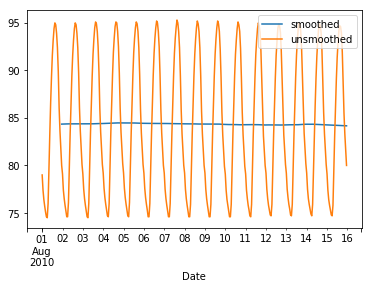

In [152]:
import matplotlib.pyplot as plt

# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = df['Temperature']['2010-08-1':'2010-08-15']

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window=24).mean()

# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})

# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()

Date
2010-08-01          NaN
2010-08-02          NaN
2010-08-03          NaN
2010-08-04          NaN
2010-08-05          NaN
2010-08-06          NaN
2010-08-07    95.114286
2010-08-08    95.142857
2010-08-09    95.171429
2010-08-10    95.171429
2010-08-11    95.157143
2010-08-12    95.128571
2010-08-13    95.100000
2010-08-14    95.042857
2010-08-15    94.971429
2010-08-16    94.900000
2010-08-17    94.857143
2010-08-18    94.828571
2010-08-19    94.814286
2010-08-20    94.785714
2010-08-21    94.757143
2010-08-22    94.742857
2010-08-23    94.714286
2010-08-24    94.642857
2010-08-25    94.542857
2010-08-26    94.428571
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64


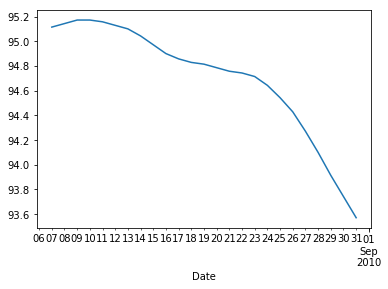

In [155]:
# Extract the August 2010 data: august
august = df['Temperature']['2010-08']

# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = august.resample('D').max().rolling(window=7).mean()
print(daily_highs_smoothed)
daily_highs_smoothed.plot()

## Manipulating Time Series Data
- If we want the pandas `read_csv()` function to parse datetime strings into datetime objects but not assign the column to the index:

```python
import pandas as pd
new_var = pd.read_csv('somecsvfile.csv', parse_dates['Date_Column_Strings'])
```

### `str` transformations (Strings)
- Generate a new series with all upper case lettered strings `df['String_Column'].str.upper()`.
- Produce a boolean output in a new series where the string contains a substring `df['String_Column'].str.contains('substring')`.
    - Because True is computed as 1 and False is 0 in python we can use `df['String_Column'].str.contains('substring').sum()` to count the number of substring occurances.

### `dt` transformations (Datetime)
- `df['Date'].dt.hour` returns a new series where 0 is midnight and 23 is 11pm.
- `central = df['Date'].dt.tz_localize('US/Central')` **or** `central = df['Date'].dt.tz_convert('US/Central')`

### `first()` method to sample the first value of each range/window
- `df.resample('A').first()`
- Linear interpolation between values is performed with `.interpolate('linear')`
    - Example: `df.resample('A').first().interpolate('linear')`

In [165]:
df = pd.read_csv('austin_airport_departure_data_2015_july.csv', parse_dates=True, header=10, index_col=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1741 entries, 2015-07-01 to NaT
Data columns (total 17 columns):
  Carrier Code                            1741 non-null object
Flight Number                             1740 non-null float64
Tail Number                               1740 non-null object
Destination Airport                       1740 non-null object
Scheduled Departure Time                  1740 non-null object
Actual Departure Time                     1740 non-null object
Scheduled Elapsed Time(Minutes)           1740 non-null float64
Actual Elapsed Time(Minutes)              1740 non-null float64
Departure Delay(Minutes)                  1740 non-null float64
Wheels-off Time                           1740 non-null object
Taxi-out Time(Minutes)                    1740 non-null float64
DelayCarrier(Minutes)                     1740 non-null float64
DelayWeather(Minutes)                     1740 non-null float64
DelayNational Aviation System(Minutes)    1740 non-null 

In [166]:
# Strip extra whitespace from the column names: df.columns
df.columns = df.columns.str.strip()

# Extract data for which the destination airport is Dallas: dallas
dallas = df['Destination Airport'].str.contains('DAL')

# Compute the total number of Dallas departures each day: daily_departures
daily_departures = dallas.resample('D').sum()

# Generate the summary statistics for daily Dallas departures: stats
stats = daily_departures.describe()

In [167]:
print(daily_departures.head())
print(stats)

Date (MM/DD/YYYY)
2015-07-01    10
2015-07-02    10
2015-07-03    11
2015-07-04     3
2015-07-05     9
dtype: int64
count    31.000000
mean      9.322581
std       1.989759
min       3.000000
25%       9.500000
50%      10.000000
75%      10.000000
max      11.000000
dtype: float64


## Using boolean masks [scipy.org](https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html)

In [177]:
df = pd.read_csv('austin_airport_departure_data_2015_july.csv', parse_dates=True, header=10)

# Strip extra whitespace from the column names: df.columns
df.columns = df.columns.str.strip()

df.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes),Unnamed: 17
0,WN,07/01/2015,103.0,N8607M,MDW,06:30,06:52,165.0,147.0,22.0,07:01,9.0,0.0,0.0,0.0,0.0,0.0,NaN
1,WN,07/01/2015,144.0,N8609A,SAN,20:55,20:50,170.0,158.0,-5.0,21:03,13.0,0.0,0.0,0.0,0.0,0.0,NaN
2,WN,07/01/2015,178.0,N646SW,ELP,20:30,20:45,90.0,80.0,15.0,20:55,10.0,0.0,0.0,0.0,0.0,0.0,NaN
3,WN,07/01/2015,232.0,N204WN,ATL,05:45,05:49,135.0,137.0,4.0,06:01,12.0,0.0,0.0,0.0,0.0,0.0,NaN
4,WN,07/01/2015,238.0,N233LV,DAL,12:30,12:34,55.0,48.0,4.0,12:41,7.0,0.0,0.0,0.0,0.0,0.0,NaN


In [178]:
# Build a Boolean mask to filter out all the 'LAX' departure flights: mask
mask = df['Destination Airport'] == 'LAX'

# Use the mask to subset the data: la
la = df[mask]

# Combine two columns of data to create a datetime series: times_tz_none 
times_tz_none = pd.to_datetime( la['Date (MM/DD/YYYY)'] + ' ' + la['Wheels-off Time'] )

# Localize the time to US/Central: times_tz_central
times_tz_central = times_tz_none.dt.tz_localize('US/Central')

# Convert the datetimes from US/Central to US/Pacific
times_tz_pacific = times_tz_central.dt.tz_convert('US/Pacific')

In [179]:
print(times_tz_central.head())
print(times_tz_pacific.head())

33    2015-07-01 05:43:00-05:00
55    2015-07-01 16:27:00-05:00
91    2015-07-02 05:47:00-05:00
113   2015-07-02 16:23:00-05:00
134   2015-07-03 05:30:00-05:00
dtype: datetime64[ns, US/Central]
33    2015-07-01 03:43:00-07:00
55    2015-07-01 14:27:00-07:00
91    2015-07-02 03:47:00-07:00
113   2015-07-02 14:23:00-07:00
134   2015-07-03 03:30:00-07:00
dtype: datetime64[ns, US/Pacific]


## Time Series Visualization
- Datetime series plot function labeling 

```python
df['column_ref'].plot(style='k.-', title='Plot Title')
plt.ylabel('y-label (units)')
plt.show()
```

- [Pandas `pd.dataframe.plot()` Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
- [Matplotlib Line Styles Reference](https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html)
- [Line Markers](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html?highlight=markers#matplotlib.lines.Line2D.markers) the line styles are also presented on this link.
![DataFrame Plot Styles](dataframe_styles.png)
- `plot()` also takes a `kind=''` argument for different kinds of plots.
- plotting multiple variables at once:

```python
df.loc['x_col_ref', ['y_col_ref1','y_col_ref2']].plot(title='Plot Title')
plt.show()
```
- Other arguments for `plot()` are:
    - `subplots=True` for plots with disperate scales or units

In [186]:
df = pd.read_csv('weather_data_austin_2010.csv')

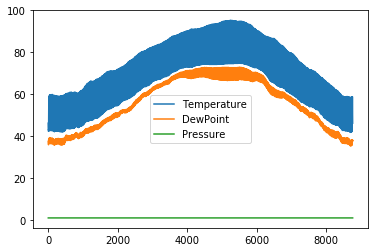

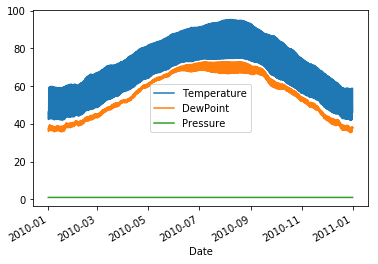

In [187]:
# Plot the raw data before setting the datetime index
df.plot()
plt.show()

# Convert the 'Date' column into a collection of datetime objects: df.Date
df.Date = pd.to_datetime(df['Date'])

# Set the index to be the converted 'Date' column
df.set_index('Date', inplace=True)

# Re-plot the DataFrame to see that the axis is now datetime aware!
df.plot()
plt.show()

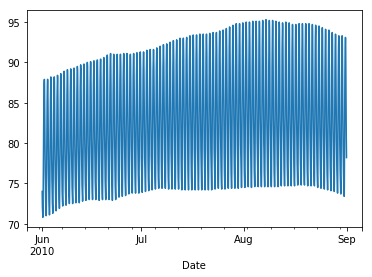

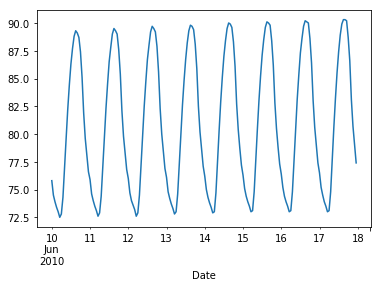

<Figure size 432x288 with 0 Axes>

In [188]:
# Plot the summer data
df.Temperature['2010-Jun':'2010-Aug'].plot()
plt.show()
plt.clf()

# Plot the one week data
df.Temperature['2010-06-10':'2010-06-17'].plot()
plt.show()
plt.clf()

# Case Study
## Reading and Cleaning Data

In [189]:
# Import pandas
import pandas as pd

# Read in the data file: df
df = pd.read_csv('NOAA_QCLCD_2011_hourly_13904.csv')

# Print the output of df.head()
print(df.head())

# Read in the data file with header=None: df_headers
df_headers = pd.read_csv('NOAA_QCLCD_2011_hourly_13904.csv', header=None)

# Print the output of df_headers.head()
print(df_headers.head())

   13904  20110101  0053  12  OVC045     10.00  .1  .2  .3 ...   .18  .19  \
0  13904  20110101   153  12  OVC049     10.00             ...              
1  13904  20110101   253  12  OVC060     10.00             ...   030        
2  13904  20110101   353  12  OVC065     10.00             ...              
3  13904  20110101   453  12  BKN070     10.00             ...              
4  13904  20110101   553  12  BKN065     10.00             ...   015        

   29.95  .20  AA  .21  .22  .23 29.95.1  .24  
0  30.01       AA                  30.02       
1  30.01       AA                  30.02       
2  30.03       AA                  30.04       
3  30.04       AA                  30.04       
4  30.06       AA                  30.06       

[5 rows x 44 columns]
      0         1    2   3       4  5      6  7  8  9  ...   34 35     36 37  \
0  13904  20110101   53  12  OVC045     10.00          ...          29.95      
1  13904  20110101  153  12  OVC049     10.00          ...        

In [190]:
df = pd.read_csv('NOAA_QCLCD_2011_hourly_13904.csv', header=None)
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'
list_to_drop = ['sky_conditionFlag', 'visibilityFlag', 'wx_and_obst_to_vision', 'wx_and_obst_to_visionFlag', 'dry_bulb_farenFlag', 'dry_bulb_celFlag', 'wet_bulb_farenFlag', 'wet_bulb_celFlag', 'dew_point_farenFlag', 'dew_point_celFlag', 'relative_humidityFlag', 'wind_speedFlag', 'wind_directionFlag', 'value_for_wind_character', 'value_for_wind_characterFlag', 'station_pressureFlag', 'pressure_tendencyFlag', 'pressure_tendency', 'presschange', 'presschangeFlag', 'sea_level_pressureFlag', 'hourly_precip', 'hourly_precipFlag', 'altimeter', 'record_type', 'altimeterFlag', 'junk']

In [191]:
# Split on the comma to create a list: column_labels_list
column_labels_list = column_labels.split(',')

# Assign the new column labels to the DataFrame: df.columns
df.columns = column_labels_list

# Remove the appropriate columns: df_dropped
df_dropped = df.drop(list_to_drop, axis='columns')

# Print the output of df_dropped.head()
print(df_dropped.head())

    Wban      date  Time  StationType sky_condition visibility dry_bulb_faren  \
0  13904  20110101    53           12        OVC045      10.00             51   
1  13904  20110101   153           12        OVC049      10.00             51   
2  13904  20110101   253           12        OVC060      10.00             51   
3  13904  20110101   353           12        OVC065      10.00             50   
4  13904  20110101   453           12        BKN070      10.00             50   

  dry_bulb_cel wet_bulb_faren wet_bulb_cel dew_point_faren dew_point_cel  \
0         10.6             38          3.1              15          -9.4   
1         10.6             37          3.0              14         -10.0   
2         10.6             37          2.9              13         -10.6   
3         10.0             38          3.1              17          -8.3   
4         10.0             37          2.8              15          -9.4   

  relative_humidity wind_speed wind_direction station_pr

In [192]:
# Convert the date column to string: df_dropped['date']
df_dropped['date'] = df_dropped.date.astype(str)

# Pad leading zeros to the Time column: df_dropped['Time']
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))

# Concatenate the new date and Time columns: date_string
date_string = df_dropped['date'] + df_dropped['Time']

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
df_clean = df_dropped.set_index(date_times)

# Print the output of df_clean.head()
print(df_clean.head())

                      Wban      date  Time  StationType sky_condition  \
2011-01-01 00:53:00  13904  20110101  0053           12        OVC045   
2011-01-01 01:53:00  13904  20110101  0153           12        OVC049   
2011-01-01 02:53:00  13904  20110101  0253           12        OVC060   
2011-01-01 03:53:00  13904  20110101  0353           12        OVC065   
2011-01-01 04:53:00  13904  20110101  0453           12        BKN070   

                    visibility dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 00:53:00      10.00             51         10.6             38   
2011-01-01 01:53:00      10.00             51         10.6             37   
2011-01-01 02:53:00      10.00             51         10.6             37   
2011-01-01 03:53:00      10.00             50         10.0             38   
2011-01-01 04:53:00      10.00             50         10.0             37   

                    wet_bulb_cel dew_point_faren dew_point_cel  \
2011-01-01 00:53:00          3.1

In [223]:
# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-06-20 08:00:00':'2011-06-20 09:00:00', 'dry_bulb_faren'])

# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')

# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-06-20 08:00:00':'2011-06-20 09:00:00', 'dry_bulb_faren'])

# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')
df_clean['visibility'] = pd.to_numeric(df_clean['visibility'], errors='coerce')

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64
2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64


## Statistical EDA (Exploratory Data Analysis)

In [224]:
# Print the median of the dry_bulb_faren column
print(df_clean['dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print(df_clean.loc['2011-Jan', 'dry_bulb_faren'].median())

72.0
78.0
48.0


In [225]:
df_climate = pd.read_csv('weather_data_austin_2010.csv', parse_dates=True, index_col=['Date'])
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 3 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
dtypes: float64(3)
memory usage: 273.7 KB


In [226]:
# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample('D').mean()

# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
# Note: .values is an attribute, not a method, so you don't have to use ().
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values

# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate.resample('D').mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())

1.3301831870056482


In [227]:
# Select days that are sunny: sunny
sunny = df_clean.loc[df_clean['sky_condition'] == 'CLR']

# Select days that are overcast: overcast
overcast = df_clean.loc[df_clean['sky_condition'].str.contains('OVC')]

# Resample sunny and overcast, aggregating by maximum daily temperature
sunny_daily_max = sunny.resample('D').max()
overcast_daily_max = overcast.resample('D').max()

# Print the difference between the mean of sunny_daily_max and overcast_daily_max
print(sunny_daily_max.mean() - overcast_daily_max.mean())

Wban               0.000000
StationType        0.000000
visibility         0.174359
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


## Visual EDA (Exploritory Data Analysis)

                visibility  dry_bulb_faren
visibility        1.000000        0.490328
dry_bulb_faren    0.490328        1.000000


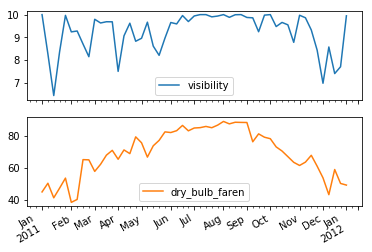

In [228]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_clean[['visibility','dry_bulb_faren']].resample('W').mean()

# Print the output of weekly_mean.corr()
print(weekly_mean.corr())

# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()

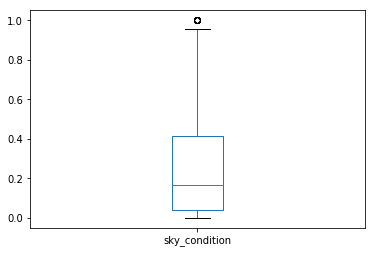

In [235]:
# Create a Boolean Series for sunny days: sunny
sunny = df_clean['sky_condition'].loc[df_clean['sky_condition'] == 'CLR']

# Resample the Boolean Series by day and compute the sum: sunny_hours
sunny_hours = sunny.resample('D').count()

# Resample the Boolean Series by day and compute the count: total_hours
total_hours = 24

# Divide sunny_hours by total_hours: sunny_fraction
sunny_fraction = sunny_hours / total_hours

# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

In [236]:
print(sunny_hours)

2011-01-01    11
2011-01-02     7
2011-01-03     3
2011-01-04     0
2011-01-05     1
2011-01-06     6
2011-01-07     4
2011-01-08     6
2011-01-09     0
2011-01-10     0
2011-01-11     3
2011-01-12     0
2011-01-13     0
2011-01-14     0
2011-01-15     0
2011-01-16     0
2011-01-17     2
2011-01-18     7
2011-01-19     0
2011-01-20     6
2011-01-21    10
2011-01-22    21
2011-01-23     6
2011-01-24     1
2011-01-25     8
2011-01-26     8
2011-01-27     3
2011-01-28     1
2011-01-29     0
2011-01-30     3
              ..
2011-12-02     0
2011-12-03     0
2011-12-04     0
2011-12-05     0
2011-12-06     5
2011-12-07    10
2011-12-08     1
2011-12-09     0
2011-12-10     0
2011-12-11     0
2011-12-12     0
2011-12-13     0
2011-12-14     0
2011-12-15     0
2011-12-16     0
2011-12-17     0
2011-12-18     0
2011-12-19     0
2011-12-20     0
2011-12-21     0
2011-12-22    12
2011-12-23     2
2011-12-24     0
2011-12-25     0
2011-12-26     8
2011-12-27    24
2011-12-28     7
2011-12-29    

## Solution:
##### I needed to hit the show solution for this exercise because I found the description misleading.
- DataCamp illustrated that we where looking for the ratio of 'CLR' hours to the total number of hours in a day.
- Based on the dataset, we were actually looking for the ratio of 'CLR' readings to the total number of readings in a day.
- Readings can be down to the minute and not hourly, like what was presented in the description.

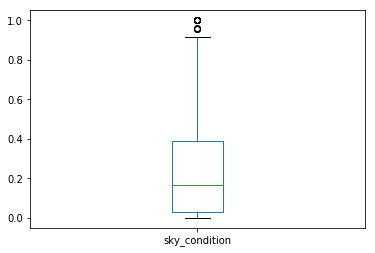

In [244]:
# Create a Boolean Series for sunny days: sunny
sunny = df_clean['sky_condition'] == 'CLR'

# Resample the Boolean Series by day and compute the sum: sunny_hours
sunny_hours = sunny.resample('D').sum()

# Resample the Boolean Series by day and compute the count: total_hours
total_hours = sunny.resample('D').count()

# Divide sunny_hours by total_hours: sunny_fraction
sunny_fraction = sunny_hours / total_hours

# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

In [245]:
print(total_hours.head())
print(sunny_hours.head())
print(sunny_fraction.head())
print(df_clean['2011-01-04'])

2011-01-01    24
2011-01-02    24
2011-01-03    26
2011-01-04    49
2011-01-05    29
Freq: D, Name: sky_condition, dtype: int64
2011-01-01    11.0
2011-01-02     7.0
2011-01-03     3.0
2011-01-04     0.0
2011-01-05     1.0
Freq: D, Name: sky_condition, dtype: float64
2011-01-01    0.458333
2011-01-02    0.291667
2011-01-03    0.115385
2011-01-04    0.000000
2011-01-05    0.034483
Freq: D, Name: sky_condition, dtype: float64
                      Wban      date  Time  StationType         sky_condition  \
2011-01-04 00:53:00  13904  20110104  0053           12         FEW024 OVC039   
2011-01-04 01:13:00  13904  20110104  0113           12         BKN024 OVC039   
2011-01-04 01:51:00  13904  20110104  0151           12         SCT022 BKN039   
2011-01-04 01:53:00  13904  20110104  0153           12         SCT022 BKN039   
2011-01-04 02:51:00  13904  20110104  0251           12         BKN022 BKN039   
2011-01-04 02:53:00  13904  20110104  0253           12         BKN022 BKN039   
2011-

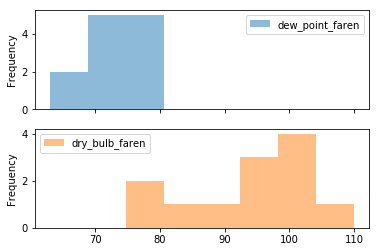

In [247]:
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = df_clean[['dew_point_faren','dry_bulb_faren']].resample('M').max()

# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind='hist', bins=8, alpha=0.5, subplots=True)

# Show the plot
plt.show()

In [249]:
# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = df_climate.loc['2010-Aug', 'Temperature'].max()
print(august_max)

# Resample the August 2011 temperatures in df_clean by day and aggregate the maximum value: august_2011
august_2011 = df_clean.loc['2011-Aug', 'dry_bulb_faren'].resample('D').max()

95.3


In [250]:
print(august_2011)

2011-08-01    103.0
2011-08-02    103.0
2011-08-03    103.0
2011-08-04    104.0
2011-08-05    103.0
2011-08-06    102.0
2011-08-07    102.0
2011-08-08    103.0
2011-08-09    103.0
2011-08-10    102.0
2011-08-11    101.0
2011-08-12    100.0
2011-08-13     96.0
2011-08-14    101.0
2011-08-15    103.0
2011-08-16    102.0
2011-08-17    100.0
2011-08-18    104.0
2011-08-19    103.0
2011-08-20    104.0
2011-08-21    102.0
2011-08-22    103.0
2011-08-23    102.0
2011-08-24    102.0
2011-08-25     93.0
2011-08-26    101.0
2011-08-27    107.0
2011-08-28    110.0
2011-08-29    107.0
2011-08-30    103.0
2011-08-31    100.0
Freq: D, Name: dry_bulb_faren, dtype: float64


In [253]:
# Filter for days in august_2011 where the value exceeded august_max: august_2011_high
august_2011_high = august_2011[august_2011 > august_max]

print(august_2011_high)

2011-08-01    103.0
2011-08-02    103.0
2011-08-03    103.0
2011-08-04    104.0
2011-08-05    103.0
2011-08-06    102.0
2011-08-07    102.0
2011-08-08    103.0
2011-08-09    103.0
2011-08-10    102.0
2011-08-11    101.0
2011-08-12    100.0
2011-08-13     96.0
2011-08-14    101.0
2011-08-15    103.0
2011-08-16    102.0
2011-08-17    100.0
2011-08-18    104.0
2011-08-19    103.0
2011-08-20    104.0
2011-08-21    102.0
2011-08-22    103.0
2011-08-23    102.0
2011-08-24    102.0
2011-08-26    101.0
2011-08-27    107.0
2011-08-28    110.0
2011-08-29    107.0
2011-08-30    103.0
2011-08-31    100.0
Name: dry_bulb_faren, dtype: float64


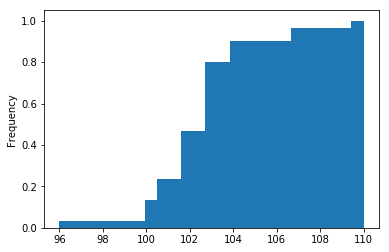

In [254]:
# Construct a CDF of august_2011_high
august_2011_high.plot(kind='hist', bins=25, density=True, cumulative=True)

# Display the plot
plt.show()